In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings("ignore")
pd.options.display.max_columns = None
#pd.options.display.max_rows = None

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats
# Tukeyhsd library
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as SM
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,accuracy_score,confusion_matrix

from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('expected_ctc.csv')
df.head()

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,University_Grad,Passing_Year_Of_Graduation,PG_Specialization,University_PG,Passing_Year_Of_PG,PHD_Specialization,University_PHD,Passing_Year_Of_PHD,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,1,22753,0,0,NaN,NaN,NaN,NaN,NaN,PG,Arts,Lucknow,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,2,51087,23,14,HR,Consultant,Analytics,H,HR,Doctorate,Chemistry,Surat,1988.0,Others,Surat,1990.0,Chemistry,Mangalore,1997.0,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,3,38413,21,12,Top Management,Consultant,Training,J,NaN,Doctorate,Zoology,Jaipur,1990.0,Zoology,Jaipur,1992.0,Zoology,Lucknow,1999.0,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,4,11501,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,Others,Bangalore,1997.0,Zoology,Bangalore,1999.0,Chemistry,Guwahati,2005.0,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,5,58941,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,Zoology,Mumbai,2004.0,Zoology,Mumbai,2006.0,Zoology,Bangalore,2010.0,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  int64  
 1   Applicant_ID                       25000 non-null  int64  
 2   Total_Experience                   25000 non-null  int64  
 3   Total_Experience_in_field_applied  25000 non-null  int64  
 4   Department                         22222 non-null  object 
 5   Role                               24037 non-null  object 
 6   Industry                           24092 non-null  object 
 7   Organization                       24092 non-null  object 
 8   Designation                        21871 non-null  object 
 9   Education                          25000 non-null  object 
 10  Graduation_Specialization          18820 non-null  object 
 11  University_Grad                    18820 non-null  obj

In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
IDX,25000.0,NaN,NaN,NaN,12500.5,7217.022701,1.0,6250.75,12500.5,18750.25,25000.0
Applicant_ID,25000.0,NaN,NaN,NaN,34993.24008,14390.271591,10000.0,22563.75,34974.5,47419.0,60000.0
Total_Experience,25000.0,NaN,NaN,NaN,12.49308,7.471398,0.0,6.0,12.0,19.0,25.0
Total_Experience_in_field_applied,25000.0,NaN,NaN,NaN,6.2582,5.819513,0.0,1.0,5.0,10.0,25.0
Department,22222,12,Marketing,2379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Role,24037,24,Others,2248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Industry,24092,11,Training,2237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Organization,24092,16,M,1574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Designation,21871,18,HR,1648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,25000,4,PG,6326,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(25000, 29)

In [7]:
### Examine missing values
df_na = df.isna().sum()
df_na[df_na.values > 0].sort_values(ascending=False) # Find out all variables that contain missing values

PHD_Specialization            11881
University_PHD                11881
Passing_Year_Of_PHD           11881
PG_Specialization              7692
University_PG                  7692
Passing_Year_Of_PG             7692
Graduation_Specialization      6180
University_Grad                6180
Passing_Year_Of_Graduation     6180
Designation                    3129
Department                     2778
Role                            963
Industry                        908
Organization                    908
Last_Appraisal_Rating           908
dtype: int64

### replacing empty value of 'PHD_Specialization','University_PHD','PG_Specialization','University_PG','Graduation_Specialization','University_Grad' to NA

In [8]:
df_modified = df.copy()

In [9]:
values = {"PHD_Specialization": 'None', "University_PHD": 'None','Passing_Year_Of_PHD': 0, "PG_Specialization": 'None', "University_PG": 'None','Passing_Year_Of_PG': 0, "Graduation_Specialization": 'None', "University_Grad": 'None','Passing_Year_Of_Graduation': 0,"Designation": 'None', "Department": 'None',"Last_Appraisal_Rating": 'None', "Organization": 'None',"Industry": 'None', "Role": 'None'}

In [10]:
df_modified.fillna(value=values,inplace=True)

In [11]:
df_na = df_modified.isna().sum()
df_na[df_na.values > 0].sort_values(ascending=False) # Find out all variables that contain missing values

Series([], dtype: int64)

In [12]:
df_modified['Education'].value_counts()

PG            6326
Doctorate     6285
Grad          6209
Under Grad    6180
Name: Education, dtype: int64

In [13]:
df_modified['PHD_Specialization'].value_counts()

None           11881
Others          1545
Chemistry       1458
Mathematics     1378
Economics       1343
Engineering     1259
Statistics      1236
Zoology         1011
Sociology        989
Psychology       986
Botony           976
Arts             938
Name: PHD_Specialization, dtype: int64

In [14]:
df_modified['PG_Specialization'].value_counts()

None           7692
Mathematics    1800
Chemistry      1796
Economics      1755
Engineering    1674
Statistics     1639
Others         1629
Psychology     1425
Zoology        1424
Arts           1410
Sociology      1385
Botony         1371
Name: PG_Specialization, dtype: int64

In [15]:
df_modified['Graduation_Specialization'].value_counts()

None           6180
Chemistry      1785
Economics      1774
Mathematics    1770
Zoology        1730
Arts           1721
Psychology     1705
Sociology      1697
Botony         1674
Engineering    1661
Others         1660
Statistics     1643
Name: Graduation_Specialization, dtype: int64

### correcting Education column on basis of there education 

In [16]:
filtered_values = np.where((df_modified['Education'] == 'Grad') & (df_modified['PHD_Specialization'] != 'None'))
print(df_modified.loc[filtered_values]['Education'].value_counts().sum())
df_modified.loc[(df_modified['Education'] == 'Grad') & (df_modified['PHD_Specialization'] != 'None'),'Education'] = 'Doctorate'

4362


In [17]:
filtered_values = np.where((df_modified['Education'] == 'Grad') & (df_modified['PG_Specialization'] != 'None'))
print(df_modified.loc[filtered_values]['Education'].value_counts().sum())
df_modified.loc[(df_modified['Education'] == 'Grad') & (df_modified['PG_Specialization'] != 'None'),'Education'] = 'PG'
#df_modified.to_csv('temp.csv')

1363


In [18]:
filtered_values = np.where((df_modified['Education'] == 'PG') & (df_modified['PHD_Specialization'] != 'None'))
print(df_modified.loc[filtered_values]['Education'].value_counts().sum())
df_modified.loc[(df_modified['Education'] == 'PG') & (df_modified['PHD_Specialization'] != 'None'),'Education'] = 'Doctorate'
#df_modified.to_csv('temp.csv')

4390


In [19]:
filtered_values = np.where((df_modified['Education'] == 'Doctorate') & (df_modified['PHD_Specialization'] == 'None') & (df_modified['PG_Specialization'] != 'None'))
print(df_modified.loc[filtered_values]['Education'].value_counts().sum())
df_modified.loc[(df_modified['Education'] == 'Doctorate') & (df_modified['PHD_Specialization'] == 'None') & (df_modified['PG_Specialization'] != 'None'),'Education'] = 'PG'
#df_modified.to_csv('temp.csv')

1412


In [20]:
filtered_values = np.where((df_modified['Education'] == 'PG') & (df_modified['PG_Specialization'] == 'None') & (df_modified['Graduation_Specialization'] != 'None'))
print(df_modified.loc[filtered_values]['Education'].value_counts().sum())
df_modified.loc[(df_modified['Education'] == 'PG') & (df_modified['PG_Specialization'] == 'None') & (df_modified['Graduation_Specialization'] != 'None'),'Education'] = 'Grad'
#df_modified.to_csv('temp.csv')

522


In [21]:
filtered_values = np.where((df_modified['Education'] == 'Grad') & (df_modified['Graduation_Specialization'] == 'None'))
print(df_modified.loc[filtered_values]['Education'].value_counts().sum())

0


In [22]:
df_modified['Education'].value_counts()

Doctorate     13625
Under Grad     6180
PG             4189
Grad           1006
Name: Education, dtype: int64

In [23]:
df_modified.drop(['IDX','Applicant_ID'],axis=1,inplace=True)

In [24]:
df_na = df_modified.isna().sum()
df_na[df_na.values > 0].sort_values(ascending=False) # Find out all variables that contain missing values

Series([], dtype: int64)

In [25]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Experience                   25000 non-null  int64  
 1   Total_Experience_in_field_applied  25000 non-null  int64  
 2   Department                         25000 non-null  object 
 3   Role                               25000 non-null  object 
 4   Industry                           25000 non-null  object 
 5   Organization                       25000 non-null  object 
 6   Designation                        25000 non-null  object 
 7   Education                          25000 non-null  object 
 8   Graduation_Specialization          25000 non-null  object 
 9   University_Grad                    25000 non-null  object 
 10  Passing_Year_Of_Graduation         25000 non-null  float64
 11  PG_Specialization                  25000 non-null  obj

In [26]:
filtered_values = np.where((df_modified['Passing_Year_Of_Graduation'] > df_modified['Passing_Year_Of_PG']) & (df_modified['Passing_Year_Of_PG'] != 0))
df_modified.loc[filtered_values]

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,University_Grad,Passing_Year_Of_Graduation,PG_Specialization,University_PG,Passing_Year_Of_PG,PHD_Specialization,University_PHD,Passing_Year_Of_PHD,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
16,4,4,Analytics/BI,Scientist,Analytics,G,Sr.Manager,PG,Mathematics,Kolkata,2016.0,Mathematics,Kolkata,2009.0,None,None,0.0,Surat,Guwahati,1079725,Y,A,5,2,0,0,1572079
114,5,0,HR,Others,IT,D,Sr.Manager,PG,Botony,Lucknow,2015.0,Botony,Lucknow,2011.0,None,None,0.0,Lucknow,Kolkata,1361036,N,Key_Performer,5,0,0,0,1910894
126,8,1,Engineering,Bio statistician,BFSI,G,None,PG,Sociology,Nagpur,2012.0,Sociology,Nagpur,2009.0,None,None,0.0,Ahmedabad,Pune,1814903,N,D,3,0,1,0,2170623
131,2,1,Others,Team Lead,IT,N,Director,PG,Statistics,Lucknow,2018.0,Statistics,Lucknow,2013.0,None,None,0.0,Mumbai,Mangalore,722878,N,D,3,0,0,0,877863
183,10,2,IT-Software,Business Analyst,Automobile,J,Research Analyst,PG,Chemistry,Pune,2010.0,Chemistry,Pune,2008.0,None,None,0.0,Kanpur,Delhi,2002973,Y,B,5,2,0,0,2804162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24847,6,6,None,Project Manager,Training,G,Research Analyst,PG,Botony,Kolkata,2014.0,Botony,Kolkata,2012.0,None,None,0.0,Delhi,Lucknow,1130401,N,C,5,0,3,0,1299961
24858,2,0,HR,Analyst,FMCG,A,Medical Officer,PG,Zoology,Lucknow,2018.0,Zoology,Lucknow,2010.0,None,None,0.0,Lucknow,Bangalore,897479,N,A,3,2,0,0,1121848
24896,3,1,Banking,Others,Retail,A,Data Analyst,PG,Chemistry,Bangalore,2017.0,Chemistry,Bangalore,2009.0,None,None,0.0,Mumbai,Ahmedabad,741185,N,C,1,0,0,0,886457
24928,1,1,Marketing,Associate,Automobile,M,Marketing Manager,PG,Statistics,Nagpur,2019.0,Statistics,Nagpur,2015.0,None,None,0.0,Ahmedabad,Chennai,445592,Y,D,3,1,0,0,512430


In [27]:
df_num = df_modified.select_dtypes(include = ['float64','int64'])
df_num

,Total_Experience,Total_Experience_in_field_applied,Passing_Year_Of_Graduation,Passing_Year_Of_PG,Passing_Year_Of_PHD,Current_CTC,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0,0,2020.0,0.0,0.0,0,0,0,0,0,384551
1,23,14,1988.0,1990.0,1997.0,2702664,2,4,0,0,3783729
2,21,12,1990.0,1992.0,1999.0,2236661,5,3,0,0,3131325
3,15,8,1997.0,1999.0,2005.0,2100510,5,3,0,0,2608833
4,10,5,2004.0,2006.0,2010.0,1931644,2,3,0,0,2221390
...,...,...,...,...,...,...,...,...,...,...,...
24995,18,13,1995.0,1997.0,2002.0,3410899,3,6,0,0,4434168
24996,12,8,0.0,0.0,0.0,1350793,6,7,0,0,1756030
24997,22,8,0.0,0.0,0.0,1681796,4,5,2,0,1934065
24998,25,8,1995.0,2012.0,0.0,3311090,3,1,1,0,4370638


In [28]:
df_modified.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Total_Experience,25000.0,NaN,NaN,NaN,12.49308,7.471398,0.0,6.0,12.0,19.0,25.0
Total_Experience_in_field_applied,25000.0,NaN,NaN,NaN,6.2582,5.819513,0.0,1.0,5.0,10.0,25.0
Department,25000,13,None,2778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Role,25000,25,Others,2248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Industry,25000,12,Training,2237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Organization,25000,17,M,1574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Designation,25000,19,None,3129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,25000,4,Doctorate,13625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Graduation_Specialization,25000,12,None,6180,NaN,NaN,NaN,NaN,NaN,NaN,NaN
University_Grad,25000,14,None,6180,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
lstNumeric = ['Current_CTC','Expected_CTC']
lstNumeric

['Current_CTC', 'Expected_CTC']

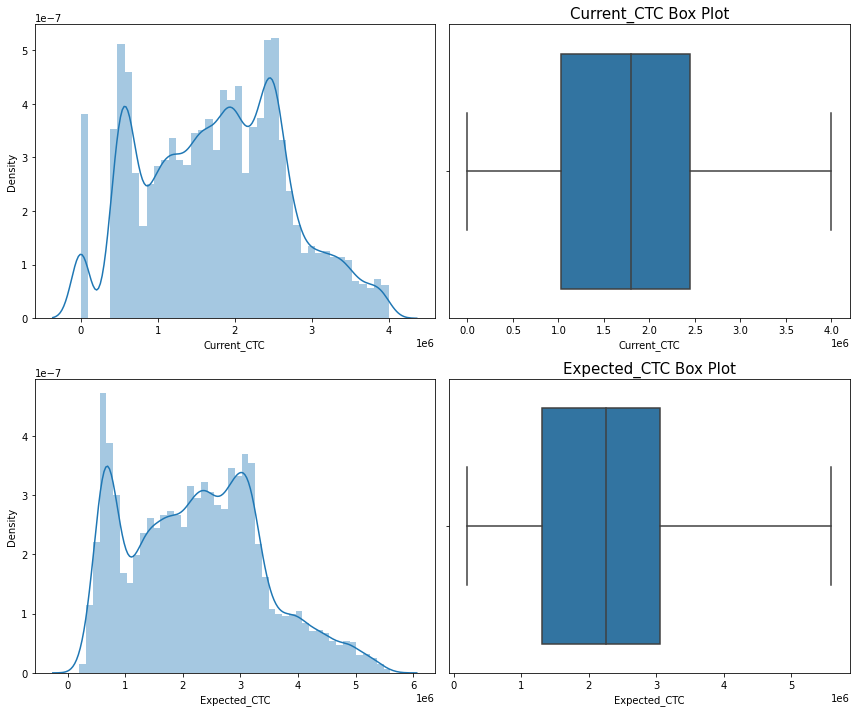

In [32]:
# Univariate continous column
fig, axes = plt.subplots(nrows= len(lstNumeric),ncols=2)
fig.set_size_inches(12, 5*len(lstNumeric))
index = 0;
for i in lstNumeric:
    a = sns.distplot(df_modified[i], ax=axes[index][0])
    a = sns.boxplot(df_modified[i] , ax=axes[index][1])
    a.set_title(i + ' Box Plot',fontsize=15)
    index = index+1
plt.tight_layout()
plt.show()

In [33]:
lstctg = list(df_modified.drop(columns=['Current_CTC','Expected_CTC']).columns)
lstctg

['Total_Experience',
 'Total_Experience_in_field_applied',
 'Department',
 'Role',
 'Industry',
 'Organization',
 'Designation',
 'Education',
 'Graduation_Specialization',
 'University_Grad',
 'Passing_Year_Of_Graduation',
 'PG_Specialization',
 'University_PG',
 'Passing_Year_Of_PG',
 'PHD_Specialization',
 'University_PHD',
 'Passing_Year_Of_PHD',
 'Curent_Location',
 'Preferred_location',
 'Inhand_Offer',
 'Last_Appraisal_Rating',
 'No_Of_Companies_worked',
 'Number_of_Publications',
 'Certifications',
 'International_degree_any']

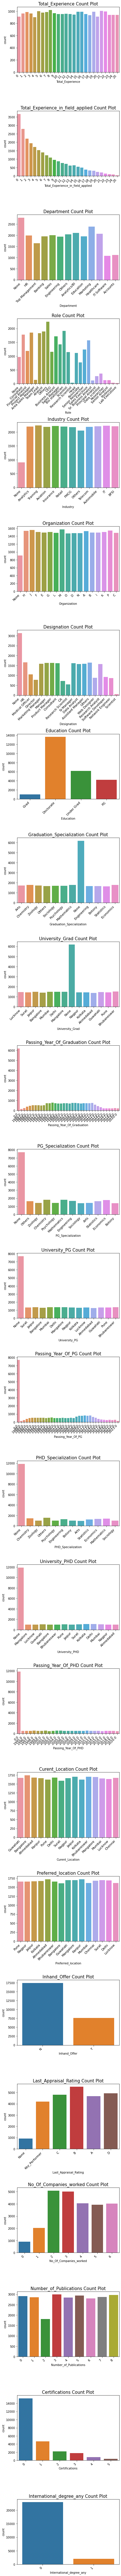

In [34]:
## Univariate catagory column
fig, axes = plt.subplots(nrows= len(lstctg),ncols=1)
fig.set_size_inches(6, 5*len(lstctg))
index = 0;
for i in lstctg:
    a = sns.countplot(df_modified[i] , ax=axes[index])
    a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=11)
    a.set_title(i + ' Count Plot',fontsize=15)
    index = index+1
plt.tight_layout()
plt.show()

### Correlation check

#### Numerical variable

<AxesSubplot:>

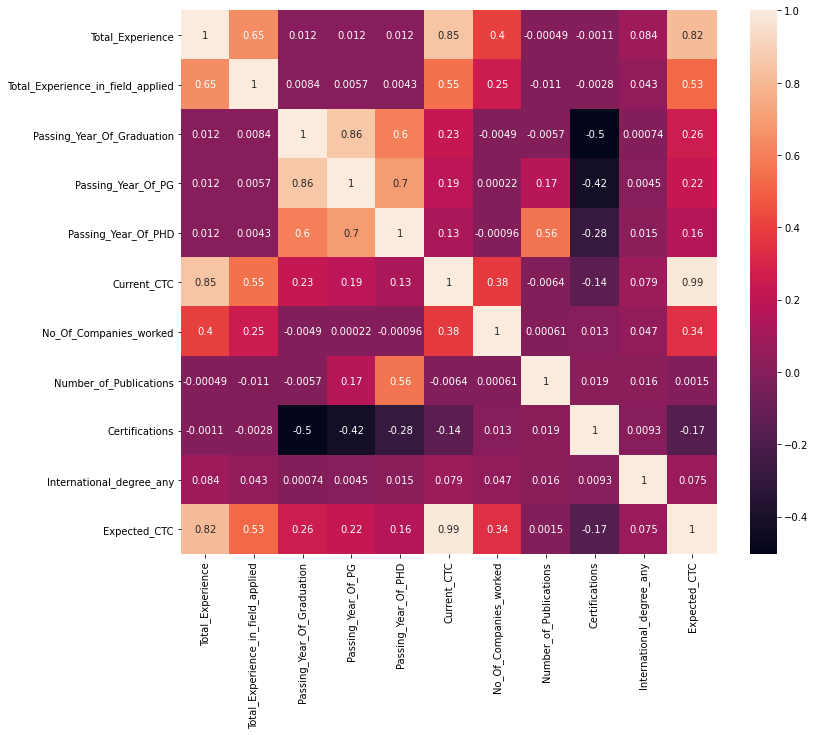

In [35]:
plt.figure(figsize=(12,10))
sns.heatmap(df_modified.corr(),annot=True)

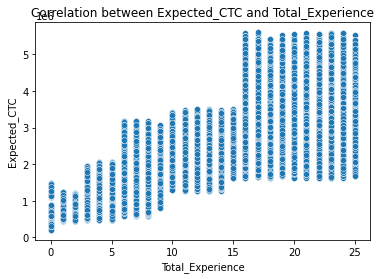

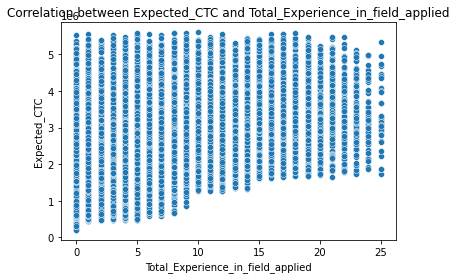

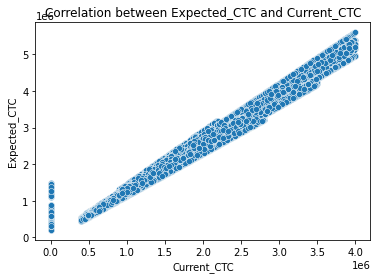

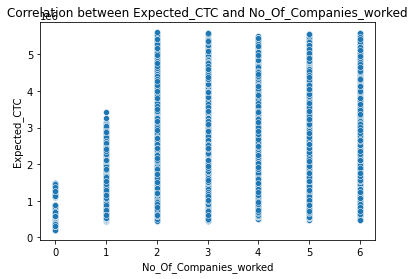

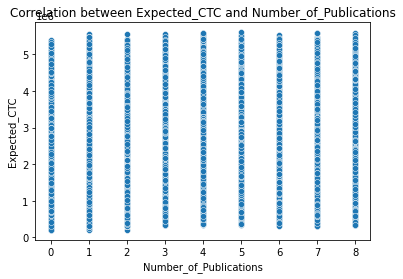

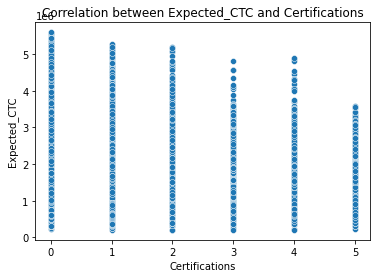

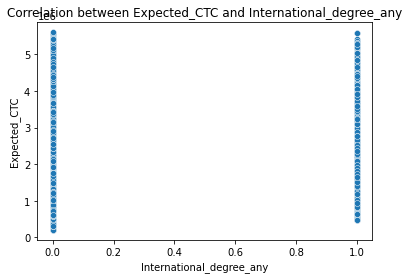

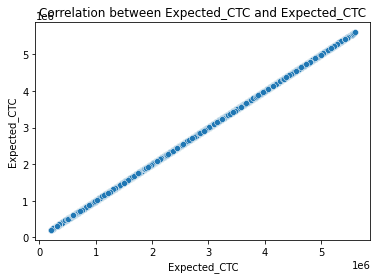

In [36]:
for colData in df_modified.select_dtypes(include = ['int64']).columns:
    sns.scatterplot(x=colData, y="Expected_CTC", data=df_modified)
    plt.title("Correlation between Expected_CTC and "+colData)
    plt.show()

In [37]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Experience                   25000 non-null  int64  
 1   Total_Experience_in_field_applied  25000 non-null  int64  
 2   Department                         25000 non-null  object 
 3   Role                               25000 non-null  object 
 4   Industry                           25000 non-null  object 
 5   Organization                       25000 non-null  object 
 6   Designation                        25000 non-null  object 
 7   Education                          25000 non-null  object 
 8   Graduation_Specialization          25000 non-null  object 
 9   University_Grad                    25000 non-null  object 
 10  Passing_Year_Of_Graduation         25000 non-null  float64
 11  PG_Specialization                  25000 non-null  obj

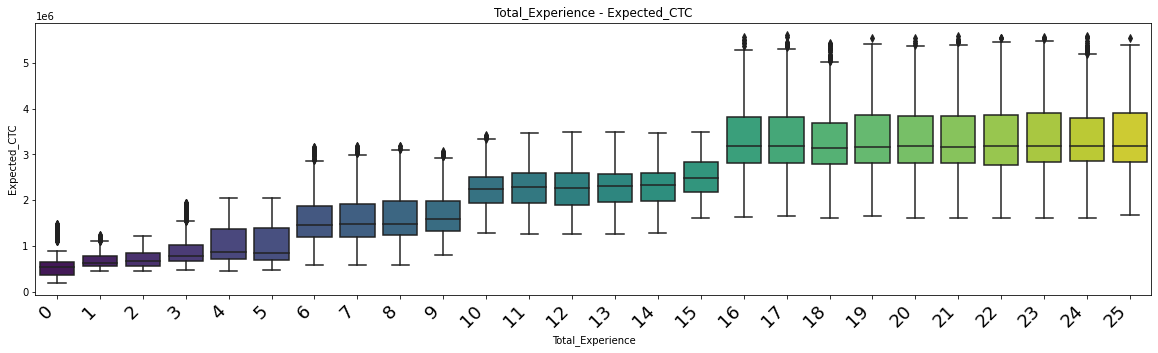

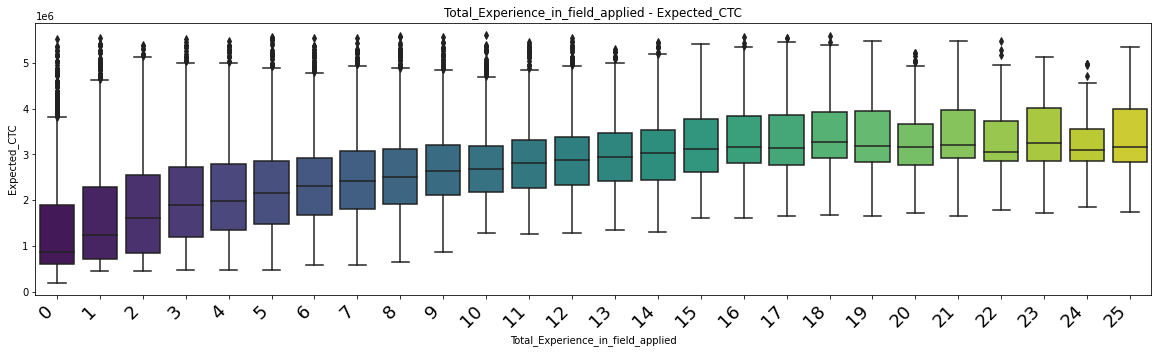

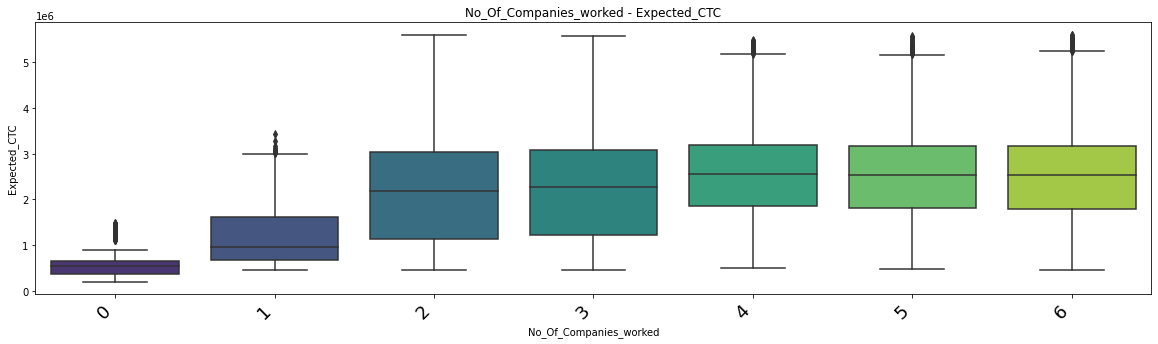

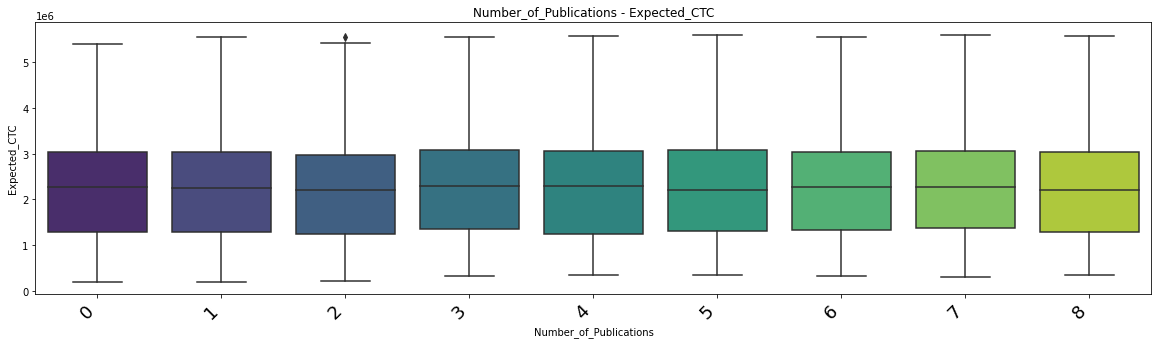

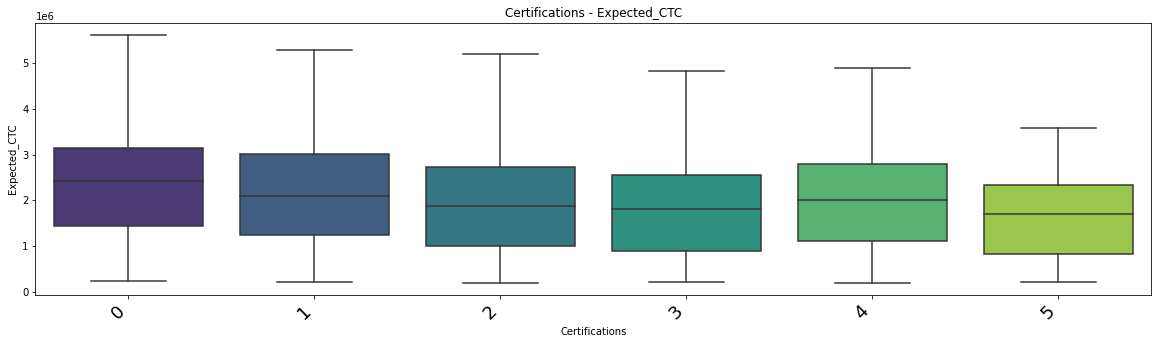

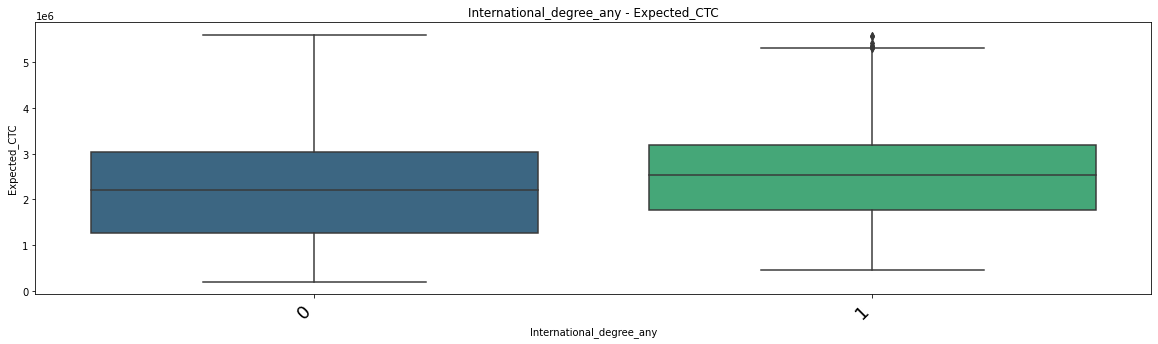

In [38]:
for colData in df_modified[['Total_Experience','Total_Experience_in_field_applied','No_Of_Companies_worked','Number_of_Publications','Certifications','International_degree_any']].columns:
    plt.figure(figsize=(20,5))
    chart=sns.boxplot(x=colData, y="Expected_CTC", data=df_modified, palette="viridis")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
    plt.title(colData +' - Expected_CTC')
    chart;

In [39]:
df_modified['Department'].unique()

array(['None', 'HR', 'Top Management', 'Banking', 'Sales', 'Engineering',
       'Others', 'Analytics/BI', 'Education', 'Marketing', 'Healthcare',
       'IT-Software', 'Accounts'], dtype=object)

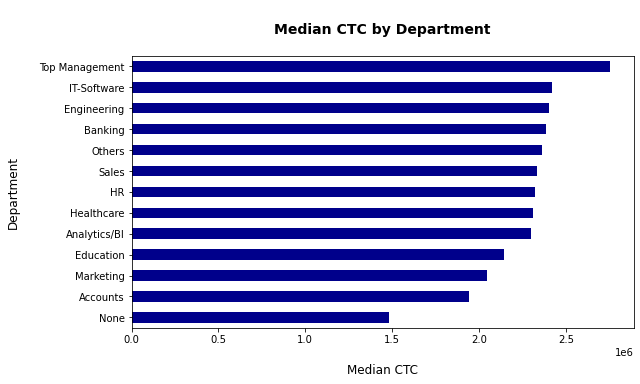

In [40]:
## Let's check the impact of Department on Expected_CTC

listings_grouped = pd.DataFrame(df_modified.groupby(['Department'])['Expected_CTC'].agg(np.median))
listings_grouped.reset_index(inplace=True)

# plot this 
listings_grouped.sort_values(by=['Expected_CTC'], ascending=True)\
          .plot(kind='barh', x='Department', y='Expected_CTC', 
                figsize=(9,5), legend=False, color='darkblue')

plt.xlabel('\nMedian CTC', fontsize=12)
plt.ylabel('Department\n', fontsize=12)
plt.title('\nMedian CTC by Department\n', fontsize=14, fontweight='bold');

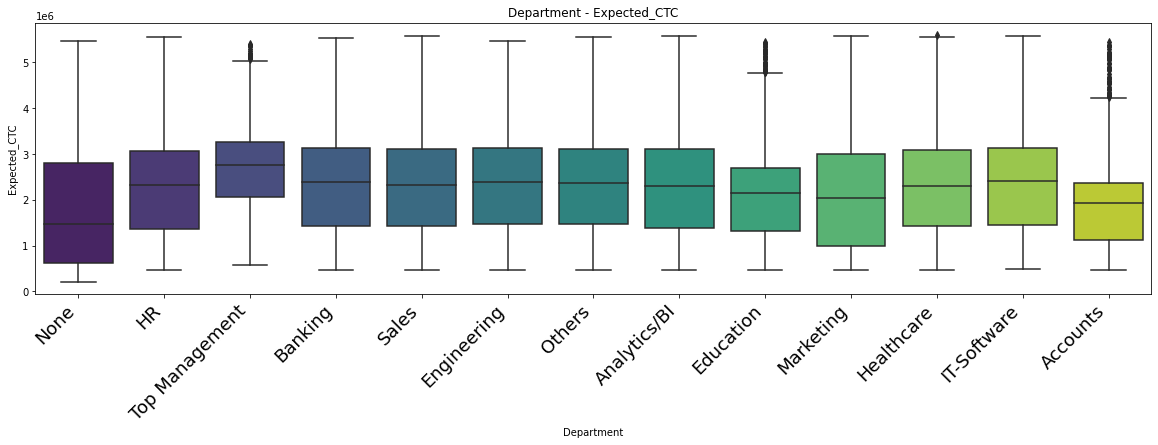

In [41]:
plt.figure(figsize=(20,5))
chart=sns.boxplot(x="Department", y="Expected_CTC", data=df_modified, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Department - Expected_CTC')
chart;

#### Anova test

H0: All Department have equal mean

H1: Atlest once Department have different mean

In [42]:
formula = 'Expected_CTC ~ C(Department)'
model = ols(formula,df_modified[df_modified['Department'] != 'None']).fit()
anv_table = anova_lm(model)
print(anv_table)

                    df        sum_sq       mean_sq          F         PR(>F)
C(Department)     11.0  6.337191e+14  5.761083e+13  45.797466  7.593981e-100
Residual       22210.0  2.793902e+16  1.257948e+12        NaN            NaN


At 95% confidence level, We see that the p-value is less than alpha (0.05). Thus, we 𝐑𝐞𝐣𝐞𝐜𝐭 the 𝐍𝐮𝐥𝐥 𝐇𝐲𝐩𝐨𝐭𝐡𝐞𝐬𝐢𝐬 ( 𝐻0 ). This means at least one particular category in the 'Department' variable has different mean of rate as compared to the other categories.

In [43]:
tukey = pairwise_tukeyhsd(endog=df_modified[df_modified['Department'] != 'None'].Expected_CTC,
                          groups=df_modified[df_modified['Department'] != 'None'].Department,
                          alpha=0.05)
print(tukey)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
   group1        group2       meandiff   p-adj     lower        upper     reject
--------------------------------------------------------------------------------
    Accounts   Analytics/BI  334649.5763    0.0    198891.07  470408.0826   True
    Accounts        Banking  382186.5087    0.0  244697.1663  519675.8512   True
    Accounts      Education  130058.8031 0.0845   -7481.9358  267599.5419  False
    Accounts    Engineering  404681.2032    0.0  266998.1301  542364.2763   True
    Accounts             HR  325152.8866    0.0  188117.6387  462188.1344   True
    Accounts     Healthcare  350046.6151    0.0  213899.3306  486193.8995   True
    Accounts    IT-Software  423200.4952    0.0  266724.9255  579676.0649   True
    Accounts      Marketing  149129.8606 0.0131   16209.8556  282049.8657   True
    Accounts         Others  383743.3754    0.0  247350.0668   520136.684   True
    Accounts          Sales 

Group 1: Top Management

Group 2: Analytics/BI,Banking, Engineering,HR,Healthcare,IT-Software,Others,Sales

Group 3: Accounts, Education, Marketing

Group 4: None

In [44]:
df_modified['Department'] = df_modified['Department'].replace(['Top Management'],'Group 1')
df_modified['Department'] = df_modified['Department'].replace(['Analytics/BI','Banking','Engineering','HR','Healthcare','IT-Software','Others','Sales'],'Group 2')
df_modified['Department'] = df_modified['Department'].replace(['Accounts', 'Education', 'Marketing'],'Group 3')

In [45]:
df_modified['Department'].unique()

array(['None', 'Group 2', 'Group 1', 'Group 3'], dtype=object)

                    Role  Expected_CTC
16    Research Scientist     2926662.0
5                    CEO     2922958.0
9                   Head     2847207.0
23  Sr. Business Analyst     2755313.5
21        Senior Analyst     2743092.0
1     Area Sales Manager     2695368.5
22     Senior Researcher     2540304.5
15       Project Manager     2363456.5
4       Business Analyst     2317534.0
12                Others     2317324.5
19         Sales Manager     2317241.0
24             Team Lead     2310295.0
3       Bio statistician     2293697.0
6             Consultant     2279608.0
18       Sales Execituve     2238839.5
7         Data scientist     2227911.0
0                Analyst     2213414.5
10         Lab Executuve     2188989.0
8      Financial Analyst     2083526.5
17            Researcher     2079207.0
20             Scientist     2018231.0
13     Principal Analyst     1519750.0
14             Professor      940881.0
2              Associate      798827.0
11                  None 

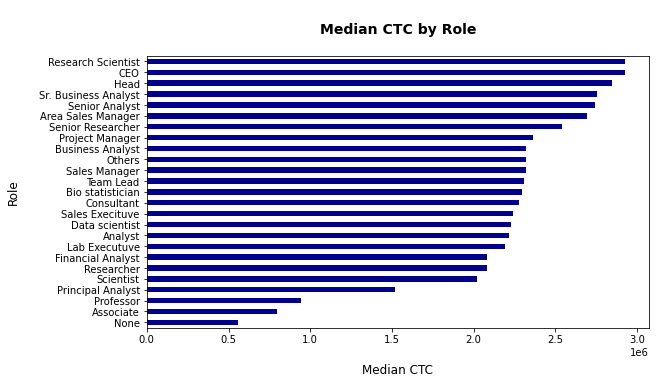

In [46]:
## Let's check the impact of Role on Expected_CTC

listings_grouped = pd.DataFrame(df_modified.groupby(['Role'])['Expected_CTC'].agg(np.median))
listings_grouped.reset_index(inplace=True)

print(listings_grouped.sort_values(by=['Expected_CTC'], ascending=False))

# plot this 
listings_grouped.sort_values(by=['Expected_CTC'], ascending=True)\
          .plot(kind='barh', x='Role', y='Expected_CTC', 
                figsize=(9,5), legend=False, color='darkblue')

plt.xlabel('\nMedian CTC', fontsize=12)
plt.ylabel('Role\n', fontsize=12)
plt.title('\nMedian CTC by Role\n', fontsize=14, fontweight='bold');

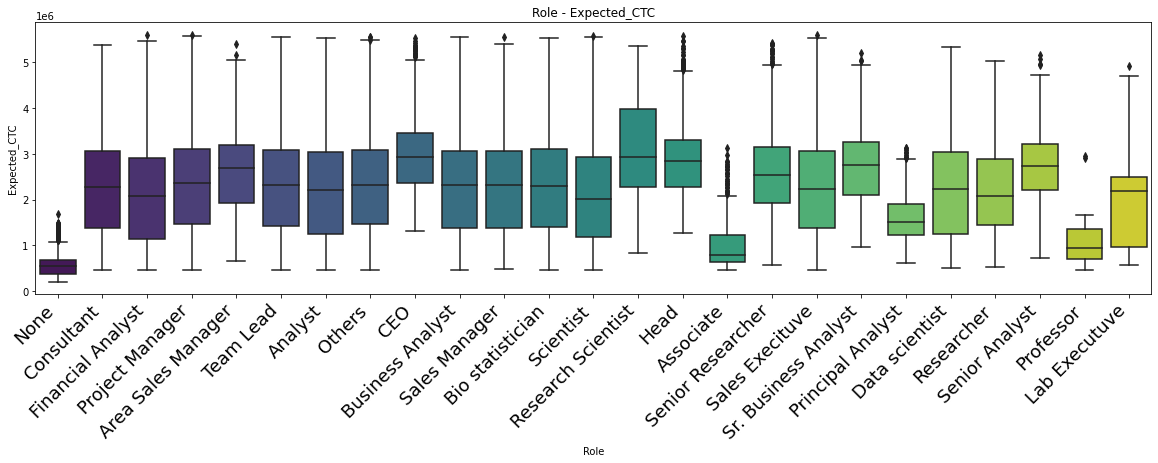

In [47]:
plt.figure(figsize=(20,5))
chart=sns.boxplot(x="Role", y="Expected_CTC", data=df_modified, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Role - Expected_CTC')
chart;

In [48]:
formula = 'Expected_CTC ~ C(Role)'
model = ols(formula,df_modified[df_modified['Role'] != 'None']).fit()
anv_table = anova_lm(model)
print(anv_table)

               df        sum_sq       mean_sq           F  PR(>F)
C(Role)      23.0  2.757403e+15  1.198871e+14  102.453571     0.0
Residual  24013.0  2.809906e+16  1.170160e+12         NaN     NaN


At 95% confidence level, We see that the p-value is less than alpha (0.05). Thus, we 𝐑𝐞𝐣𝐞𝐜𝐭 the 𝐍𝐮𝐥𝐥 𝐇𝐲𝐩𝐨𝐭𝐡𝐞𝐬𝐢𝐬 ( 𝐻0 ). This means at least one particular category in the 'Role' variable has different mean of rate as compared to the other categories.

In [49]:
tukey = pairwise_tukeyhsd(endog=df_modified[df_modified['Role'] != 'None'].Expected_CTC,
                          groups=df_modified[df_modified['Role'] != 'None'].Role,
                          alpha=0.05)
print(tukey)

                       Multiple Comparison of Means - Tukey HSD, FWER=0.05                       
       group1               group2           meandiff   p-adj      lower         upper     reject
-------------------------------------------------------------------------------------------------
             Analyst   Area Sales Manager   446939.2138  0.001    95172.8696    798705.558   True
             Analyst            Associate  -1257011.021    0.0 -1425452.2691  -1088569.773   True
             Analyst     Bio statistician    79021.7444 0.8429   -48565.3683   206608.8571  False
             Analyst     Business Analyst    59320.8599 0.9949   -71957.7866   190599.5063  False
             Analyst                  CEO   750231.0545    0.0   603055.6765   897406.4324   True
             Analyst           Consultant    38190.7793    1.0   -91744.8634   168126.4221  False
             Analyst       Data scientist   -11043.5584    1.0  -236522.9864   214435.8697  False
             Analyst

Group 1: Research Scientist, CEO, Head, Sr. Business Analyst, Senior Analyst, Area Sales Manager,Senior Researcher 

Group 2: Project Manager,Business Analyst, Others, Sales Manager, Team Lead, Bio statistician, Consultant, Sales Execituve, Data scientist, Analyst, Lab Executuve, Financial Analyst, Researcher, Scientist, Principal Analyst, 

Group 3: Professor, Associate

Group 4: None


In [50]:
df_modified['Role'] = df_modified['Role'].replace(['Research Scientist', 'CEO', 'Head', 'Sr. Business Analyst', 'Senior Analyst', 'Area Sales Manager','Senior Researcher'],'Group 1')
df_modified['Role'] = df_modified['Role'].replace(['Project Manager','Business Analyst', 'Others', 'Sales Manager', 'Team Lead', 'Bio statistician', 'Consultant', 'Sales Execituve', 'Data scientist', 'Analyst', 'Lab Executuve', 'Financial Analyst', 'Researcher', 'Scientist', 'Principal Analyst'],'Group 2')
df_modified['Role'] = df_modified['Role'].replace(['Professor', 'Associate'],'Group 3')

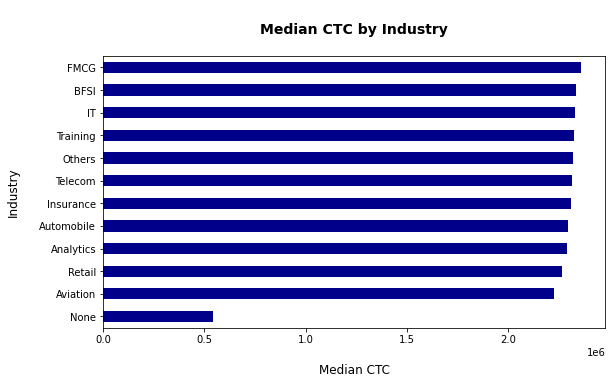

In [51]:
## Let's check the impact of Role on Expected_CTC

listings_grouped = pd.DataFrame(df_modified.groupby(['Industry'])['Expected_CTC'].agg(np.median))
listings_grouped.reset_index(inplace=True)

# plot this 
listings_grouped.sort_values(by=['Expected_CTC'], ascending=True)\
          .plot(kind='barh', x='Industry', y='Expected_CTC', 
                figsize=(9,5), legend=False, color='darkblue')

plt.xlabel('\nMedian CTC', fontsize=12)
plt.ylabel('Industry\n', fontsize=12)
plt.title('\nMedian CTC by Industry\n', fontsize=14, fontweight='bold');

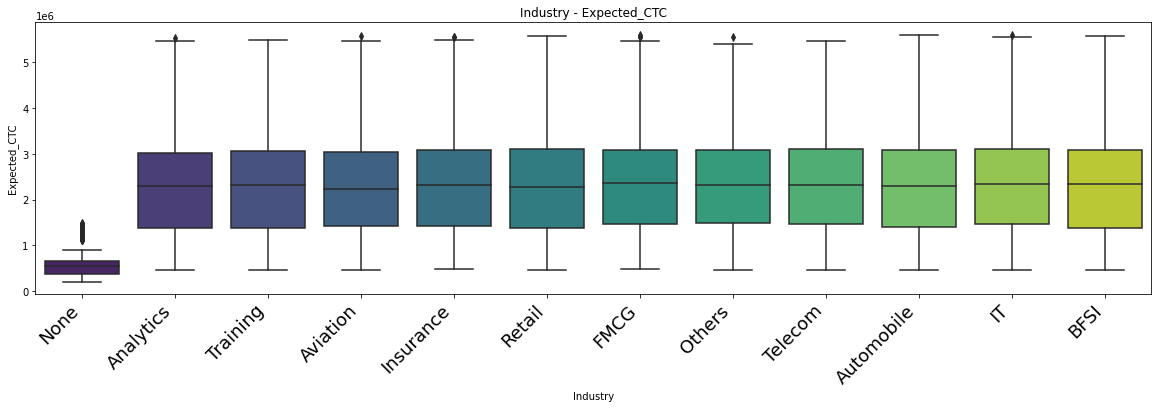

In [52]:
plt.figure(figsize=(20,5))
chart=sns.boxplot(x="Industry", y="Expected_CTC", data=df_modified, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Industry - Expected_CTC')
chart;

In [53]:
formula = 'Expected_CTC ~ C(Industry)'
model = ols(formula,df_modified[df_modified['Industry'] != 'None']).fit()
anv_table = anova_lm(model)
print(anv_table)

                  df        sum_sq       mean_sq         F    PR(>F)
C(Industry)     10.0  1.779303e+13  1.779303e+12  1.383881  0.180551
Residual     24081.0  3.096177e+16  1.285734e+12       NaN       NaN


At 95% confidence level, We see that the p-value is greater than alpha (0.05). Thus, we Accept the 𝐍𝐮𝐥𝐥 𝐇𝐲𝐩𝐨𝐭𝐡𝐞𝐬𝐢𝐬 ( 𝐻0 ). This means all category in the 'Industry' variable has same mean of rate.
droping Industry column

In [54]:
df_modified.drop(columns=['Industry'],inplace=True)

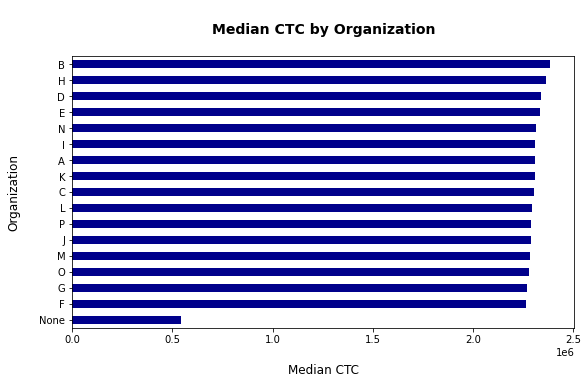

In [55]:
## Let's check the impact of Organization on Expected_CTC

listings_grouped = pd.DataFrame(df_modified.groupby(['Organization'])['Expected_CTC'].agg(np.median))
listings_grouped.reset_index(inplace=True)

# plot this 
listings_grouped.sort_values(by=['Expected_CTC'], ascending=True)\
          .plot(kind='barh', x='Organization', y='Expected_CTC', 
                figsize=(9,5), legend=False, color='darkblue')

plt.xlabel('\nMedian CTC', fontsize=12)
plt.ylabel('Organization\n', fontsize=12)
plt.title('\nMedian CTC by Organization\n', fontsize=14, fontweight='bold');

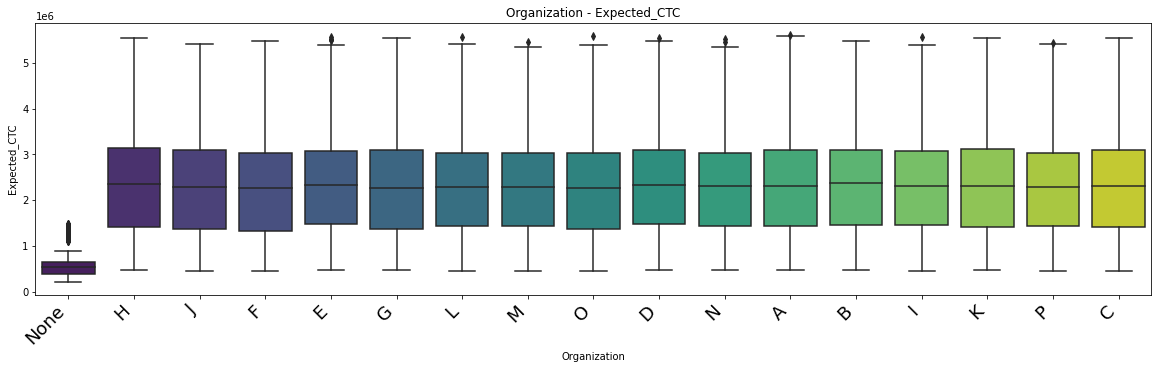

In [56]:
plt.figure(figsize=(20,5))
chart=sns.boxplot(x="Organization", y="Expected_CTC", data=df_modified, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Organization - Expected_CTC')
chart;

In [57]:
formula = 'Expected_CTC ~ C(Organization)'
model = ols(formula,df_modified[df_modified['Organization'] != 'None']).fit()
anv_table = anova_lm(model)
print(anv_table)

                      df        sum_sq       mean_sq         F    PR(>F)
C(Organization)     15.0  2.266287e+13  1.510858e+12  1.175034  0.282958
Residual         24076.0  3.095690e+16  1.285799e+12       NaN       NaN


At 95% confidence level, We see that the p-value is greater than alpha (0.05). Thus, we Accept the 𝐍𝐮𝐥𝐥 𝐇𝐲𝐩𝐨𝐭𝐡𝐞𝐬𝐢𝐬 ( 𝐻0 ). This means all category in the 'Organization' variable has same mean of rate.
Droping Organization column

In [58]:
df_modified.drop(columns=['Organization'],inplace=True)

In [59]:
df_modified.columns

Index(['Total_Experience', 'Total_Experience_in_field_applied', 'Department',
       'Role', 'Designation', 'Education', 'Graduation_Specialization',
       'University_Grad', 'Passing_Year_Of_Graduation', 'PG_Specialization',
       'University_PG', 'Passing_Year_Of_PG', 'PHD_Specialization',
       'University_PHD', 'Passing_Year_Of_PHD', 'Curent_Location',
       'Preferred_location', 'Current_CTC', 'Inhand_Offer',
       'Last_Appraisal_Rating', 'No_Of_Companies_worked',
       'Number_of_Publications', 'Certifications', 'International_degree_any',
       'Expected_CTC'],
      dtype='object')

           Designation  Expected_CTC
15           Scientist      875535.5
10                None     1495737.0
8      Medical Officer     1991381.0
9     Network Engineer     2241169.0
17          Sr.Manager     2271736.0
2           Consultant     2274871.5
18        Web Designer     2283259.0
13    Research Analyst     2298863.0
1                   CA     2302028.0
5                   HR     2308544.0
12     Product Manager     2308926.0
6              Manager     2312819.0
0    Assistant Manager     2321153.0
7    Marketing Manager     2338119.0
3         Data Analyst     2349838.0
11              Others     2350838.0
16  Software Developer     2351536.0
4             Director     2455489.5
14  Research Scientist     2784881.0


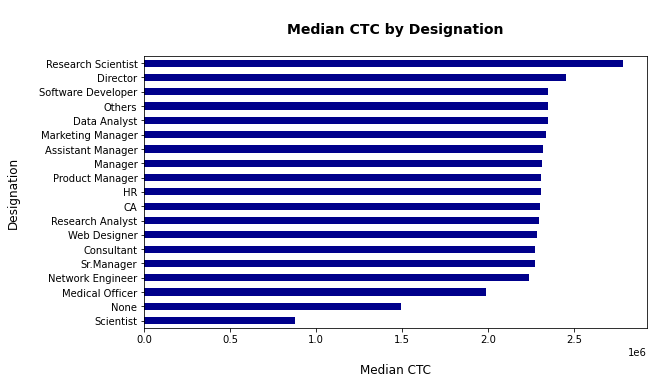

In [60]:
## Let's check the impact of Designation on Expected_CTC

listings_grouped = pd.DataFrame(df_modified.groupby(['Designation'])['Expected_CTC'].agg(np.median))
listings_grouped.reset_index(inplace=True)

print(listings_grouped.sort_values(by=['Expected_CTC'], ascending=True))

# plot this 
listings_grouped.sort_values(by=['Expected_CTC'], ascending=True)\
          .plot(kind='barh', x='Designation', y='Expected_CTC', 
                figsize=(9,5), legend=False, color='darkblue')

plt.xlabel('\nMedian CTC', fontsize=12)
plt.ylabel('Designation\n', fontsize=12)
plt.title('\nMedian CTC by Designation\n', fontsize=14, fontweight='bold');

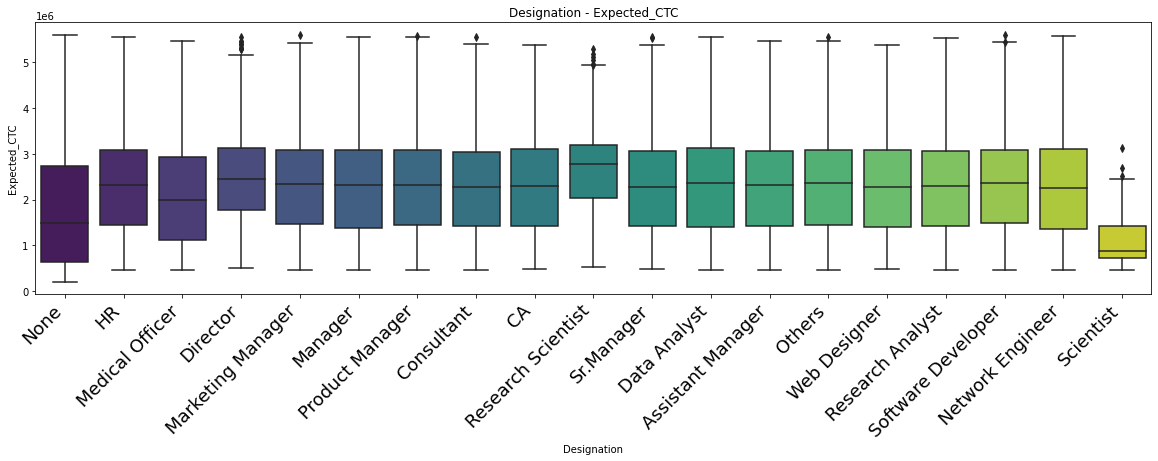

In [61]:
plt.figure(figsize=(20,5))
chart=sns.boxplot(x="Designation", y="Expected_CTC", data=df_modified, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Designation - Expected_CTC')
chart;

In [62]:
formula = 'Expected_CTC ~ C(Designation)'
model = ols(formula,df_modified[df_modified['Designation'] != 'None']).fit()
anv_table = anova_lm(model)
print(anv_table)

                     df        sum_sq       mean_sq          F        PR(>F)
C(Designation)     17.0  2.291481e+14  1.347930e+13  10.614372  3.215570e-29
Residual        21853.0  2.775135e+16  1.269910e+12        NaN           NaN


At 95% confidence level, We see that the p-value is less than alpha (0.05). Thus, we 𝐑𝐞𝐣𝐞𝐜𝐭 the 𝐍𝐮𝐥𝐥 𝐇𝐲𝐩𝐨𝐭𝐡𝐞𝐬𝐢𝐬 ( 𝐻0 ). This means at least one particular category in the 'Designation' variable has different mean of rate as compared to the other categories.

In [63]:
tukey = pairwise_tukeyhsd(endog=df_modified[df_modified['Designation'] != 'None'].Expected_CTC,
                          groups=df_modified[df_modified['Designation'] != 'None'].Designation,
                          alpha=0.05)
print(tukey)

                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                     
      group1             group2          meandiff   p-adj      lower        upper     reject
--------------------------------------------------------------------------------------------
 Assistant Manager                 CA     24130.494    1.0  -152915.0136  201176.0015  False
 Assistant Manager         Consultant   -46079.9909 0.9996  -185181.8973   93021.9155  False
 Assistant Manager       Data Analyst    17507.2052    1.0  -122274.0852  157288.4956  False
 Assistant Manager           Director   173855.3251 0.0457     1377.3028  346333.3473   True
 Assistant Manager                 HR     8591.7443    1.0  -129625.5178  146809.0063  False
 Assistant Manager            Manager    -9309.0376    1.0  -147942.5692  129324.4941  False
 Assistant Manager  Marketing Manager      892.4862    1.0  -138557.1756  140342.1479  False
 Assistant Manager    Medical Officer  -215326.9935 0.0002   -371816.1

Group 1: Research Scientist

Group 2: Network Engineer,Sr.Manager,Consultant,Web Designer,Research Analyst,CA,HR,Product Manager,Manager,Assistant Manager,Marketing Manager,Data Analyst,Others,Software Developer,Director

Group 3: Medical Officer

Group 4: Scientist

Group 5: None

In [64]:
df_modified['Designation'] = df_modified['Designation'].replace(['Research Scientist'],'Group 1')
df_modified['Designation'] = df_modified['Designation'].replace(['Network Engineer','Sr.Manager','Consultant','Web Designer','Research Analyst','CA','HR','Product Manager','Manager','Assistant Manager','Marketing Manager','Data Analyst','Others','Software Developer','Director'],'Group 2')
df_modified['Designation'] = df_modified['Designation'].replace(['Medical Officer'],'Group 3')
df_modified['Designation'] = df_modified['Designation'].replace(['Scientist'],'Group 4')

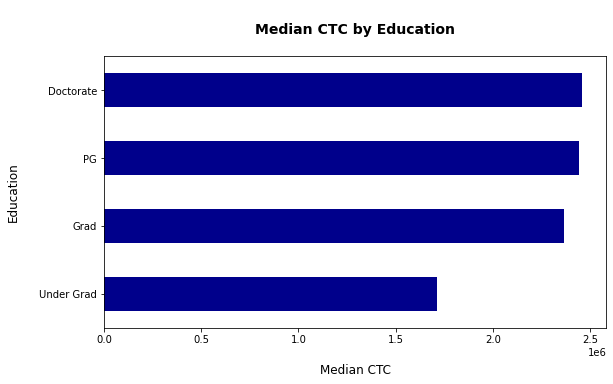

In [65]:
## Let's check the impact of Education on Expected_CTC

listings_grouped = pd.DataFrame(df_modified.groupby(['Education'])['Expected_CTC'].agg(np.median))
listings_grouped.reset_index(inplace=True)

# plot this 
listings_grouped.sort_values(by=['Expected_CTC'], ascending=True)\
          .plot(kind='barh', x='Education', y='Expected_CTC', 
                figsize=(9,5), legend=False, color='darkblue')

plt.xlabel('\nMedian CTC', fontsize=12)
plt.ylabel('Education\n', fontsize=12)
plt.title('\nMedian CTC by Education\n', fontsize=14, fontweight='bold');

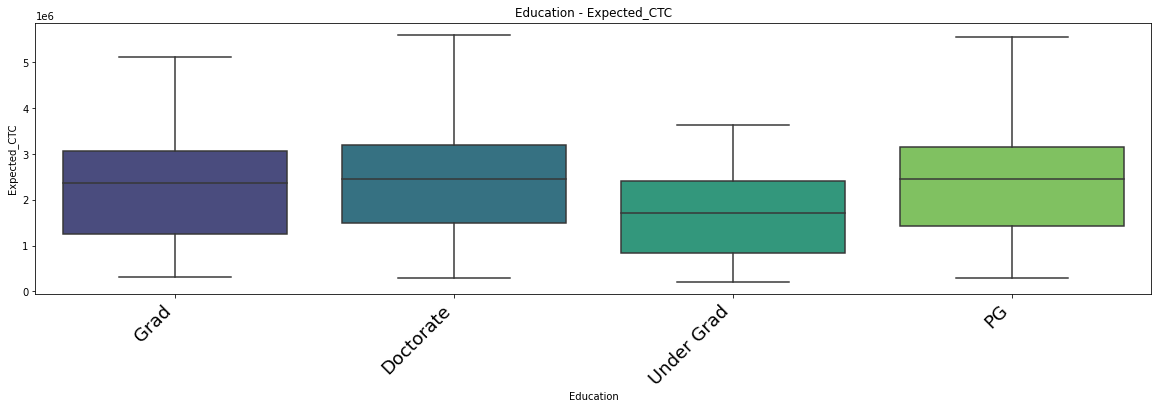

In [66]:
plt.figure(figsize=(20,5))
chart=sns.boxplot(x="Education", y="Expected_CTC", data=df_modified, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Education - Expected_CTC')
chart;

In [67]:
formula = 'Expected_CTC ~ C(Education)'
model = ols(formula,df_modified[df_modified['Education'] != 'None']).fit()
anv_table = anova_lm(model)
print(anv_table)

                   df        sum_sq       mean_sq           F  PR(>F)
C(Education)      3.0  2.363629e+15  7.878762e+14  629.135535     0.0
Residual      24996.0  3.130288e+16  1.252316e+12         NaN     NaN


At 95% confidence level, We see that the p-value is less than alpha (0.05). Thus, we 𝐑𝐞𝐣𝐞𝐜𝐭 the 𝐍𝐮𝐥𝐥 𝐇𝐲𝐩𝐨𝐭𝐡𝐞𝐬𝐢𝐬 ( 𝐻0 ). This means at least one particular category in the 'Education' variable has different mean of rate as compared to the other categories.

In [68]:
tukey = pairwise_tukeyhsd(endog=df_modified[df_modified['Education'] != 'None'].Expected_CTC,
                          groups=df_modified[df_modified['Education'] != 'None'].Education,
                          alpha=0.05)
print(tukey)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1    group2     meandiff   p-adj     lower        upper     reject
-------------------------------------------------------------------------
Doctorate       Grad  -192821.082    0.0 -286755.6252  -98886.5388   True
Doctorate         PG  -38943.9667 0.1995  -89738.0185    11850.085  False
Doctorate Under Grad -726157.5257    0.0 -770251.6274 -682063.4241   True
     Grad         PG  153877.1153 0.0005   52929.9393  254824.2912   True
     Grad Under Grad -533336.4437    0.0 -631084.0086 -435588.8788   True
       PG Under Grad  -687213.559    0.0 -744754.1857 -629672.9322   True
-------------------------------------------------------------------------


In [69]:
df_modified.columns

Index(['Total_Experience', 'Total_Experience_in_field_applied', 'Department',
       'Role', 'Designation', 'Education', 'Graduation_Specialization',
       'University_Grad', 'Passing_Year_Of_Graduation', 'PG_Specialization',
       'University_PG', 'Passing_Year_Of_PG', 'PHD_Specialization',
       'University_PHD', 'Passing_Year_Of_PHD', 'Curent_Location',
       'Preferred_location', 'Current_CTC', 'Inhand_Offer',
       'Last_Appraisal_Rating', 'No_Of_Companies_worked',
       'Number_of_Publications', 'Certifications', 'International_degree_any',
       'Expected_CTC'],
      dtype='object')

   Graduation_Specialization  Expected_CTC
6                       None     1712487.0
7                     Others     2395997.0
10                Statistics     2400597.0
5                Mathematics     2413630.0
0                       Arts     2432415.0
2                  Chemistry     2440309.0
3                  Economics     2441239.5
11                   Zoology     2454216.0
8                 Psychology     2463190.0
4                Engineering     2468082.0
1                     Botony     2537861.5
9                  Sociology     2553975.0


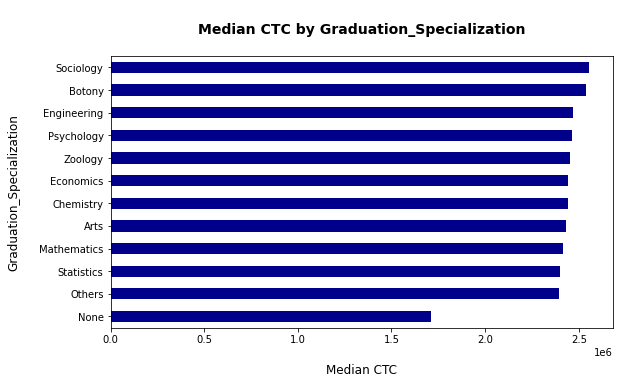

In [70]:
## Let's check the impact of Graduation_Specialization on Expected_CTC

listings_grouped = pd.DataFrame(df_modified.groupby(['Graduation_Specialization'])['Expected_CTC'].agg(np.median))
listings_grouped.reset_index(inplace=True)

print(listings_grouped.sort_values(by=['Expected_CTC'], ascending=True))

# plot this 
listings_grouped.sort_values(by=['Expected_CTC'], ascending=True)\
          .plot(kind='barh', x='Graduation_Specialization', y='Expected_CTC', 
                figsize=(9,5), legend=False, color='darkblue')

plt.xlabel('\nMedian CTC', fontsize=12)
plt.ylabel('Graduation_Specialization\n', fontsize=12)
plt.title('\nMedian CTC by Graduation_Specialization\n', fontsize=14, fontweight='bold');

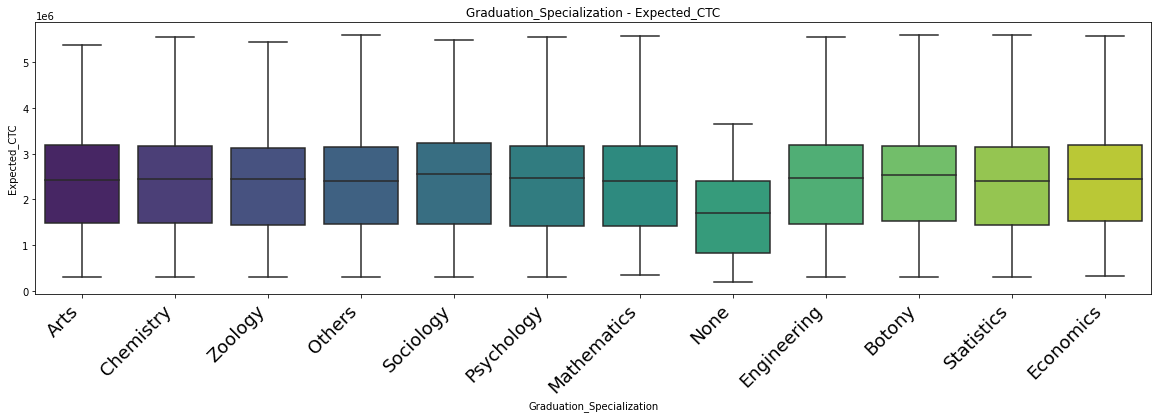

In [71]:
plt.figure(figsize=(20,5))
chart=sns.boxplot(x="Graduation_Specialization", y="Expected_CTC", data=df_modified, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Graduation_Specialization - Expected_CTC')
chart;

In [72]:
formula = 'Expected_CTC ~ C(Graduation_Specialization)'
model = ols(formula,df_modified[df_modified['Graduation_Specialization'] != 'None']).fit()
anv_table = anova_lm(model)
print(anv_table)

                                   df        sum_sq       mean_sq         F  \
C(Graduation_Specialization)     10.0  9.437514e+12  9.437514e+11  0.671034   
Residual                      18809.0  2.645323e+16  1.406414e+12       NaN   

                                PR(>F)  
C(Graduation_Specialization)  0.752457  
Residual                           NaN  


At 95% confidence level, We see that the p-value is greater than alpha (0.05). Thus, we Accept the 𝐍𝐮𝐥𝐥 𝐇𝐲𝐩𝐨𝐭𝐡𝐞𝐬𝐢𝐬 ( 𝐻0 ). This means all category in the 'Graduation_Specialization' variable has same mean of rate.

#### State the null and the alternate hypothesis for conducting two-way ANOVA for interaction

𝐻0 :  𝑇ℎ𝑒𝑟𝑒 𝑖𝑠 𝑛𝑜 𝑖𝑛𝑡𝑒𝑟𝑎𝑐𝑡𝑖𝑜𝑛 𝑏𝑒𝑡𝑤𝑒𝑒𝑛 Designation 𝑎𝑛𝑑 Graduation_Specialization 

𝐻1 :  𝑇ℎ𝑒𝑟𝑒 𝑖𝑠 𝑖𝑛𝑡𝑒𝑟𝑎𝑐𝑡𝑖𝑜𝑛 𝑏𝑒𝑡𝑤𝑒𝑒𝑛 Designation 𝑎𝑛𝑑 Graduation_Specialization

In [73]:
formula = 'Expected_CTC ~ C(Designation)+C(Graduation_Specialization)+C(Designation):C(Graduation_Specialization)'
model = ols(formula,df_modified[df_modified['Graduation_Specialization'] != 'None']).fit()
anv_table = anova_lm(model)
anv_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Designation),4.0,7.657938e+14,1.914484e+14,144.196707,1.216191e-121
C(Graduation_Specialization),10.0,8.160667e+13,8.160667e+12,6.146518,1.986449e-09
C(Designation):C(Graduation_Specialization),40.0,6.853035e+14,1.713259e+13,12.904063,9.668295e-83
Residual,18786.0,2.494197e+16,1.327689e+12,NaN,NaN


At 95% confidence level, We see that the p-value is less than alpha (0.05). Thus, we reject the 𝐍𝐮𝐥𝐥 𝐇𝐲𝐩𝐨𝐭𝐡𝐞𝐬𝐢𝐬 ( 𝐻0 ). This means 𝑇ℎ𝑒𝑟𝑒 𝑖𝑠 𝑖𝑛𝑡𝑒𝑟𝑎𝑐𝑡𝑖𝑜𝑛 𝑏𝑒𝑡𝑤𝑒𝑒𝑛 Designation 𝑎𝑛𝑑 Graduation_Specialization
Group 1: Sociology,Botony
Group 2: Engineering,Psychology,Zoology,Economics,Chemistry,Arts,Mathematics
Group 3: Others,Statistics

In [74]:
df_modified['Graduation_Specialization'] = df_modified['Graduation_Specialization'].replace(['Sociology','Botony'],'Group 1')
df_modified['Graduation_Specialization'] = df_modified['Graduation_Specialization'].replace(['Engineering','Psychology','Zoology','Economics','Chemistry','Arts','Mathematics'],'Group 2')
df_modified['Graduation_Specialization'] = df_modified['Graduation_Specialization'].replace(['Others','Statistics'],'Group 3')

   University_Grad  Expected_CTC
11            None     1712487.0
1        Bangalore     2404085.5
4         Guwahati     2405885.0
12            Pune     2409124.0
6          Kolkata     2425607.5
10          Nagpur     2438378.5
7          Lucknow     2441318.0
13           Surat     2446640.5
2      Bhubaneswar     2457959.0
5           Jaipur     2468982.0
8        Mangalore     2473870.5
0        Ahmedabad     2479590.5
3            Delhi     2493362.5
9           Mumbai     2536036.5


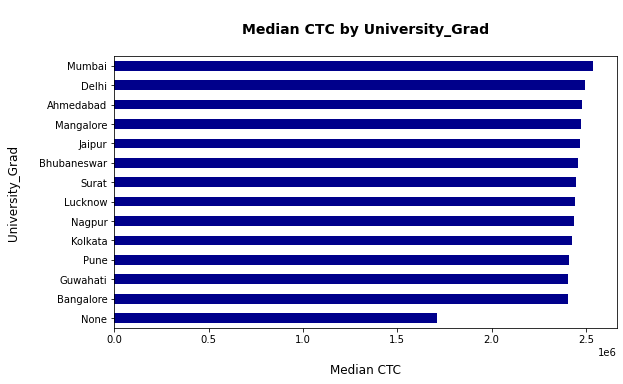

In [75]:
## Let's check the impact of University_Grad on Expected_CTC

listings_grouped = pd.DataFrame(df_modified.groupby(['University_Grad'])['Expected_CTC'].agg(np.median))
listings_grouped.reset_index(inplace=True)

print(listings_grouped.sort_values(by=['Expected_CTC'], ascending=True))

# plot this 
listings_grouped.sort_values(by=['Expected_CTC'], ascending=True)\
          .plot(kind='barh', x='University_Grad', y='Expected_CTC', 
                figsize=(9,5), legend=False, color='darkblue')

plt.xlabel('\nMedian CTC', fontsize=12)
plt.ylabel('University_Grad\n', fontsize=12)
plt.title('\nMedian CTC by University_Grad\n', fontsize=14, fontweight='bold');

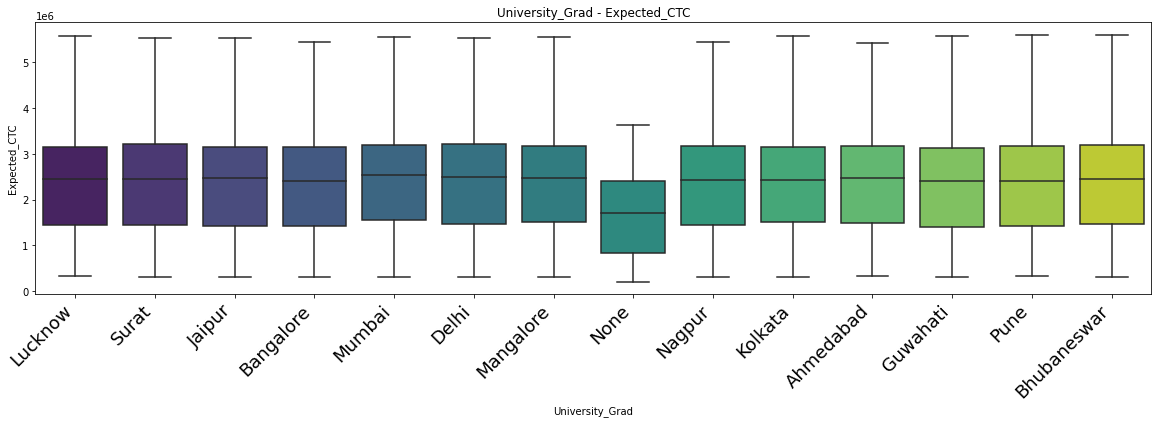

In [76]:
plt.figure(figsize=(20,5))
chart=sns.boxplot(x="University_Grad", y="Expected_CTC", data=df_modified, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('University_Grad - Expected_CTC')
chart;

In [77]:
formula = 'Expected_CTC ~ C(University_Grad)'
model = ols(formula,df_modified[df_modified['University_Grad'] != 'None']).fit()
anv_table = anova_lm(model)
print(anv_table)

                         df        sum_sq       mean_sq         F    PR(>F)
C(University_Grad)     12.0  1.020269e+13  8.502242e+11  0.604487  0.840356
Residual            18807.0  2.645247e+16  1.406522e+12       NaN       NaN


At 95% confidence level, We see that the p-value is greater than alpha (0.05). Thus, we Accept the 𝐍𝐮𝐥𝐥 𝐇𝐲𝐩𝐨𝐭𝐡𝐞𝐬𝐢𝐬 ( 𝐻0 ). This means all category in the 'University_Grad' variable has same mean of rate.

In [78]:
# According to https://en.wikipedia.org/wiki/Classification_of_Indian_cities converting city into tier -1, tier -2, tier -3
# tier-1: Ahmedabad, Bengaluru, Chennai, Delhi, Kolkata, Mumbai,Pune
# tier-2: Surat,Kanpur,Lucknow,Nagpur,Jaipur,Guwahati,Bhubaneswar
# tier-3: Mangalore

df_modified['University_Grad'] = df_modified['University_Grad'].replace(['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai','Pune'],'tier-1')
df_modified['University_Grad'] = df_modified['University_Grad'].replace(['Surat','Kanpur','Lucknow','Nagpur','Jaipur','Guwahati','Bhubaneswar'],'tier-2')
df_modified['University_Grad'] = df_modified['University_Grad'].replace(['Mangalore'],'tier-3')

   PG_Specialization  Expected_CTC
9          Sociology     2549601.0
8         Psychology     2477275.0
1             Botony     2476142.0
4        Engineering     2469489.0
7             Others     2452897.0
2          Chemistry     2448911.0
3          Economics     2443205.0
11           Zoology     2443040.0
0               Arts     2431075.0
5        Mathematics     2413630.0
10        Statistics     2377536.0
6               None     1812405.5


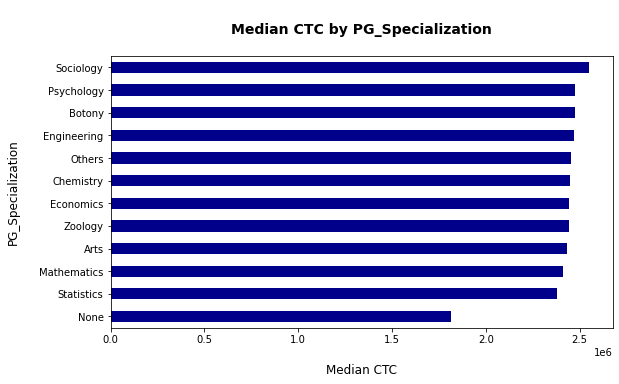

In [79]:
## Let's check the impact of PG_Specialization on Expected_CTC

listings_grouped = pd.DataFrame(df_modified.groupby(['PG_Specialization'])['Expected_CTC'].agg(np.median))
listings_grouped.reset_index(inplace=True)

print(listings_grouped.sort_values(by=['Expected_CTC'], ascending=False))

# plot this 
listings_grouped.sort_values(by=['Expected_CTC'], ascending=True)\
          .plot(kind='barh', x='PG_Specialization', y='Expected_CTC', 
                figsize=(9,5), legend=False, color='darkblue')

plt.xlabel('\nMedian CTC', fontsize=12)
plt.ylabel('PG_Specialization\n', fontsize=12)
plt.title('\nMedian CTC by PG_Specialization\n', fontsize=14, fontweight='bold');

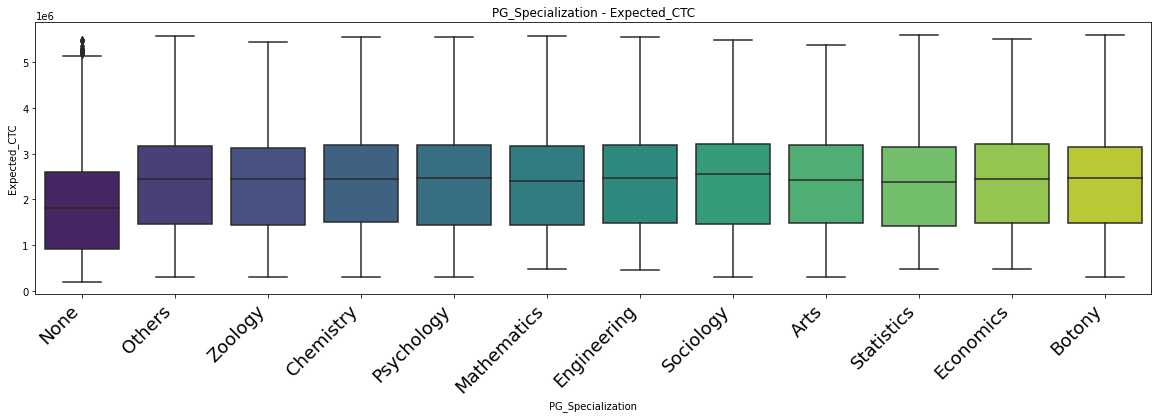

In [80]:
plt.figure(figsize=(20,5))
chart=sns.boxplot(x="PG_Specialization", y="Expected_CTC", data=df_modified, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('PG_Specialization - Expected_CTC')
chart;

In [81]:
formula = 'Expected_CTC ~ C(PG_Specialization)'
model = ols(formula,df_modified[df_modified['PG_Specialization'] != 'None']).fit()
anv_table = anova_lm(model)
print(anv_table)

                           df        sum_sq       mean_sq         F    PR(>F)
C(PG_Specialization)     10.0  1.237396e+13  1.237396e+12  0.883616  0.547741
Residual              17297.0  2.422234e+16  1.400378e+12       NaN       NaN


At 95% confidence level, We see that the p-value is greater than alpha (0.05). Thus, we Accept the 𝐍𝐮𝐥𝐥 𝐇𝐲𝐩𝐨𝐭𝐡𝐞𝐬𝐢𝐬 ( 𝐻0 ). This means all category in the 'PG_Specialization' variable has same mean of rate.

#### State the null and the alternate hypothesis for conducting two-way ANOVA for interaction

𝐻0 :  𝑇ℎ𝑒𝑟𝑒 𝑖𝑠 𝑛𝑜 𝑖𝑛𝑡𝑒𝑟𝑎𝑐𝑡𝑖𝑜𝑛 𝑏𝑒𝑡𝑤𝑒𝑒𝑛 Designation 𝑎𝑛𝑑 PG_Specialization 

𝐻1 :  𝑇ℎ𝑒𝑟𝑒 𝑖𝑠 𝑖𝑛𝑡𝑒𝑟𝑎𝑐𝑡𝑖𝑜𝑛 𝑏𝑒𝑡𝑤𝑒𝑒𝑛 Designation 𝑎𝑛𝑑 PG_Specialization

In [82]:
formula = 'Expected_CTC ~ C(Designation)+C(PG_Specialization)+C(Designation):C(PG_Specialization)'
model = ols(formula,df_modified[df_modified['PG_Specialization'] != 'None']).fit()
anv_table = anova_lm(model)
anv_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Designation),4.0,7.615459e+14,1.903865e+14,143.554272,6.077508e-121
C(PG_Specialization),10.0,5.410402e+13,5.410402e+12,4.079524,1.246053e-05
C(Designation):C(PG_Specialization),40.0,5.301759e+14,1.325440e+13,9.994015,4.740998e-60
Residual,17271.0,2.290538e+16,1.326233e+12,NaN,NaN


At 95% confidence level, We see that the p-value is less than alpha (0.05). Thus, we reject the 𝐍𝐮𝐥𝐥 𝐇𝐲𝐩𝐨𝐭𝐡𝐞𝐬𝐢𝐬 ( 𝐻0 ). This means 𝑇ℎ𝑒𝑟𝑒 𝑖𝑠 𝑖𝑛𝑡𝑒𝑟𝑎𝑐𝑡𝑖𝑜𝑛 𝑏𝑒𝑡𝑤𝑒𝑒𝑛 Designation 𝑎𝑛𝑑 PG_Specialization
Group 1: Sociology
Group 2: Psychology,Botony,Engineering,Others,Chemistry,Economics,Zoology,Arts,Mathematics
Group 3: Statistics

In [83]:
df_modified['PG_Specialization'] = df_modified['PG_Specialization'].replace(['Sociology'],'Group 1')
df_modified['PG_Specialization'] = df_modified['PG_Specialization'].replace(['Psychology','Botony','Engineering','Others','Chemistry','Economics','Zoology','Arts','Mathematics'],'Group 2')
df_modified['PG_Specialization'] = df_modified['PG_Specialization'].replace(['Statistics'],'Group 3')

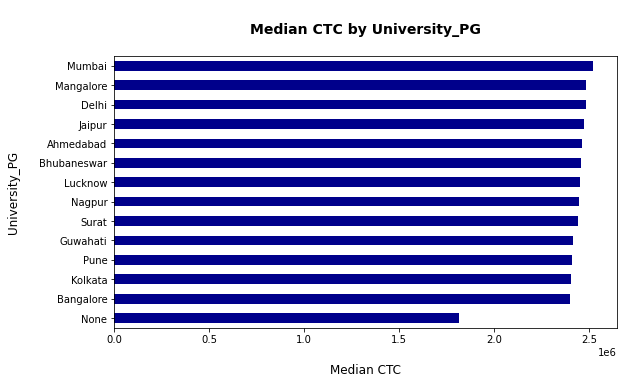

In [84]:
## Let's check the impact of University_PG on Expected_CTC

listings_grouped = pd.DataFrame(df_modified.groupby(['University_PG'])['Expected_CTC'].agg(np.median))
listings_grouped.reset_index(inplace=True)

# plot this 
listings_grouped.sort_values(by=['Expected_CTC'], ascending=True)\
          .plot(kind='barh', x='University_PG', y='Expected_CTC', 
                figsize=(9,5), legend=False, color='darkblue')

plt.xlabel('\nMedian CTC', fontsize=12)
plt.ylabel('University_PG\n', fontsize=12)
plt.title('\nMedian CTC by University_PG\n', fontsize=14, fontweight='bold');

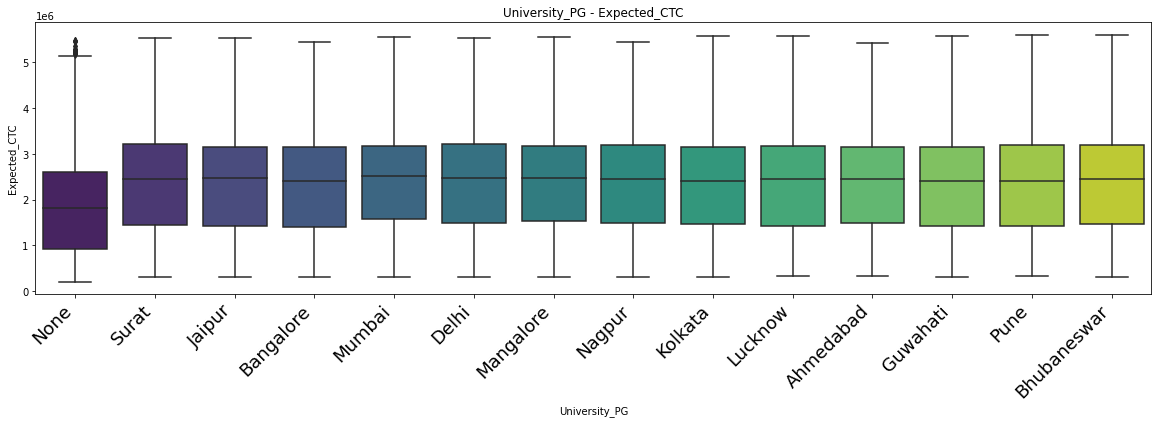

In [85]:
plt.figure(figsize=(20,5))
chart=sns.boxplot(x="University_PG", y="Expected_CTC", data=df_modified, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('University_PG - Expected_CTC')
chart;

In [86]:
formula = 'Expected_CTC ~ C(University_PG)'
model = ols(formula,df_modified[df_modified['University_PG'] != 'None']).fit()
anv_table = anova_lm(model)
print(anv_table)

                       df        sum_sq       mean_sq        F   PR(>F)
C(University_PG)     12.0  9.550720e+12  7.958934e+11  0.56821  0.86933
Residual          17295.0  2.422517e+16  1.400704e+12      NaN      NaN


At 95% confidence level, We see that the p-value is greater than alpha (0.05). Thus, we Accept the 𝐍𝐮𝐥𝐥 𝐇𝐲𝐩𝐨𝐭𝐡𝐞𝐬𝐢𝐬 ( 𝐻0 ). This means all category in the 'University_PG' variable has same mean of rate.

In [87]:
# According to https://en.wikipedia.org/wiki/Classification_of_Indian_cities converting city into tier -1, tier -2, tier -3
# tier-1: Ahmedabad, Bengaluru, Chennai, Delhi, Kolkata, Mumbai,Pune
# tier-2: Surat,Kanpur,Lucknow,Nagpur,Jaipur,Guwahati,Bhubaneswar
# tier-3: Mangalore

df_modified['University_PG'] = df_modified['University_PG'].replace(['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai','Pune'],'tier-1')
df_modified['University_PG'] = df_modified['University_PG'].replace(['Surat','Kanpur','Lucknow','Nagpur','Jaipur','Guwahati','Bhubaneswar'],'tier-2')
df_modified['University_PG'] = df_modified['University_PG'].replace(['Mangalore'],'tier-3')

   PHD_Specialization  Expected_CTC
9           Sociology     2525882.0
4         Engineering     2483053.0
7              Others     2471191.0
3           Economics     2464665.0
11            Zoology     2464104.0
0                Arts     2461353.0
1              Botony     2450220.0
8          Psychology     2437384.0
10         Statistics     2430893.5
2           Chemistry     2429210.5
5         Mathematics     2366118.5
6                None     1991875.0


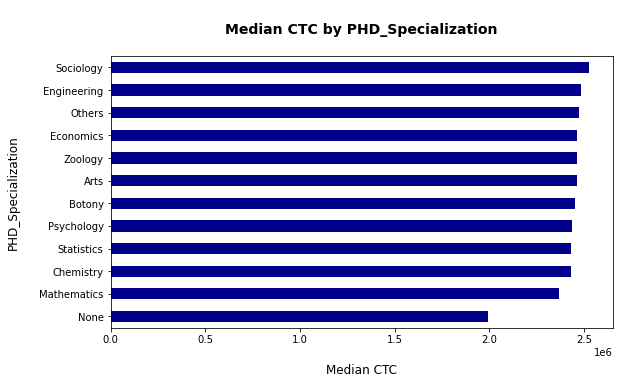

In [88]:
## Let's check the impact of PHD_Specialization on Expected_CTC

listings_grouped = pd.DataFrame(df_modified.groupby(['PHD_Specialization'])['Expected_CTC'].agg(np.median))
listings_grouped.reset_index(inplace=True)

print(listings_grouped.sort_values(by=['Expected_CTC'], ascending=False))
# plot this 
listings_grouped.sort_values(by=['Expected_CTC'], ascending=True)\
          .plot(kind='barh', x='PHD_Specialization', y='Expected_CTC', 
                figsize=(9,5), legend=False, color='darkblue')

plt.xlabel('\nMedian CTC', fontsize=12)
plt.ylabel('PHD_Specialization\n', fontsize=12)
plt.title('\nMedian CTC by PHD_Specialization\n', fontsize=14, fontweight='bold');

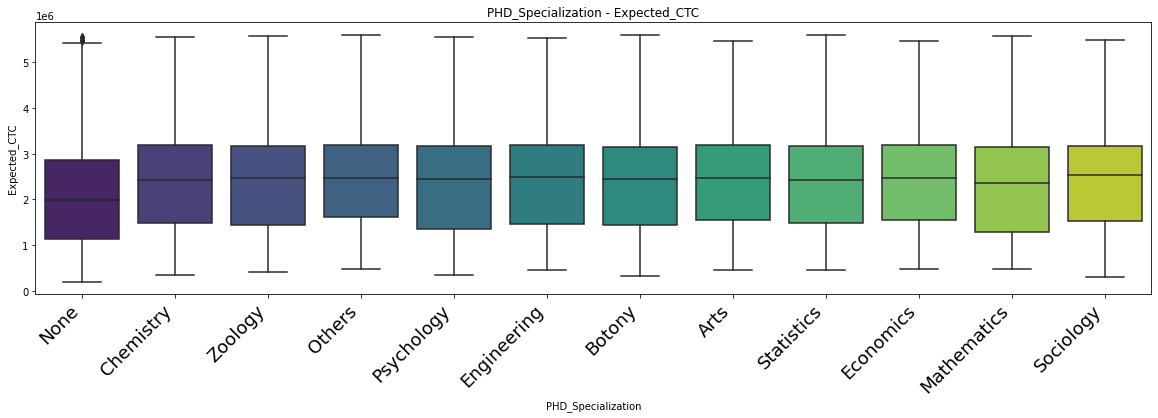

In [89]:
plt.figure(figsize=(20,5))
chart=sns.boxplot(x="PHD_Specialization", y="Expected_CTC", data=df_modified, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('PHD_Specialization - Expected_CTC')
chart;

In [90]:
formula = 'Expected_CTC ~ C(PHD_Specialization)'
model = ols(formula,df_modified[df_modified['PHD_Specialization'] != 'None']).fit()
anv_table = anova_lm(model)
print(anv_table)

                            df        sum_sq       mean_sq         F    PR(>F)
C(PHD_Specialization)     10.0  2.093442e+13  2.093442e+12  1.501675  0.131598
Residual               13108.0  1.827348e+16  1.394071e+12       NaN       NaN


At 95% confidence level, We see that the p-value is greater than alpha (0.05). Thus, we Accept the 𝐍𝐮𝐥𝐥 𝐇𝐲𝐩𝐨𝐭𝐡𝐞𝐬𝐢𝐬 ( 𝐻0 ). This means all category in the 'PHD_Specialization' variable has same mean of rate.

#### State the null and the alternate hypothesis for conducting two-way ANOVA for interaction

𝐻0 :  𝑇ℎ𝑒𝑟𝑒 𝑖𝑠 𝑛𝑜 𝑖𝑛𝑡𝑒𝑟𝑎𝑐𝑡𝑖𝑜𝑛 𝑏𝑒𝑡𝑤𝑒𝑒𝑛 Designation 𝑎𝑛𝑑 PHD_Specialization 

𝐻1 :  𝑇ℎ𝑒𝑟𝑒 𝑖𝑠 𝑖𝑛𝑡𝑒𝑟𝑎𝑐𝑡𝑖𝑜𝑛 𝑏𝑒𝑡𝑤𝑒𝑒𝑛 Designation 𝑎𝑛𝑑 PHD_Specialization

In [91]:
formula = 'Expected_CTC ~ C(Designation)+C(PHD_Specialization)+C(Designation):C(PHD_Specialization)'
model = ols(formula,df_modified[df_modified['PHD_Specialization'] != 'None']).fit()
anv_table = anova_lm(model)
anv_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Designation),4.0,5.650872e+14,1.412718e+14,107.038137,6.854587e-90
C(PHD_Specialization),10.0,3.498825e+13,3.498825e+12,2.650973,3.133030e-03
C(Designation):C(PHD_Specialization),40.0,4.504484e+14,1.126121e+13,8.532340,1.035776e-48
Residual,13078.0,1.726070e+16,1.319827e+12,NaN,NaN


At 95% confidence level, We see that the p-value is less than alpha (0.05). Thus, we reject the 𝐍𝐮𝐥𝐥 𝐇𝐲𝐩𝐨𝐭𝐡𝐞𝐬𝐢𝐬 ( 𝐻0 ). This means 𝑇ℎ𝑒𝑟𝑒 𝑖𝑠 𝑖𝑛𝑡𝑒𝑟𝑎𝑐𝑡𝑖𝑜𝑛 𝑏𝑒𝑡𝑤𝑒𝑒𝑛 Designation 𝑎𝑛𝑑 PHD_Specialization

Group 1: Sociology

Group 2: Engineering,Others,Economics,Zoology,Arts,Botony,Psychology,Statistics,Chemistry

Group 3: Mathematics

In [92]:
df_modified['PHD_Specialization'] = df_modified['PHD_Specialization'].replace(['Sociology'],'Group 1')
df_modified['PHD_Specialization'] = df_modified['PHD_Specialization'].replace(['Engineering','Others','Economics','Zoology','Arts','Botony','Psychology','Statistics','Chemistry'],'Group 2')
df_modified['PHD_Specialization'] = df_modified['PHD_Specialization'].replace(['Mathematics'],'Group 3')

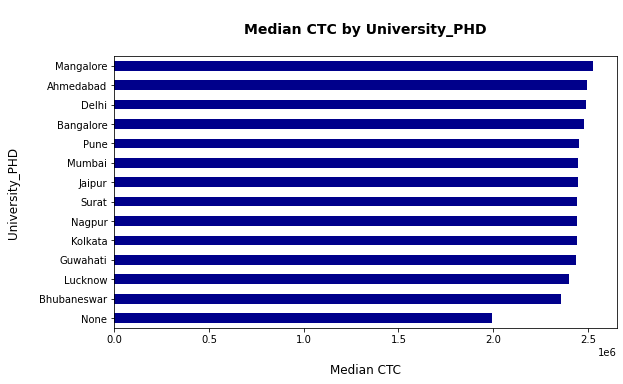

In [93]:
## Let's check the impact of University_PHD on Expected_CTC

listings_grouped = pd.DataFrame(df_modified.groupby(['University_PHD'])['Expected_CTC'].agg(np.median))
listings_grouped.reset_index(inplace=True)

# plot this 
listings_grouped.sort_values(by=['Expected_CTC'], ascending=True)\
          .plot(kind='barh', x='University_PHD', y='Expected_CTC', 
                figsize=(9,5), legend=False, color='darkblue')

plt.xlabel('\nMedian CTC', fontsize=12)
plt.ylabel('University_PHD\n', fontsize=12)
plt.title('\nMedian CTC by University_PHD\n', fontsize=14, fontweight='bold');

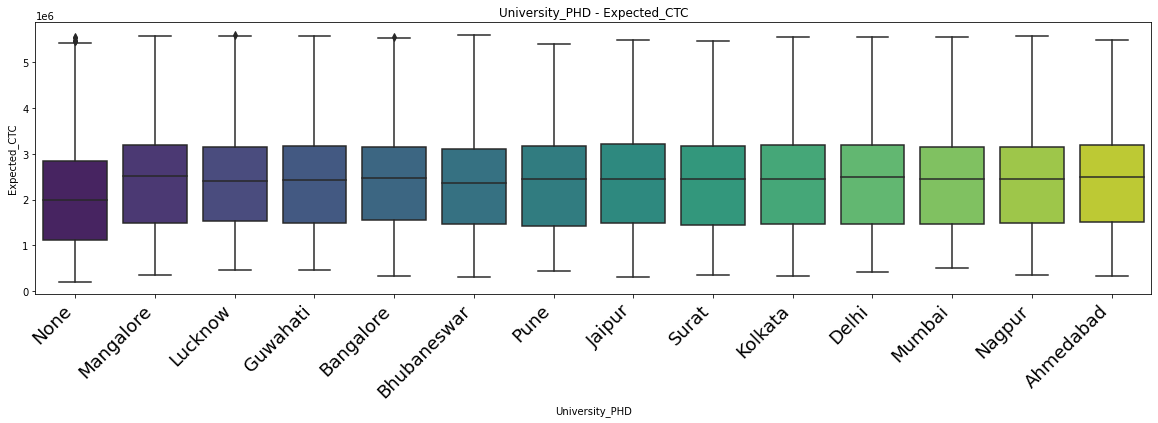

In [94]:
plt.figure(figsize=(20,5))
chart=sns.boxplot(x="University_PHD", y="Expected_CTC", data=df_modified, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('University_PHD - Expected_CTC')
chart;

In [95]:
formula = 'Expected_CTC ~ C(University_PHD)'
model = ols(formula,df_modified[df_modified['University_PHD'] != 'None']).fit()
anv_table = anova_lm(model)
print(anv_table)

                        df        sum_sq       mean_sq         F    PR(>F)
C(University_PHD)     12.0  8.209932e+12  6.841610e+11  0.490348  0.921763
Residual           13106.0  1.828621e+16  1.395255e+12       NaN       NaN


At 95% confidence level, We see that the p-value is greater than alpha (0.05). Thus, we Accept the 𝐍𝐮𝐥𝐥 𝐇𝐲𝐩𝐨𝐭𝐡𝐞𝐬𝐢𝐬 ( 𝐻0 ). This means all category in the 'University_PHD' variable has same mean of rate.

In [96]:
# According to https://en.wikipedia.org/wiki/Classification_of_Indian_cities converting city into tier -1, tier -2, tier -3
# tier-1: Ahmedabad, Bengaluru, Chennai, Delhi, Kolkata, Mumbai,Pune
# tier-2: Surat,Kanpur,Lucknow,Nagpur,Jaipur,Guwahati,Bhubaneswar
# tier-3: Mangalore

df_modified['University_PHD'] = df_modified['University_PHD'].replace(['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai','Pune'],'tier-1')
df_modified['University_PHD'] = df_modified['University_PHD'].replace(['Surat','Kanpur','Lucknow','Nagpur','Jaipur','Guwahati','Bhubaneswar'],'tier-2')
df_modified['University_PHD'] = df_modified['University_PHD'].replace(['Mangalore'],'tier-3')

0       Ahmedabad
1       Bangalore
4           Delhi
14          Surat
11         Mumbai
7          Kanpur
13           Pune
9         Lucknow
12         Nagpur
8         Kolkata
6          Jaipur
3         Chennai
5        Guwahati
10      Mangalore
2     Bhubaneswar
Name: Curent_Location, dtype: object


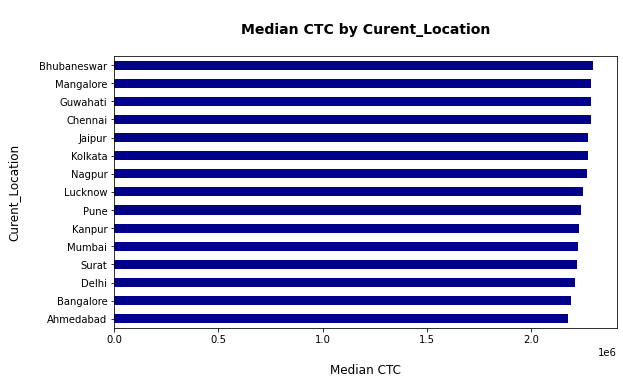

In [97]:
## Let's check the impact of Curent_Location on Expected_CTC

listings_grouped = pd.DataFrame(df_modified.groupby(['Curent_Location'])['Expected_CTC'].agg(np.median))
listings_grouped.reset_index(inplace=True)

print(listings_grouped.sort_values(by=['Expected_CTC'], ascending=True)['Curent_Location'])

# plot this 
listings_grouped.sort_values(by=['Expected_CTC'], ascending=True)\
          .plot(kind='barh', x='Curent_Location', y='Expected_CTC', 
                figsize=(9,5), legend=False, color='darkblue')

plt.xlabel('\nMedian CTC', fontsize=12)
plt.ylabel('Curent_Location\n', fontsize=12)
plt.title('\nMedian CTC by Curent_Location\n', fontsize=14, fontweight='bold');

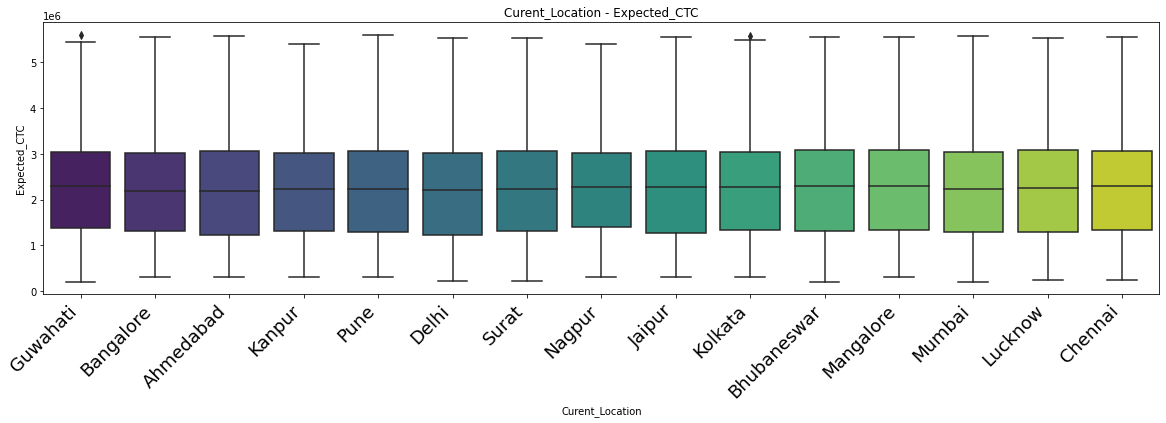

In [98]:
plt.figure(figsize=(20,5))
chart=sns.boxplot(x="Curent_Location", y="Expected_CTC", data=df_modified, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Curent_Location - Expected_CTC')
chart;

In [99]:
formula = 'Expected_CTC ~ C(Curent_Location)'
model = ols(formula,df_modified[df_modified['Curent_Location'] != 'None']).fit()
anv_table = anova_lm(model)
print(anv_table)

                         df        sum_sq       mean_sq         F    PR(>F)
C(Curent_Location)     14.0  1.470852e+13  1.050609e+12  0.780031  0.692256
Residual            24985.0  3.365180e+16  1.346880e+12       NaN       NaN


At 95% confidence level, We see that the p-value is greater than alpha (0.05). Thus, we Accept the 𝐍𝐮𝐥𝐥 𝐇𝐲𝐩𝐨𝐭𝐡𝐞𝐬𝐢𝐬 ( 𝐻0 ). This means all category in the 'Curent_Location' variable has same mean of rate.

In [100]:
# According to https://en.wikipedia.org/wiki/Classification_of_Indian_cities converting city into tier -1, tier -2, tier -3
# tier-1: Ahmedabad, Bengaluru, Chennai, Delhi, Kolkata, Mumbai,Pune
# tier-2: Surat,Kanpur,Lucknow,Nagpur,Jaipur,Guwahati,Bhubaneswar
# tier-3: Mangalore

df_modified['Curent_Location'] = df_modified['Curent_Location'].replace(['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai','Pune'],'tier-1')
df_modified['Curent_Location'] = df_modified['Curent_Location'].replace(['Surat','Kanpur','Lucknow','Nagpur','Jaipur','Guwahati','Bhubaneswar'],'tier-2')
df_modified['Curent_Location'] = df_modified['Curent_Location'].replace(['Mangalore'],'tier-3')

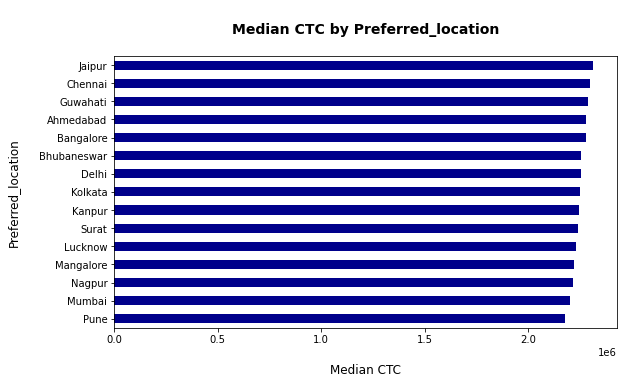

In [101]:
## Let's check the impact of Preferred_location on Expected_CTC

listings_grouped = pd.DataFrame(df_modified.groupby(['Preferred_location'])['Expected_CTC'].agg(np.median))
listings_grouped.reset_index(inplace=True)

listings_grouped.sort_values(by=['Expected_CTC'], ascending=True).plot(kind='barh', x='Preferred_location', y='Expected_CTC', 
                figsize=(9,5), legend=False, color='darkblue')

plt.xlabel('\nMedian CTC', fontsize=12)
plt.ylabel('Preferred_location\n', fontsize=12)
plt.title('\nMedian CTC by Preferred_location\n', fontsize=14, fontweight='bold');

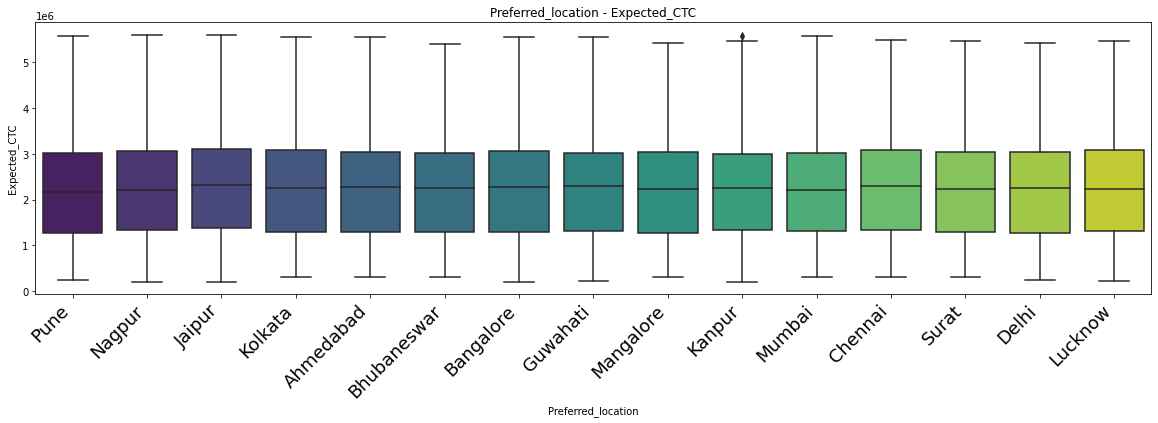

In [102]:
plt.figure(figsize=(20,5))
chart=sns.boxplot(x="Preferred_location", y="Expected_CTC", data=df_modified, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Preferred_location - Expected_CTC')
chart;

In [103]:
formula = 'Expected_CTC ~ C(Preferred_location)'
model = ols(formula,df_modified[df_modified['Preferred_location'] != 'None']).fit()
anv_table = anova_lm(model)
print(anv_table)

                            df        sum_sq       mean_sq         F    PR(>F)
C(Preferred_location)     14.0  1.546245e+13  1.104461e+12  0.820033  0.647939
Residual               24985.0  3.365105e+16  1.346850e+12       NaN       NaN


At 95% confidence level, We see that the p-value is greater than alpha (0.05). Thus, we Accept the 𝐍𝐮𝐥𝐥 𝐇𝐲𝐩𝐨𝐭𝐡𝐞𝐬𝐢𝐬 ( 𝐻0 ). This means all category in the 'Preferred_location' variable has same mean of rate.

In [104]:
# According to https://en.wikipedia.org/wiki/Classification_of_Indian_cities converting city into tier -1, tier -2, tier -3
# tier-1: Ahmedabad, Bengaluru, Chennai, Delhi, Kolkata, Mumbai,Pune
# tier-2: Surat,Kanpur,Lucknow,Nagpur,Jaipur,Guwahati,Bhubaneswar
# tier-3: Mangalore

df_modified['Preferred_location'] = df_modified['Preferred_location'].replace(['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai','Pune'],'tier-1')
df_modified['Preferred_location'] = df_modified['Preferred_location'].replace(['Surat','Kanpur','Lucknow','Nagpur','Jaipur','Guwahati','Bhubaneswar'],'tier-2')
df_modified['Preferred_location'] = df_modified['Preferred_location'].replace(['Mangalore'],'tier-3')

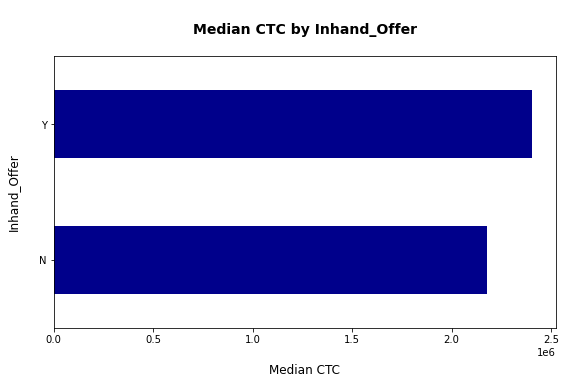

In [105]:
## Let's check the impact of Inhand_Offer on Expected_CTC

listings_grouped = pd.DataFrame(df_modified.groupby(['Inhand_Offer'])['Expected_CTC'].agg(np.median))
listings_grouped.reset_index(inplace=True)

# plot this 
listings_grouped.sort_values(by=['Expected_CTC'], ascending=True)\
          .plot(kind='barh', x='Inhand_Offer', y='Expected_CTC', 
                figsize=(9,5), legend=False, color='darkblue')

plt.xlabel('\nMedian CTC', fontsize=12)
plt.ylabel('Inhand_Offer\n', fontsize=12)
plt.title('\nMedian CTC by Inhand_Offer\n', fontsize=14, fontweight='bold');

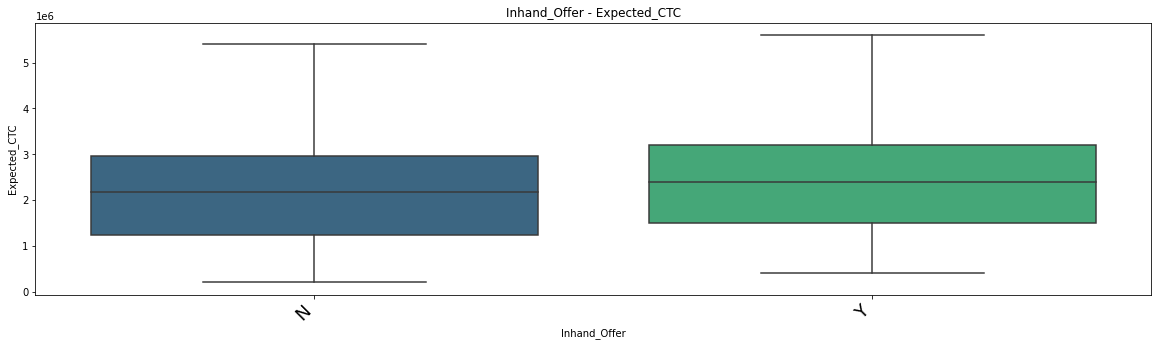

In [106]:
plt.figure(figsize=(20,5))
chart=sns.boxplot(x="Inhand_Offer", y="Expected_CTC", data=df_modified, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Inhand_Offer - Expected_CTC')
chart;

In [107]:
formula = 'Expected_CTC ~ C(Inhand_Offer)'
model = ols(formula,df_modified).fit()
anv_table = anova_lm(model)
print(anv_table)

                      df        sum_sq       mean_sq           F        PR(>F)
C(Inhand_Offer)      1.0  3.474004e+14  3.474004e+14  260.640658  2.455484e-58
Residual         24998.0  3.331911e+16  1.332871e+12         NaN           NaN


At 95% confidence level, We see that the p-value is less than alpha (0.05). Thus, we 𝐑𝐞𝐣𝐞𝐜𝐭 the 𝐍𝐮𝐥𝐥 𝐇𝐲𝐩𝐨𝐭𝐡𝐞𝐬𝐢𝐬 ( 𝐻0 ). This means at least one particular category in the 'Inhand_Offer' variable has different mean of rate as compared to the other categories.

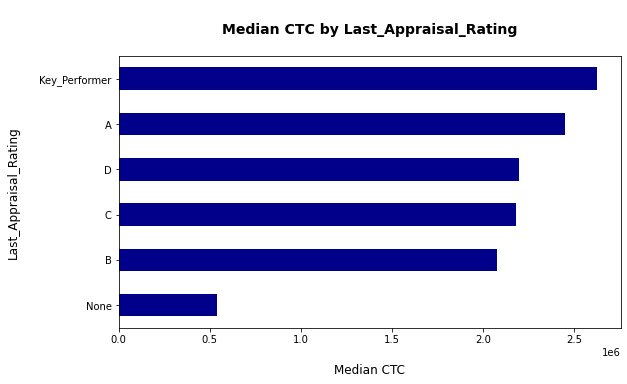

In [108]:
## Let's check the impact of Last_Appraisal_Rating on Expected_CTC

listings_grouped = pd.DataFrame(df_modified.groupby(['Last_Appraisal_Rating'])['Expected_CTC'].agg(np.median))
listings_grouped.reset_index(inplace=True)

# plot this 
listings_grouped.sort_values(by=['Expected_CTC'], ascending=True)\
          .plot(kind='barh', x='Last_Appraisal_Rating', y='Expected_CTC', 
                figsize=(9,5), legend=False, color='darkblue')

plt.xlabel('\nMedian CTC', fontsize=12)
plt.ylabel('Last_Appraisal_Rating\n', fontsize=12)
plt.title('\nMedian CTC by Last_Appraisal_Rating\n', fontsize=14, fontweight='bold');

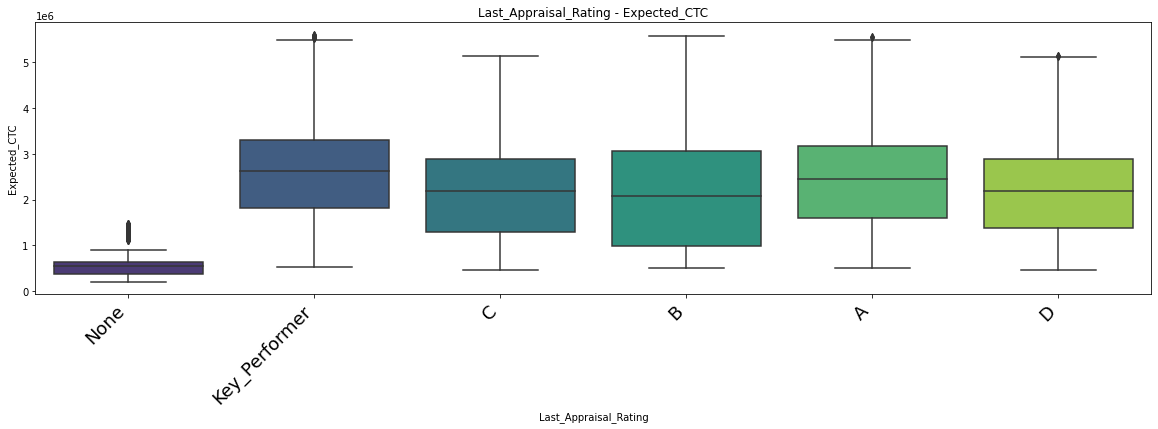

In [109]:
plt.figure(figsize=(20,5))
chart=sns.boxplot(x="Last_Appraisal_Rating", y="Expected_CTC", data=df_modified, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Last_Appraisal_Rating - Expected_CTC')
chart;

In [110]:
formula = 'Expected_CTC ~ C(Last_Appraisal_Rating)'
model = ols(formula,df_modified[df_modified['Last_Appraisal_Rating'] != 'None']).fit()
anv_table = anova_lm(model)
print(anv_table)

                               df        sum_sq       mean_sq           F  \
C(Last_Appraisal_Rating)      4.0  1.112224e+15  2.780559e+14  224.242724   
Residual                  24087.0  2.986733e+16  1.239977e+12         NaN   

                                 PR(>F)  
C(Last_Appraisal_Rating)  2.518345e-189  
Residual                            NaN  


At 95% confidence level, We see that the p-value is less than alpha (0.05). Thus, we 𝐑𝐞𝐣𝐞𝐜𝐭 the 𝐍𝐮𝐥𝐥 𝐇𝐲𝐩𝐨𝐭𝐡𝐞𝐬𝐢𝐬 ( 𝐻0 ). This means at least one particular category in the 'Last_Appraisal_Rating' variable has different mean of rate as compared to the other categories.

In [111]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Experience                   25000 non-null  int64  
 1   Total_Experience_in_field_applied  25000 non-null  int64  
 2   Department                         25000 non-null  object 
 3   Role                               25000 non-null  object 
 4   Designation                        25000 non-null  object 
 5   Education                          25000 non-null  object 
 6   Graduation_Specialization          25000 non-null  object 
 7   University_Grad                    25000 non-null  object 
 8   Passing_Year_Of_Graduation         25000 non-null  float64
 9   PG_Specialization                  25000 non-null  object 
 10  University_PG                      25000 non-null  object 
 11  Passing_Year_Of_PG                 25000 non-null  flo

In [112]:
df_modified['Education'].unique()
df_modified.shape[0]
df_modified.loc[2]['Passing_Year_Of_PG']

1992.0

In [113]:
filtered_values = np.where((df_modified['Passing_Year_Of_PG'] != 0) & (df_modified['Passing_Year_Of_PG'] <= df_modified['Passing_Year_Of_Graduation']))
print(df_modified.loc[filtered_values]['Education'].value_counts())

filtered_values = np.where((df_modified['Passing_Year_Of_PHD'] != 0) & (df_modified['Passing_Year_Of_PHD'] <= df_modified['Passing_Year_Of_PG']))
print(df_modified.loc[filtered_values]['Education'].value_counts())

for i in range(df_modified.shape[0]):
    if df_modified.loc[i]['Passing_Year_Of_PG'] != 0:
        if df_modified.loc[i]['Passing_Year_Of_PG'] <= df_modified.loc[i]['Passing_Year_Of_Graduation']:
           df_modified.loc[i,'Passing_Year_Of_PG'] =  df_modified.loc[i]['Passing_Year_Of_Graduation'] + 2

filtered_values = np.where((df_modified['Passing_Year_Of_PG'] != 0) & (df_modified['Passing_Year_Of_PG'] <= df_modified['Passing_Year_Of_Graduation']))
print(df_modified.loc[filtered_values]['Education'].value_counts().sum())

PG    934
Name: Education, dtype: int64
Series([], Name: Education, dtype: int64)
0


### Label encoding

In [114]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Experience                   25000 non-null  int64  
 1   Total_Experience_in_field_applied  25000 non-null  int64  
 2   Department                         25000 non-null  object 
 3   Role                               25000 non-null  object 
 4   Designation                        25000 non-null  object 
 5   Education                          25000 non-null  object 
 6   Graduation_Specialization          25000 non-null  object 
 7   University_Grad                    25000 non-null  object 
 8   Passing_Year_Of_Graduation         25000 non-null  float64
 9   PG_Specialization                  25000 non-null  object 
 10  University_PG                      25000 non-null  object 
 11  Passing_Year_Of_PG                 25000 non-null  flo

In [115]:
# label encoding Department
print(df_modified['Department'].unique())
df_modified['Department'] = df_modified['Department'].replace({'None':0, 'Group 3': 1, 'Group 2': 2, 'Group 1':3})
print(df_modified['Department'].unique())

['None' 'Group 2' 'Group 1' 'Group 3']
[0 2 3 1]


In [116]:
print(df_modified['Role'].unique())
df_modified['Role'] = df_modified['Role'].replace({'None':0, 'Group 3': 1, 'Group 2': 2, 'Group 1':3})
print(df_modified['Role'].unique())

['None' 'Group 2' 'Group 1' 'Group 3']
[0 2 3 1]


In [117]:
print(df_modified['Designation'].unique())
df_modified['Designation'] = df_modified['Designation'].replace({'None':0, 'Group 4': 1, 'Group 3': 2, 'Group 2': 3, 'Group 1':4})
print(df_modified['Designation'].unique())

['None' 'Group 2' 'Group 3' 'Group 1' 'Group 4']
[0 3 2 4 1]


In [118]:
print(df_modified['Education'].unique())
df_modified['Education'] = df_modified['Education'].replace({'Under Grad':0, 'Grad': 1, 'PG': 2, 'Doctorate': 3})
print(df_modified['Education'].unique())

['Grad' 'Doctorate' 'Under Grad' 'PG']
[1 3 0 2]


In [119]:
print(df_modified['Graduation_Specialization'].unique())
df_modified['Graduation_Specialization'] = df_modified['Graduation_Specialization'].replace({'None':0, 'Group 3': 1, 'Group 2': 2, 'Group 1': 3})
print(df_modified['Graduation_Specialization'].unique())

['Group 2' 'Group 3' 'Group 1' 'None']
[2 1 3 0]


In [120]:
print(df_modified['University_Grad'].unique())
df_modified['University_Grad'] = df_modified['University_Grad'].replace({'None':0, 'tier-3': 1, 'tier-2': 2, 'tier-1': 3})
print(df_modified['University_Grad'].unique())

['tier-2' 'tier-1' 'tier-3' 'None']
[2 3 1 0]


In [121]:
print(df_modified['PG_Specialization'].unique())
df_modified['PG_Specialization'] = df_modified['PG_Specialization'].replace({'None':0, 'Group 3': 1, 'Group 2': 2, 'Group 1': 3})
print(df_modified['PG_Specialization'].unique())

['None' 'Group 2' 'Group 1' 'Group 3']
[0 2 3 1]


In [122]:
print(df_modified['University_PG'].unique())
df_modified['University_PG'] = df_modified['University_PG'].replace({'None':0, 'tier-3': 1, 'tier-2': 2, 'tier-1': 3})
print(df_modified['University_PG'].unique())

['None' 'tier-2' 'tier-1' 'tier-3']
[0 2 3 1]


In [123]:
print(df_modified['PHD_Specialization'].unique())
df_modified['PHD_Specialization'] = df_modified['PHD_Specialization'].replace({'None':0, 'Group 3': 1, 'Group 2': 2, 'Group 1': 3})
print(df_modified['PHD_Specialization'].unique())

['None' 'Group 2' 'Group 3' 'Group 1']
[0 2 1 3]


In [124]:
print(df_modified['University_PHD'].unique())
df_modified['University_PHD'] = df_modified['University_PHD'].replace({'None':0, 'tier-3': 1, 'tier-2': 2, 'tier-1': 3})
print(df_modified['University_PHD'].unique())

['None' 'tier-3' 'tier-2' 'tier-1']
[0 1 2 3]


In [125]:
print(df_modified['Curent_Location'].unique())
df_modified['Curent_Location'] = df_modified['Curent_Location'].replace({'None':0, 'tier-3': 1, 'tier-2': 2, 'tier-1': 3})
print(df_modified['Curent_Location'].unique())

['tier-2' 'tier-1' 'tier-3']
[2 3 1]


In [126]:
print(df_modified['Preferred_location'].unique())
df_modified['Preferred_location'] = df_modified['Preferred_location'].replace({'None':0, 'tier-3': 1, 'tier-2': 2, 'tier-1': 3})
print(df_modified['Preferred_location'].unique())

['tier-1' 'tier-2' 'tier-3']
[3 2 1]


In [127]:
print(df_modified['Inhand_Offer'].unique())
df_modified['Inhand_Offer'] = df_modified['Inhand_Offer'].replace({'N':0, 'Y': 1})
print(df_modified['Inhand_Offer'].unique())

['N' 'Y']
[0 1]


In [128]:
print(df_modified['Last_Appraisal_Rating'].unique())
df_modified['Last_Appraisal_Rating'] = df_modified['Last_Appraisal_Rating'].replace({'None':0, 'D': 1, 'C': 2, 'B': 3, 'A': 4, 'Key_Performer': 5})
print(df_modified['Last_Appraisal_Rating'].unique())

['None' 'Key_Performer' 'C' 'B' 'A' 'D']
[0 5 2 3 4 1]


In [129]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Experience                   25000 non-null  int64  
 1   Total_Experience_in_field_applied  25000 non-null  int64  
 2   Department                         25000 non-null  int64  
 3   Role                               25000 non-null  int64  
 4   Designation                        25000 non-null  int64  
 5   Education                          25000 non-null  int64  
 6   Graduation_Specialization          25000 non-null  int64  
 7   University_Grad                    25000 non-null  int64  
 8   Passing_Year_Of_Graduation         25000 non-null  float64
 9   PG_Specialization                  25000 non-null  int64  
 10  University_PG                      25000 non-null  int64  
 11  Passing_Year_Of_PG                 25000 non-null  flo

In [130]:
df_modified.describe().T

,count,mean,std,min,25%,50%,75%,max
Total_Experience,25000.0,1.249308e+01,7.471398e+00,0.0,6.0,12.0,19.00,25.0
Total_Experience_in_field_applied,25000.0,6.258200e+00,5.819513e+00,0.0,1.0,5.0,10.00,25.0
Department,25000.0,1.625240e+00,7.662496e-01,0.0,1.0,2.0,2.00,3.0
Role,25000.0,2.047040e+00,5.830616e-01,0.0,2.0,2.0,2.00,3.0
Designation,25000.0,2.599960e+00,1.018886e+00,0.0,3.0,3.0,3.00,4.0
Education,25000.0,2.010360e+00,1.254590e+00,0.0,1.0,3.0,3.00,3.0
Graduation_Specialization,25000.0,1.508320e+00,1.007001e+00,0.0,1.0,2.0,2.00,3.0
University_Grad,25000.0,1.789680e+00,1.160991e+00,0.0,1.0,2.0,3.00,3.0
Passing_Year_Of_Graduation,25000.0,1.507251e+03,8.637617e+02,0.0,1986.0,1998.0,2007.00,2020.0
PG_Specialization,25000.0,1.374480e+00,9.800220e-01,0.0,0.0,2.0,2.00,3.0


### Model 

In [131]:
#check for Multicolinearity 
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [132]:
df_Testing = df_modified.copy()

In [133]:
formula_1='Expected_CTC ~ Total_Experience+Total_Experience_in_field_applied+Department+Role+Designation+Education+Graduation_Specialization+University_Grad+Passing_Year_Of_Graduation+PG_Specialization+University_PG+Passing_Year_Of_PG+PHD_Specialization+University_PHD+Passing_Year_Of_PHD+Curent_Location+Preferred_location+Current_CTC+Inhand_Offer+Last_Appraisal_Rating+No_Of_Companies_worked+Number_of_Publications+Certifications+International_degree_any'

In [134]:
Liner_1 = SM.ols(formula= formula_1, data = df_Testing).fit()

In [135]:
Liner_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Expected_CTC   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 7.138e+04
Date:                Sun, 25 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:32:18   Log-Likelihood:            -3.3155e+05
No. Observations:               25000   AIC:                         6.631e+05
Df Residuals:                   24975   BIC:                         6.634e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          2.707e+05   6679.680     40.528      0.000    2.58e+05    2.84e+05
Total_Experience                  -4718.8132    259.626    -18.175      0.000   -5227.695   -4209.931
Total_Experience_in_field_applied   -88.2988    198.069     -0.446      0.656    -476.526     299.929
Department                        -2.974e+04   1256.049    -23.680      0.000   -3.22e+04   -2.73e+04
Role                              -1.331e+05   1945.973    -68.375      0.000   -1.37e+05   -1.29e+05
Designation                       -3.598e+04    954.710    -37.689      0.000   -3.79e+04   -3.41e+04
Education                          5.615e+04   3813.480     14.724      0.000    4.87e+04    6.36e+04
Graduation_Specialization         -9506.6463   2270.916     -4.186      0.000    -1.4e+04   -5055.517
University_Grad                    2201.6722   5671.236      0.388      0.698   -8914.284    1.33e+04
Passing_Year_Of_Graduation          -28.4658      8.196     -3.473      0.001     -44.531     -12.400
PG_Specialization                  5186.4199   3310.421      1.567      0.117   -1302.201    1.17e+04
University_PG                     -2508.9437   5916.314     -0.424      0.672   -1.41e+04    9087.380
Passing_Year_Of_PG                   -6.8110      8.177     -0.833      0.405     -22.839       9.216
PHD_Specialization                -2.982e+04   2983.840     -9.993      0.000   -3.57e+04    -2.4e+04
University_PHD                      347.8587   1948.481      0.179      0.858   -3471.278    4166.996
Passing_Year_Of_PHD                   8.2466      4.533      1.819      0.069      -0.638      17.132
Curent_Location                     480.9537   1448.795      0.332      0.740   -2358.770    3320.678
Preferred_location                  541.9421   1437.999      0.377      0.706   -2276.621    3360.506
Current_CTC                           1.3107      0.002    644.299      0.000       1.307       1.315
Inhand_Offer                       4.705e+04   2182.461     21.560      0.000    4.28e+04    5.13e+04
Last_Appraisal_Rating              5.225e+04    676.720     77.205      0.000    5.09e+04    5.36e+04
No_Of_Companies_worked            -1.318e+04    587.642    -22.433      0.000   -1.43e+04    -1.2e+04
Number_of_Publications              440.5329    482.691      0.913      0.361    -505.571    1386.637
Certifications                    -1.453e+04    862.714    -16.842      0.000   -1.62e+04   -1.28e+04
International_degree_any            5.57e+04   3348.553     16.635      0.000    4.91e+04    6.23e+04
==============================================================================
Omnibus:                     8515.323   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            

In [136]:
#checking multicollinearity
X = df_Testing.iloc[:,:-1]
calc_vif(X).sort_values(by=['VIF'], ascending=True)

,variables,VIF
23,International_degree_any,1.175076
18,Inhand_Offer,1.861472
22,Certifications,1.914982
1,Total_Experience_in_field_applied,3.697701
19,Last_Appraisal_Rating,5.907272
21,Number_of_Publications,6.468275
2,Department,6.524183
20,No_Of_Companies_worked,6.631554
4,Designation,9.004940
16,Preferred_location,12.023251


In [137]:
#droping Education
formula_2 = 'Expected_CTC ~ Total_Experience+Total_Experience_in_field_applied+Department+Role+Designation+Graduation_Specialization+University_Grad+Passing_Year_Of_Graduation+PG_Specialization+University_PG+Passing_Year_Of_PG+PHD_Specialization+University_PHD+Passing_Year_Of_PHD+Curent_Location+Preferred_location+Current_CTC+Inhand_Offer+Last_Appraisal_Rating+No_Of_Companies_worked+Number_of_Publications+Certifications+International_degree_any'

In [138]:
Liner_2 = SM.ols(formula= formula_2, data = df_Testing).fit()

In [139]:
Liner_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Expected_CTC   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 7.383e+04
Date:                Sun, 25 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:32:19   Log-Likelihood:            -3.3166e+05
No. Observations:               25000   AIC:                         6.634e+05
Df Residuals:                   24976   BIC:                         6.636e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          2.709e+05   6708.459     40.386      0.000    2.58e+05    2.84e+05
Total_Experience                  -4948.2378    260.275    -19.012      0.000   -5458.392   -4438.083
Total_Experience_in_field_applied   -63.9988    198.916     -0.322      0.748    -453.886     325.889
Department                         -2.98e+04   1261.458    -23.621      0.000   -3.23e+04   -2.73e+04
Role                              -1.328e+05   1954.309    -67.976      0.000   -1.37e+05   -1.29e+05
Designation                       -3.617e+04    958.737    -37.729      0.000   -3.81e+04   -3.43e+04
Graduation_Specialization         -9410.1172   2280.696     -4.126      0.000   -1.39e+04   -4939.818
University_Grad                    3229.1970   5695.252      0.567      0.571   -7933.834    1.44e+04
Passing_Year_Of_Graduation           15.8144      7.658      2.065      0.039       0.805      30.824
PG_Specialization                  5037.0211   3324.676      1.515      0.130   -1479.541    1.16e+04
University_PG                     -3530.4604   5941.410     -0.594      0.552   -1.52e+04    8115.053
Passing_Year_Of_PG                    3.8300      8.180      0.468      0.640     -12.204      19.864
PHD_Specialization                -2.995e+04   2996.690     -9.994      0.000   -3.58e+04   -2.41e+04
University_PHD                      359.3472   1956.880      0.184      0.854   -3476.253    4194.948
Passing_Year_Of_PHD                  36.5829      4.122      8.875      0.000      28.504      44.662
Curent_Location                     593.4731   1455.020      0.408      0.683   -2258.453    3445.399
Preferred_location                  609.1449   1444.191      0.422      0.673   -2221.555    3439.845
Current_CTC                           1.3133      0.002    645.200      0.000       1.309       1.317
Inhand_Offer                        4.73e+04   2191.802     21.583      0.000     4.3e+04    5.16e+04
Last_Appraisal_Rating              5.215e+04    679.603     76.730      0.000    5.08e+04    5.35e+04
No_Of_Companies_worked            -1.323e+04    590.166    -22.416      0.000   -1.44e+04   -1.21e+04
Number_of_Publications              443.5094    484.772      0.915      0.360    -506.673    1393.692
Certifications                    -1.513e+04    865.461    -17.483      0.000   -1.68e+04   -1.34e+04
International_degree_any           5.614e+04   3362.856     16.694      0.000    4.95e+04    6.27e+04
==============================================================================
Omnibus:                     8426.541   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63574.095
Skew:                           1.419   Prob(JB):                         0.00
Kurtosis:    

In [140]:
#checking multicollinearity
X = df_Testing.drop(columns=['Education']).iloc[:,:-1]
calc_vif(X).sort_values(by=['VIF'], ascending=True)

,variables,VIF
22,International_degree_any,1.174986
17,Inhand_Offer,1.861360
21,Certifications,1.910651
1,Total_Experience_in_field_applied,3.697443
18,Last_Appraisal_Rating,5.906697
20,Number_of_Publications,6.468267
2,Department,6.524135
19,No_Of_Companies_worked,6.631373
4,Designation,9.003333
15,Preferred_location,12.022950


In [141]:
#droping Passing_Year_Of_Graduation,Passing_Year_Of_PG,Passing_Year_Of_PHD
formula_3 = 'Expected_CTC ~ Total_Experience+Total_Experience_in_field_applied+Department+Role+Designation+Graduation_Specialization+University_Grad+PG_Specialization+University_PG+PHD_Specialization+University_PHD+Curent_Location+Preferred_location+Current_CTC+Inhand_Offer+Last_Appraisal_Rating+No_Of_Companies_worked+Number_of_Publications+Certifications+International_degree_any'

In [142]:
Liner_3 = SM.ols(formula= formula_3, data = df_Testing).fit()

In [143]:
Liner_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Expected_CTC   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 8.442e+04
Date:                Sun, 25 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:32:20   Log-Likelihood:            -3.3173e+05
No. Observations:               25000   AIC:                         6.635e+05
Df Residuals:                   24979   BIC:                         6.637e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          2.753e+05   6637.037     41.481      0.000    2.62e+05    2.88e+05
Total_Experience                  -5116.0797    259.889    -19.686      0.000   -5625.477   -4606.682
Total_Experience_in_field_applied   -59.7479    199.468     -0.300      0.765    -450.716     331.220
Department                        -2.943e+04   1264.590    -23.271      0.000   -3.19e+04   -2.69e+04
Role                              -1.345e+05   1954.373    -68.810      0.000   -1.38e+05   -1.31e+05
Designation                       -3.544e+04    958.730    -36.965      0.000   -3.73e+04   -3.36e+04
Graduation_Specialization         -6685.5956   2127.109     -3.143      0.002   -1.09e+04   -2516.336
University_Grad                    1.185e+04   2605.691      4.546      0.000    6739.088     1.7e+04
PG_Specialization                  1.182e+04   2708.545      4.363      0.000    6507.489    1.71e+04
University_PG                     -4868.4723   2819.506     -1.727      0.084   -1.04e+04     657.926
PHD_Specialization                -1.026e+04   2082.399     -4.928      0.000   -1.43e+04   -6181.365
University_PHD                     1.263e+04   1587.768      7.956      0.000    9519.625    1.57e+04
Curent_Location                     856.6748   1458.510      0.587      0.557   -2002.090    3715.439
Preferred_location                  522.4015   1448.256      0.361      0.718   -2316.266    3361.069
Current_CTC                           1.3148      0.002    647.726      0.000       1.311       1.319
Inhand_Offer                       4.963e+04   2189.372     22.670      0.000    4.53e+04    5.39e+04
Last_Appraisal_Rating              5.177e+04    680.798     76.050      0.000    5.04e+04    5.31e+04
No_Of_Companies_worked            -1.328e+04    591.785    -22.448      0.000   -1.44e+04   -1.21e+04
Number_of_Publications              909.1718    464.034      1.959      0.050      -0.362    1818.706
Certifications                    -1.609e+04    856.566    -18.785      0.000   -1.78e+04   -1.44e+04
International_degree_any           5.743e+04   3369.944     17.041      0.000    5.08e+04     6.4e+04
==============================================================================
Omnibus:                     8620.179   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67560.326
Skew:                           1.445   Prob(JB):                         0.00
Kurtosis:                      10.517   Cond. No.                     1.52e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+07. This might indic

In [144]:
#checking multicollinearity
X = df_Testing.drop(columns=['Education','Passing_Year_Of_Graduation','Passing_Year_Of_PG','Passing_Year_Of_PHD']).iloc[:,:-1]
calc_vif(X).sort_values(by=['VIF'], ascending=True)

,variables,VIF
19,International_degree_any,1.173998
14,Inhand_Offer,1.847258
18,Certifications,1.872342
1,Total_Experience_in_field_applied,3.696954
15,Last_Appraisal_Rating,5.893259
17,Number_of_Publications,5.979910
2,Department,6.516288
16,No_Of_Companies_worked,6.628451
4,Designation,8.923596
10,University_PHD,10.287157


In [145]:
#drop Current_CTC
formula_4 = 'Expected_CTC ~ Total_Experience+Total_Experience_in_field_applied+Department+Role+Designation+Graduation_Specialization+University_Grad+PG_Specialization+University_PG+PHD_Specialization+University_PHD+Curent_Location+Preferred_location+Inhand_Offer+Last_Appraisal_Rating+No_Of_Companies_worked+Number_of_Publications+Certifications+International_degree_any'

In [146]:
Liner_4 = SM.ols(formula= formula_4, data = df_Testing).fit()

In [147]:
Liner_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Expected_CTC   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     3753.
Date:                Sun, 25 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:32:22   Log-Likelihood:            -3.6772e+05
No. Observations:               25000   AIC:                         7.355e+05
Df Residuals:                   24980   BIC:                         7.356e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          1.117e+05    2.8e+04      3.993      0.000    5.69e+04    1.67e+05
Total_Experience                   1.217e+05    721.034    168.774      0.000     1.2e+05    1.23e+05
Total_Experience_in_field_applied   805.5948    841.426      0.957      0.338    -843.651    2454.840
Department                         4.711e+04   5311.277      8.870      0.000    3.67e+04    5.75e+04
Role                               3833.5619   8195.076      0.468      0.640   -1.22e+04    1.99e+04
Designation                       -1.622e+04   4042.423     -4.013      0.000   -2.41e+04   -8297.161
Graduation_Specialization          5.296e+04   8964.702      5.908      0.000    3.54e+04    7.05e+04
University_Grad                    1.593e+05   1.09e+04     14.551      0.000    1.38e+05    1.81e+05
PG_Specialization                   9.84e+04   1.14e+04      8.623      0.000     7.6e+04    1.21e+05
University_PG                     -8.895e+04   1.19e+04     -7.486      0.000   -1.12e+05   -6.57e+04
PHD_Specialization                 1.022e+04   8783.494      1.163      0.245   -6997.061    2.74e+04
University_PHD                     2.008e+04   6697.753      2.998      0.003    6950.911    3.32e+04
Curent_Location                    4634.3974   6152.608      0.753      0.451   -7425.077    1.67e+04
Preferred_location                 -874.4488   6109.397     -0.143      0.886   -1.28e+04    1.11e+04
Inhand_Offer                       7.109e+04   9234.709      7.698      0.000     5.3e+04    8.92e+04
Last_Appraisal_Rating              7.434e+04   2868.156     25.918      0.000    6.87e+04       8e+04
No_Of_Companies_worked             6233.7992   2493.179      2.500      0.012    1347.021    1.11e+04
Number_of_Publications            -6262.8071   1956.950     -3.200      0.001   -1.01e+04   -2427.070
Certifications                    -7.402e+04   3593.640    -20.596      0.000   -8.11e+04    -6.7e+04
International_degree_any           1.917e+04   1.42e+04      1.349      0.177   -8687.691     4.7e+04
==============================================================================
Omnibus:                     1405.509   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2188.650
Skew:                           0.478   Prob(JB):                         0.00
Kurtosis:                       4.089   Cond. No.                         139.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
#checking multicollinearity
X = df_Testing.drop(columns=['Education','Current_CTC','Passing_Year_Of_Graduation','Passing_Year_Of_PG','Passing_Year_Of_PHD']).iloc[:,:-1]
calc_vif(X).sort_values(by=['VIF'], ascending=True)

,variables,VIF
18,International_degree_any,1.173745
13,Inhand_Offer,1.846753
17,Certifications,1.849656
1,Total_Experience_in_field_applied,3.696798
14,Last_Appraisal_Rating,5.880166
16,Number_of_Publications,5.972427
2,Department,6.462969
15,No_Of_Companies_worked,6.613229
0,Total_Experience,7.871811
4,Designation,8.917718


In [149]:
df_Testing['Role'].value_counts()

2    19335
3     3902
0      963
1      800
Name: Role, dtype: int64

In [150]:
df_Testing['Designation'].value_counts()

3    20235
0     3129
2     1047
4      537
1       52
Name: Designation, dtype: int64

In [151]:
df_Testing['Department'].value_counts()

2    15145
1     5445
0     2778
3     1632
Name: Department, dtype: int64

In [152]:
df_Testing['Last_Appraisal_Rating'].value_counts()

3    5501
1    4917
2    4812
4    4671
5    4191
0     908
Name: Last_Appraisal_Rating, dtype: int64

In [153]:
#drop Designation
formula_5 = 'Expected_CTC ~ Total_Experience+Total_Experience_in_field_applied+Department+Role+Graduation_Specialization+University_Grad+PG_Specialization+University_PG+PHD_Specialization+University_PHD+Curent_Location+Preferred_location+Inhand_Offer+Last_Appraisal_Rating+No_Of_Companies_worked+Number_of_Publications+Certifications+International_degree_any'

In [154]:
Liner_5 = SM.ols(formula= formula_5, data = df_Testing).fit()

In [155]:
Liner_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Expected_CTC   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     3958.
Date:                Sun, 25 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:32:23   Log-Likelihood:            -3.6772e+05
No. Observations:               25000   AIC:                         7.355e+05
Df Residuals:                   24981   BIC:                         7.356e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          9.537e+04   2.77e+04      3.444      0.001    4.11e+04     1.5e+05
Total_Experience                   1.216e+05    721.154    168.680      0.000     1.2e+05    1.23e+05
Total_Experience_in_field_applied   808.4574    841.680      0.961      0.337    -841.286    2458.201
Department                         4.461e+04   5276.124      8.455      0.000    3.43e+04     5.5e+04
Role                              -3076.6700   8014.506     -0.384      0.701   -1.88e+04    1.26e+04
Graduation_Specialization          5.611e+04   8933.059      6.281      0.000    3.86e+04    7.36e+04
University_Grad                    1.572e+05   1.09e+04     14.372      0.000    1.36e+05    1.79e+05
PG_Specialization                  9.674e+04   1.14e+04      8.480      0.000    7.44e+04    1.19e+05
University_PG                     -8.826e+04   1.19e+04     -7.427      0.000   -1.12e+05    -6.5e+04
PHD_Specialization                 1.094e+04   8784.285      1.246      0.213   -6272.733    2.82e+04
University_PHD                     1.924e+04   6696.543      2.874      0.004    6118.396    3.24e+04
Curent_Location                    4695.1448   6154.449      0.763      0.446   -7367.938    1.68e+04
Preferred_location                 -920.1205   6111.232     -0.151      0.880   -1.29e+04    1.11e+04
Inhand_Offer                       6.771e+04   9198.931      7.361      0.000    4.97e+04    8.57e+04
Last_Appraisal_Rating              7.373e+04   2864.982     25.734      0.000    6.81e+04    7.93e+04
No_Of_Companies_worked             5379.7394   2484.828      2.165      0.030     509.330    1.03e+04
Number_of_Publications            -6414.6201   1957.175     -3.277      0.001   -1.03e+04   -2578.441
Certifications                    -7.455e+04   3592.230    -20.754      0.000   -8.16e+04   -6.75e+04
International_degree_any           2.104e+04   1.42e+04      1.481      0.139   -6810.670    4.89e+04
==============================================================================
Omnibus:                     1406.667   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2190.476
Skew:                           0.478   Prob(JB):                         0.00
Kurtosis:                       4.090   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
#checking multicollinearity
X = df_Testing.drop(columns=['Education','Designation','Current_CTC','Passing_Year_Of_Graduation','Passing_Year_Of_PG','Passing_Year_Of_PHD']).iloc[:,:-1]
calc_vif(X).sort_values(by=['VIF'], ascending=True)

,variables,VIF
17,International_degree_any,1.171434
12,Inhand_Offer,1.832797
16,Certifications,1.843612
1,Total_Experience_in_field_applied,3.696798
13,Last_Appraisal_Rating,5.850720
15,Number_of_Publications,5.949899
2,Department,6.350458
14,No_Of_Companies_worked,6.548736
0,Total_Experience,7.870471
9,University_PHD,10.278570


In [157]:
### KNN model for imputing missing value of Department and Role
df_TunedData = df_Testing.drop(columns=['Education','Designation','Current_CTC','Passing_Year_Of_Graduation','Passing_Year_Of_PG','Passing_Year_Of_PHD'])
filtered_values = np.where((df_TunedData['Department'] == 0) | (df_TunedData['Role'] == 0))
print(df_TunedData.loc[filtered_values]['Department'].value_counts().sum())
df_EmptyCell = df_TunedData.loc[filtered_values]
df_EmptyCell

2833


,Total_Experience,Total_Experience_in_field_applied,Department,Role,Graduation_Specialization,University_Grad,PG_Specialization,University_PG,PHD_Specialization,University_PHD,Curent_Location,Preferred_location,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0,0,0,0,2,2,0,0,0,0,2,3,0,0,0,0,0,0,384551
13,0,0,0,0,2,2,2,2,2,3,2,3,0,0,0,6,0,0,639655
30,4,4,0,2,0,0,0,0,0,0,3,2,0,3,3,1,2,0,706361
32,12,0,0,3,2,2,0,0,0,0,2,2,0,1,6,0,0,0,1714090
40,9,8,0,3,0,0,0,0,0,0,3,3,1,5,6,6,3,0,1264480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24947,12,10,0,2,2,2,2,2,2,3,3,3,0,2,2,4,0,0,2166555
24948,10,7,0,2,0,0,0,0,0,0,2,3,0,5,3,2,1,0,1947710
24956,18,16,0,2,3,1,2,1,2,2,2,3,0,4,4,6,1,0,3884721
24959,0,0,0,0,2,3,2,3,2,3,3,3,0,0,0,7,1,0,886891


In [158]:
filtered_values = np.where((df_TunedData['Department'] != 0) & (df_TunedData['Role'] != 0))
print(df_TunedData.loc[filtered_values]['Department'].value_counts().sum())
df_NonEmptyCell = df_TunedData.loc[filtered_values]

22167


### KNN model for imputing missing value of Department

In [159]:
# split the data in 70% train and 30% test dataset
X_Dep_train, X_Dep_test, y_Dep_train, y_Dep_test = train_test_split(df_NonEmptyCell.drop("Department", axis=1), df_NonEmptyCell['Department'], 
                                                   test_size=0.3, random_state=1)

In [160]:
X_Dep_train.shape, X_Dep_test.shape, y_Dep_train.shape, y_Dep_test.shape

((15516, 18), (6651, 18), (15516,), (6651,))

In [161]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [162]:
x_train_scaled = scaler.fit_transform(X_Dep_train)
X_Dep_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_Dep_test)
X_Dep_test = pd.DataFrame(x_test_scaled)

In [163]:
params = {'n_neighbors': [45,49,51],
          'leaf_size': [10,20],
          'p': [1,2],
          'weights': ['uniform', 'distance'],
          'metric': ['minkowski', 'chebyshev']}

In [164]:
TKNN = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, cv = 5)
TKNN.fit(X_Dep_train, y_Dep_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 20],
                         'metric': ['minkowski', 'chebyshev'],
                         'n_neighbors': [45, 49, 51], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [165]:
#Parameter setting that gave the best results on the hold out data.
print(TKNN.best_params_ ) 
#Mean cross-validated score of the best_estimator
print('Best Score - KNN:', TKNN.best_score_ )

{'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 49, 'p': 2, 'weights': 'uniform'}
Best Score - KNN: 0.6856148522713303


In [166]:
pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=49, p=2,
                     weights='uniform'))

pipeline.fit(X_Dep_train,y_Dep_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='ball_tree', leaf_size=10,
                                      n_neighbors=49))])

In [167]:
print("Train Accuracy is : {}".format(accuracy_score(y_Dep_train,pipeline.predict(X_Dep_train))))
print("Test Accuracy is : {}".format(accuracy_score(y_Dep_test,pipeline.predict(X_Dep_test))))

Train Accuracy is : 0.68574374838876
Test Accuracy is : 0.6785445797624418


#### Usage of cross_val_score for computing cross-validation scores

In [168]:
scores = cross_val_score(pipeline, X=X_Dep_train, y=y_Dep_train, cv=10, n_jobs=1)

In [169]:
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

CV accuracy scores: [0.68556701 0.68556701 0.68492268 0.68556701 0.68556701 0.68621134
 0.68536428 0.68536428 0.68536428 0.68471954]
CV accuracy: 0.685 +/- 0.000


In [170]:
df_DepTesting = df_TunedData.copy()

In [171]:
filtered_values = np.where((df_DepTesting['Department'] == 0))
print(df_DepTesting.loc[filtered_values]['Department'].value_counts())

0    2778
Name: Department, dtype: int64


In [172]:
x_test_scaled = scaler.fit_transform(df_DepTesting.loc[filtered_values].drop("Department", axis=1))
X_test_Dep = pd.DataFrame(x_test_scaled)

y_Dep_predict = pipeline.predict(X_test_Dep)
for i in range(np.asarray(filtered_values).flatten().size):
    print(filtered_values[0][i],df_DepTesting.loc[filtered_values[0][i],'Department'],y_Dep_predict[i])
    df_DepTesting.loc[filtered_values[0][i],'Department'] = y_Dep_predict[i]

0 0 2
13 0 2
30 0 2
32 0 2
40 0 2
43 0 2
48 0 2
88 0 2
105 0 2
108 0 2
111 0 2
124 0 2
140 0 2
150 0 2
176 0 2
181 0 2
206 0 2
210 0 2
219 0 2
229 0 2
238 0 2
244 0 2
275 0 2
280 0 2
281 0 2
285 0 2
299 0 2
309 0 2
311 0 2
321 0 2
339 0 2
348 0 2
356 0 2
376 0 2
383 0 2
389 0 2
392 0 2
423 0 2
442 0 2
446 0 2
455 0 2
486 0 2
488 0 2
509 0 2
534 0 2
543 0 2
544 0 2
547 0 2
556 0 2
567 0 2
570 0 2
574 0 2
588 0 2
589 0 2
602 0 2
622 0 2
637 0 2
649 0 2
650 0 2
664 0 2
671 0 2
672 0 2
688 0 2
691 0 2
692 0 2
693 0 2
694 0 2
698 0 2
705 0 2
709 0 2
717 0 2
727 0 2
733 0 2
734 0 2
756 0 2
766 0 2
787 0 2
791 0 2
796 0 2
807 0 2
815 0 2
825 0 2
831 0 2
854 0 2
857 0 2
871 0 2
877 0 2
883 0 2
900 0 2
901 0 2
907 0 2
918 0 2
940 0 2
961 0 2
965 0 2
972 0 2
974 0 2
983 0 2
999 0 2
1005 0 2
1017 0 2
1038 0 2
1051 0 2
1054 0 2
1068 0 2
1070 0 2
1080 0 2
1087 0 2
1088 0 2
1095 0 2
1106 0 2
1120 0 2
1125 0 2
1129 0 2
1143 0 2
1153 0 2
1186 0 2
1197 0 2
1201 0 2
1216 0 2
1223 0 2
1224 0 2
1228 0 2
1

9794 0 2
9797 0 2
9804 0 2
9816 0 2
9821 0 2
9827 0 2
9830 0 2
9837 0 2
9841 0 2
9848 0 2
9854 0 2
9862 0 2
9867 0 2
9885 0 2
9887 0 2
9890 0 2
9906 0 2
9935 0 2
9936 0 2
9937 0 2
9948 0 2
9950 0 2
9960 0 2
9971 0 2
9998 0 2
10004 0 2
10005 0 2
10008 0 2
10018 0 2
10039 0 2
10054 0 2
10064 0 2
10068 0 2
10085 0 2
10087 0 2
10089 0 2
10099 0 2
10110 0 2
10123 0 2
10133 0 2
10142 0 2
10168 0 2
10194 0 2
10197 0 2
10250 0 2
10254 0 2
10275 0 2
10299 0 2
10311 0 2
10330 0 2
10362 0 2
10374 0 2
10401 0 2
10421 0 2
10433 0 2
10443 0 2
10450 0 2
10461 0 2
10462 0 2
10480 0 2
10489 0 2
10498 0 2
10510 0 2
10518 0 2
10528 0 2
10570 0 2
10571 0 2
10575 0 2
10580 0 2
10582 0 2
10583 0 2
10586 0 2
10587 0 2
10599 0 2
10605 0 2
10612 0 2
10624 0 2
10628 0 2
10631 0 2
10633 0 2
10650 0 2
10655 0 2
10658 0 2
10659 0 2
10674 0 2
10676 0 2
10679 0 2
10684 0 2
10691 0 2
10694 0 2
10697 0 2
10700 0 2
10719 0 2
10740 0 2
10746 0 2
10748 0 2
10765 0 2
10768 0 2
10775 0 2
10783 0 2
10791 0 2
10793 0 2
10795

19495 0 2
19499 0 2
19508 0 2
19513 0 2
19516 0 2
19519 0 2
19535 0 2
19542 0 2
19544 0 2
19553 0 2
19566 0 2
19578 0 2
19614 0 2
19615 0 2
19624 0 2
19626 0 2
19631 0 2
19652 0 2
19657 0 2
19659 0 2
19668 0 2
19675 0 2
19676 0 2
19681 0 2
19690 0 2
19703 0 2
19707 0 2
19709 0 2
19720 0 2
19743 0 2
19747 0 2
19750 0 2
19758 0 2
19759 0 2
19760 0 2
19761 0 2
19778 0 2
19789 0 2
19792 0 2
19803 0 2
19805 0 2
19806 0 2
19820 0 2
19825 0 2
19829 0 2
19832 0 2
19837 0 2
19850 0 2
19854 0 2
19859 0 2
19861 0 2
19862 0 2
19867 0 2
19881 0 2
19886 0 2
19892 0 2
19893 0 2
19904 0 2
19935 0 2
19936 0 2
19948 0 2
19952 0 2
19962 0 2
19964 0 2
19967 0 2
19976 0 1
19983 0 2
19997 0 2
20008 0 2
20009 0 2
20046 0 2
20050 0 2
20063 0 2
20077 0 2
20088 0 2
20089 0 2
20093 0 2
20104 0 2
20109 0 2
20111 0 2
20128 0 2
20149 0 2
20159 0 2
20164 0 2
20174 0 2
20185 0 2
20187 0 2
20194 0 2
20212 0 2
20227 0 2
20239 0 2
20240 0 2
20242 0 2
20244 0 2
20254 0 2
20265 0 2
20266 0 2
20284 0 2
20288 0 2
20300 0 2


In [173]:
filtered_values = np.where((df_DepTesting['Department'] == 0))
print(df_DepTesting.loc[filtered_values]['Department'].value_counts())

Series([], Name: Department, dtype: int64)


In [174]:
df_TunedData = df_DepTesting.copy()
df_TunedData['Department'].value_counts()

2    17921
1     5447
3     1632
Name: Department, dtype: int64

### KNN model for imputing missing value of Role

In [175]:
### KNN model for imputing missing value of Department and Role
filtered_values = np.where((df_TunedData['Role'] == 0))
print(df_TunedData.loc[filtered_values]['Role'].value_counts().sum())
df_EmptyCell = df_TunedData.loc[filtered_values]
df_EmptyCell

963


,Total_Experience,Total_Experience_in_field_applied,Department,Role,Graduation_Specialization,University_Grad,PG_Specialization,University_PG,PHD_Specialization,University_PHD,Curent_Location,Preferred_location,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0,0,2,0,2,2,0,0,0,0,2,3,0,0,0,0,0,0,384551
13,0,0,2,0,2,2,2,2,2,3,2,3,0,0,0,6,0,0,639655
78,2,2,1,0,0,0,0,0,0,0,3,3,0,3,2,1,3,0,556901
140,0,0,2,0,1,3,2,3,1,3,2,2,0,0,0,5,0,0,658618
150,0,0,2,0,3,3,2,3,3,2,3,3,0,0,0,4,0,0,546975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24850,0,0,2,0,0,0,0,0,0,0,1,3,0,0,0,5,3,0,358963
24903,0,0,2,0,2,3,2,3,1,2,3,2,0,0,0,7,0,0,573496
24926,0,0,2,0,2,2,0,0,0,0,3,2,0,0,0,1,0,0,314236
24959,0,0,2,0,2,3,2,3,2,3,3,3,0,0,0,7,1,0,886891


In [176]:
filtered_values = np.where((df_TunedData['Role'] != 0))
print(df_TunedData.loc[filtered_values]['Role'].value_counts().sum())
df_NonEmptyCell = df_TunedData.loc[filtered_values]

24037


In [177]:
# split the data in train and test 

X_Role_train, X_Role_test, y_Role_train, y_Role_test = train_test_split(df_NonEmptyCell.drop("Role", axis=1), df_NonEmptyCell['Role'], 
                                                   test_size=0.3, random_state=1)

In [178]:
X_Role_train.shape, X_Role_test.shape, y_Role_train.shape, y_Role_test.shape

((16825, 18), (7212, 18), (16825,), (7212,))

In [179]:
x_train_scaled = scaler.fit_transform(X_Role_train)
X_Role_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_Role_test)
X_Role_test = pd.DataFrame(x_test_scaled)

In [180]:
params = {'n_neighbors': [41,45,51],
          'leaf_size': [10,20],
          'p': [1,2],
          'weights': ['uniform', 'distance'],
          'metric': ['minkowski', 'chebyshev']}

In [181]:
TKNN_Role = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, cv = 5)
TKNN_Role.fit(X_Role_train, y_Role_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 20],
                         'metric': ['minkowski', 'chebyshev'],
                         'n_neighbors': [41, 45, 51], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [182]:
#Parameter setting that gave the best results on the hold out data.
print(TKNN_Role.best_params_ ) 
#Mean cross-validated score of the best_estimator
print('Best Score - KNN:', TKNN_Role.best_score_ )

{'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 45, 'p': 2, 'weights': 'distance'}
Best Score - KNN: 0.828707280832095


In [183]:
pipeline_role = make_pipeline(StandardScaler(), KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=45, p=2,
                     weights='distance'))

pipeline_role.fit(X_Role_train,y_Role_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='ball_tree', leaf_size=10,
                                      n_neighbors=45, weights='distance'))])

In [184]:
print("Train Accuracy is : {}".format(accuracy_score(y_Role_train,pipeline_role.predict(X_Role_train))))
print("Test Accuracy is : {}".format(accuracy_score(y_Role_test,pipeline_role.predict(X_Role_test))))

Train Accuracy is : 1.0
Test Accuracy is : 0.831946755407654


#### Usage of cross_val_score for computing cross-validation scores

In [185]:
scores = cross_val_score(pipeline_role, X=X_Role_train, y=y_Role_train, cv=10, n_jobs=1)

In [186]:
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

CV accuracy scores: [0.83006536 0.83125371 0.83897802 0.82947118 0.82471777 0.83115339
 0.83174792 0.82461356 0.83115339 0.83055886]
CV accuracy: 0.830 +/- 0.004


In [187]:
df_RoleTesting = df_TunedData.copy()

In [188]:
filtered_values = np.where((df_RoleTesting['Role'] == 0))
print(df_RoleTesting.loc[filtered_values]['Role'].value_counts())

0    963
Name: Role, dtype: int64


In [189]:
x_test_scaled = scaler.fit_transform(df_RoleTesting.loc[filtered_values].drop("Role", axis=1))
X_test_Role = pd.DataFrame(x_test_scaled)

y_Role_predict = pipeline_role.predict(X_test_Role)
for i in range(np.asarray(filtered_values).flatten().size):
    print(filtered_values[0][i],df_RoleTesting.loc[filtered_values[0][i],'Role'],y_Role_predict[i])
    df_RoleTesting.loc[filtered_values[0][i],'Role'] = y_Role_predict[i]

0 0 2
13 0 2
78 0 2
140 0 2
150 0 2
176 0 2
181 0 2
206 0 2
281 0 2
311 0 2
344 0 2
356 0 2
392 0 2
442 0 2
446 0 2
455 0 2
488 0 2
556 0 2
588 0 2
589 0 2
622 0 2
637 0 2
664 0 2
672 0 2
709 0 2
717 0 2
734 0 2
796 0 2
815 0 2
825 0 2
831 0 2
857 0 2
901 0 2
972 0 2
983 0 2
1038 0 2
1054 0 2
1095 0 2
1106 0 2
1129 0 2
1153 0 2
1186 0 2
1224 0 2
1228 0 2
1251 0 2
1304 0 2
1308 0 2
1325 0 2
1338 0 2
1403 0 2
1409 0 2
1415 0 2
1450 0 2
1553 0 2
1598 0 2
1623 0 2
1634 0 2
1706 0 2
1737 0 2
1739 0 2
1748 0 2
1755 0 2
1805 0 2
1814 0 2
1856 0 2
1913 0 2
1918 0 2
1961 0 2
1974 0 2
2007 0 2
2056 0 2
2063 0 2
2064 0 2
2075 0 2
2106 0 2
2111 0 2
2155 0 2
2168 0 2
2296 0 2
2300 0 2
2310 0 2
2319 0 2
2387 0 2
2406 0 2
2498 0 2
2518 0 2
2607 0 2
2623 0 2
2626 0 2
2631 0 2
2646 0 2
2655 0 2
2664 0 2
2665 0 2
2721 0 2
2737 0 2
2804 0 2
2835 0 2
2853 0 2
2856 0 2
2866 0 2
2927 0 2
2980 0 2
3010 0 2
3022 0 2
3023 0 2
3081 0 2
3181 0 2
3185 0 2
3239 0 2
3268 0 2
3281 0 2
3284 0 2
3299 0 2
3308 0 2
3361

In [190]:
filtered_values = np.where((df_RoleTesting['Role'] == 0))
print(df_RoleTesting.loc[filtered_values]['Role'].value_counts())

Series([], Name: Role, dtype: int64)


In [191]:
df_TunedData = df_RoleTesting.copy()
df_TunedData['Role'].value_counts()

2    20298
3     3902
1      800
Name: Role, dtype: int64

In [192]:
df_TunedData.describe().T

,count,mean,std,min,25%,50%,75%,max
Total_Experience,25000.0,1.249308e+01,7.471398e+00,0.0,6.0,12.0,19.00,25.0
Total_Experience_in_field_applied,25000.0,6.258200e+00,5.819513e+00,0.0,1.0,5.0,10.00,25.0
Department,25000.0,1.847400e+00,5.097878e-01,1.0,2.0,2.0,2.00,3.0
Role,25000.0,2.124080e+00,4.155611e-01,1.0,2.0,2.0,2.00,3.0
Graduation_Specialization,25000.0,1.508320e+00,1.007001e+00,0.0,1.0,2.0,2.00,3.0
University_Grad,25000.0,1.789680e+00,1.160991e+00,0.0,1.0,2.0,3.00,3.0
PG_Specialization,25000.0,1.374480e+00,9.800220e-01,0.0,0.0,2.0,2.00,3.0
University_PG,25000.0,1.645760e+00,1.214814e+00,0.0,0.0,2.0,3.00,3.0
PHD_Specialization,25000.0,1.033960e+00,1.030752e+00,0.0,0.0,1.0,2.00,3.0
University_PHD,25000.0,1.255720e+00,1.277620e+00,0.0,0.0,1.0,2.00,3.0


<AxesSubplot:>

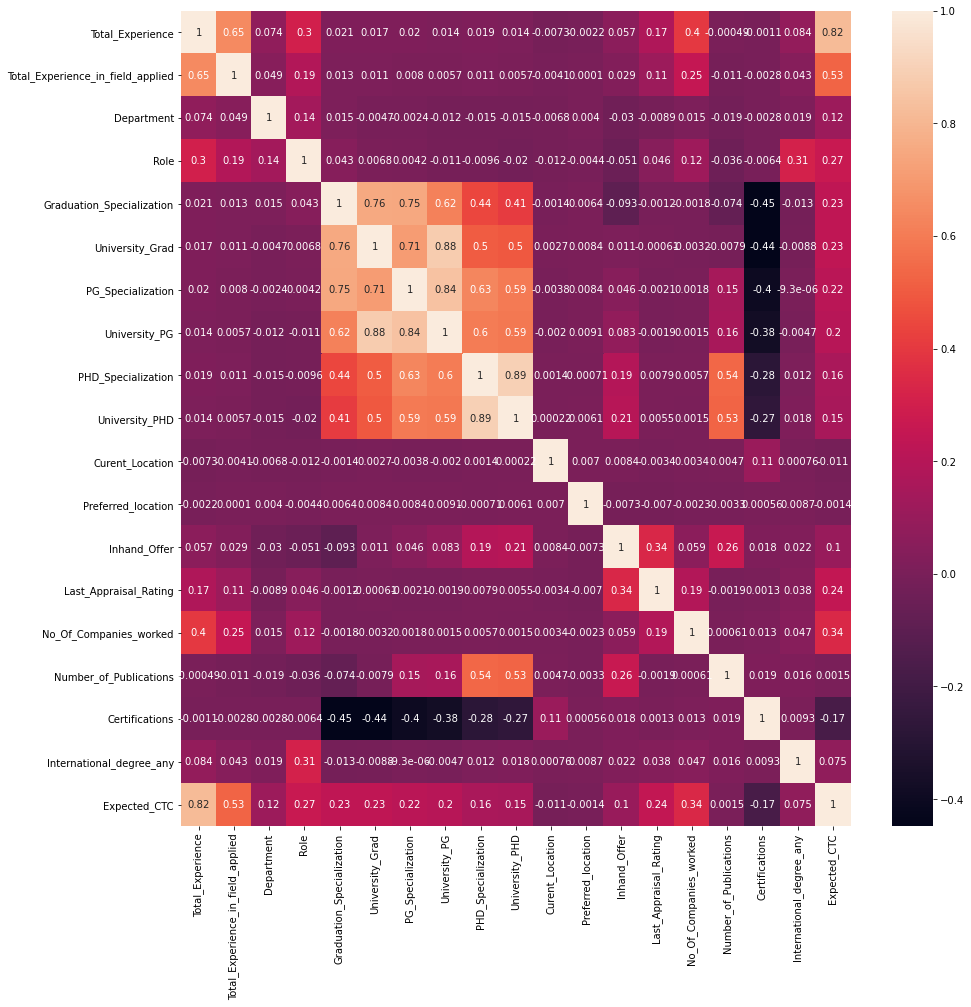

In [193]:
plt.figure(figsize=(15,15))
sns.heatmap(df_TunedData.corr(),annot=True)

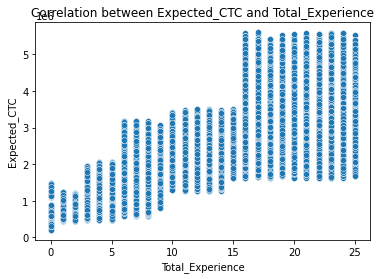

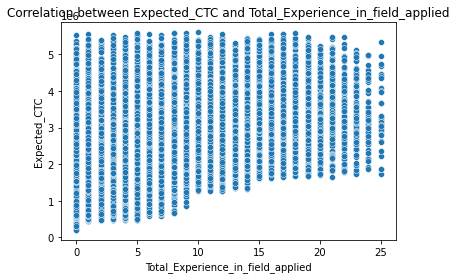

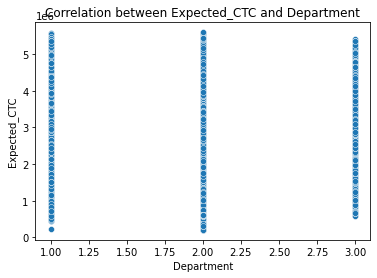

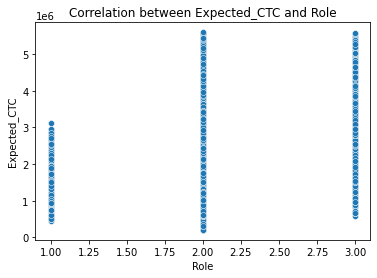

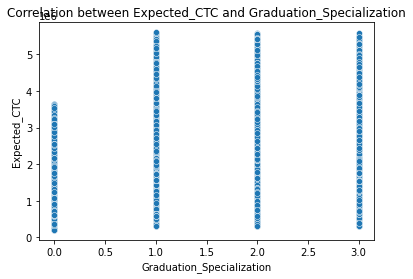

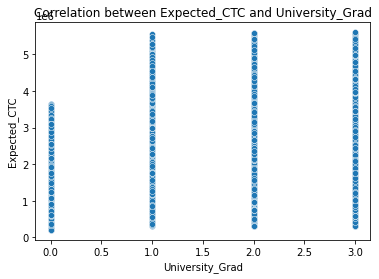

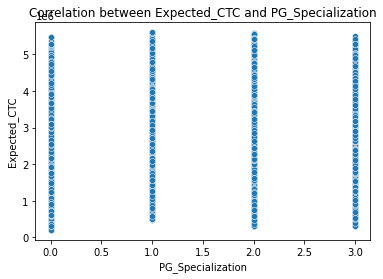

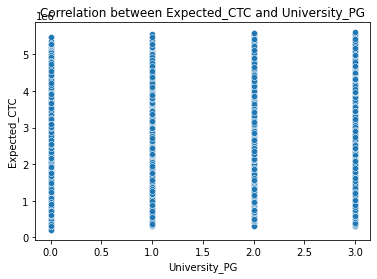

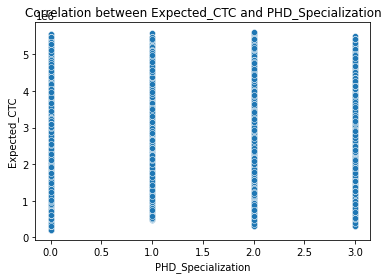

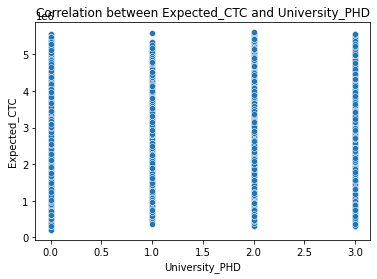

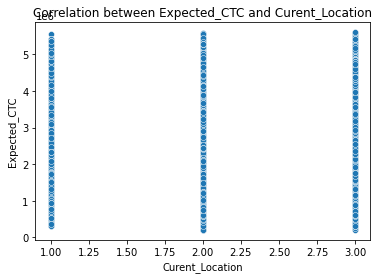

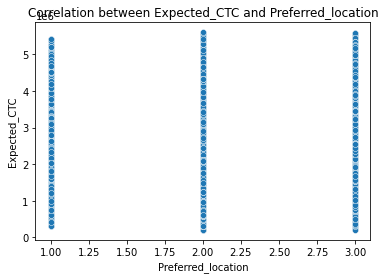

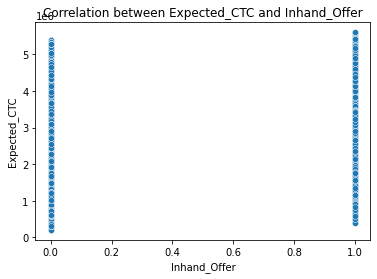

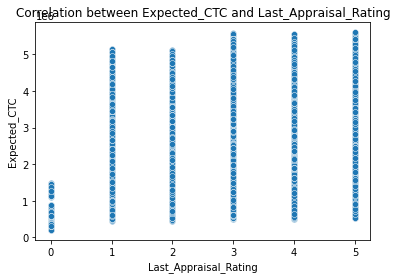

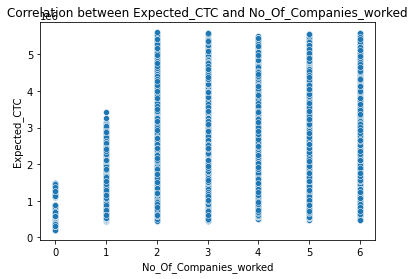

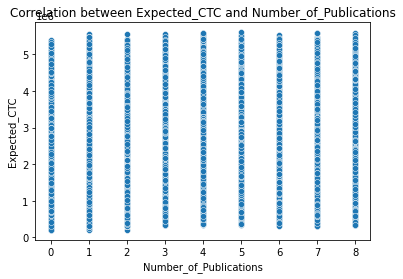

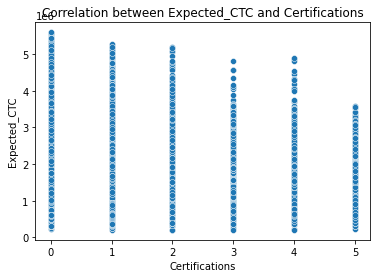

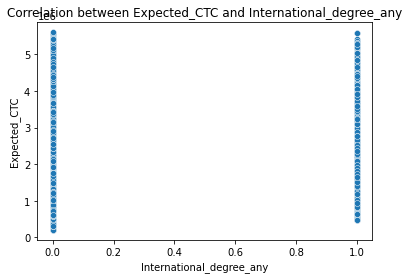

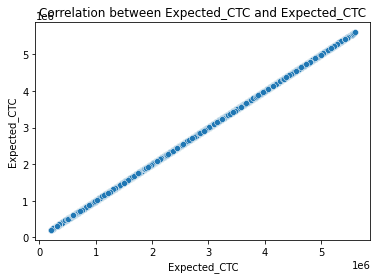

In [194]:
for colData in df_TunedData.select_dtypes(include = ['int64']).columns:
    sns.scatterplot(x=colData, y="Expected_CTC", data=df_TunedData)
    plt.title("Correlation between Expected_CTC and "+colData)
    plt.show()

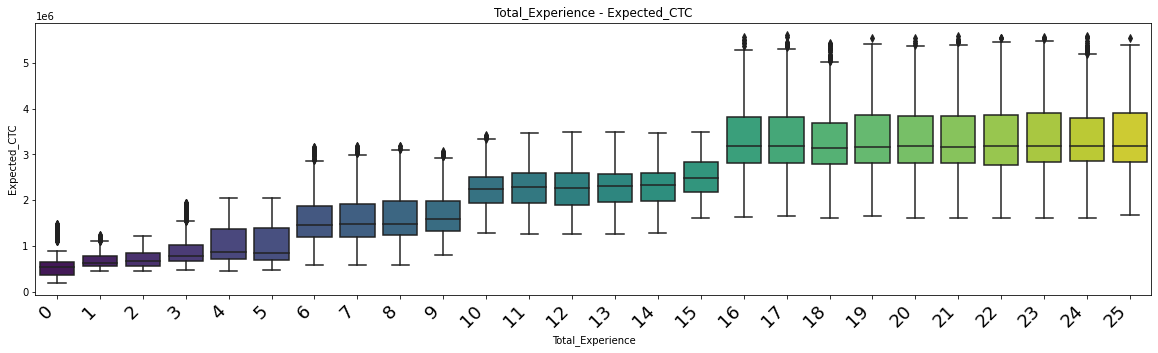

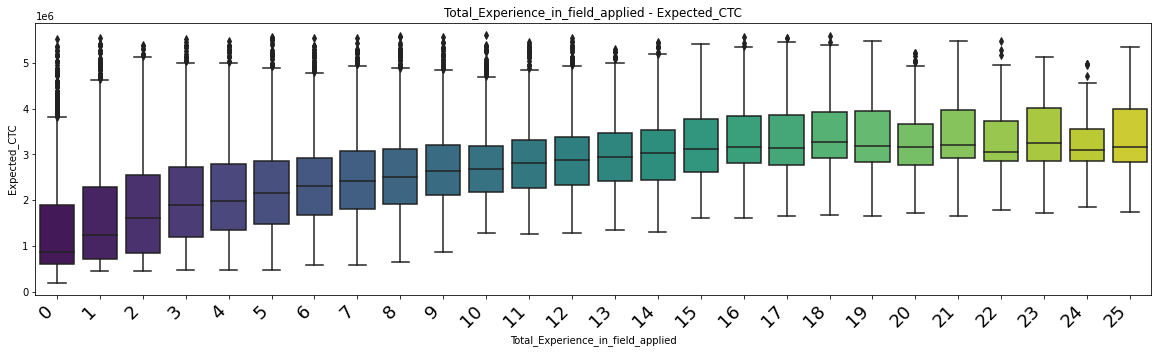

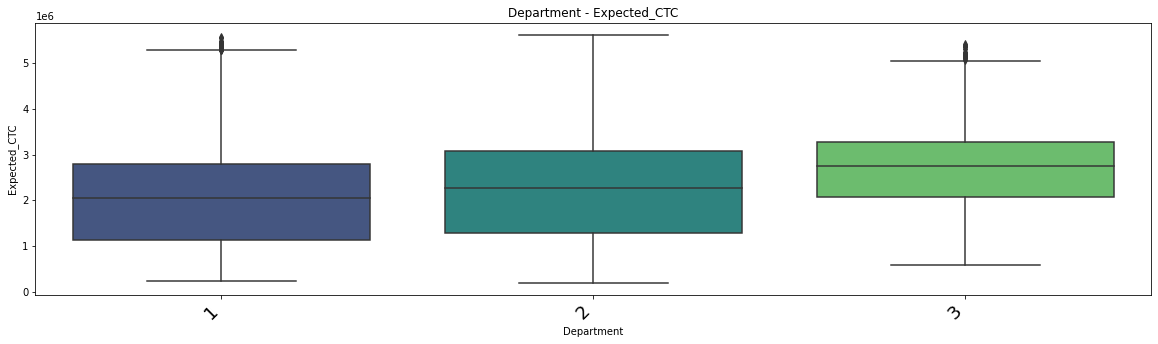

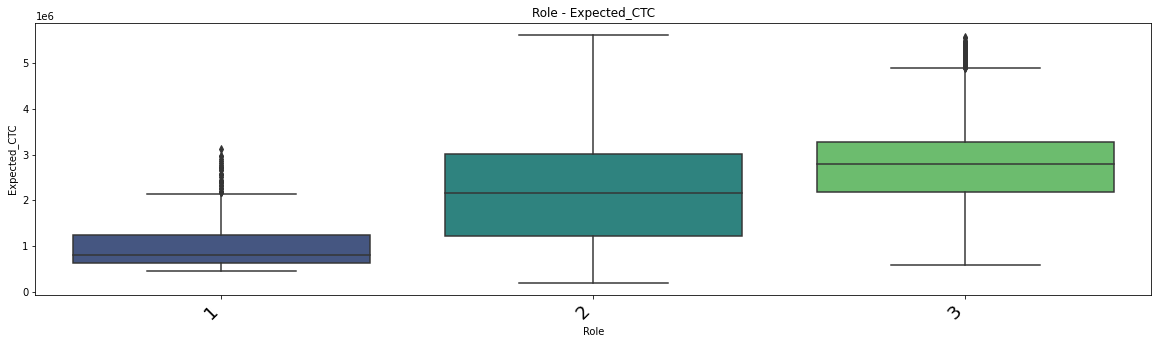

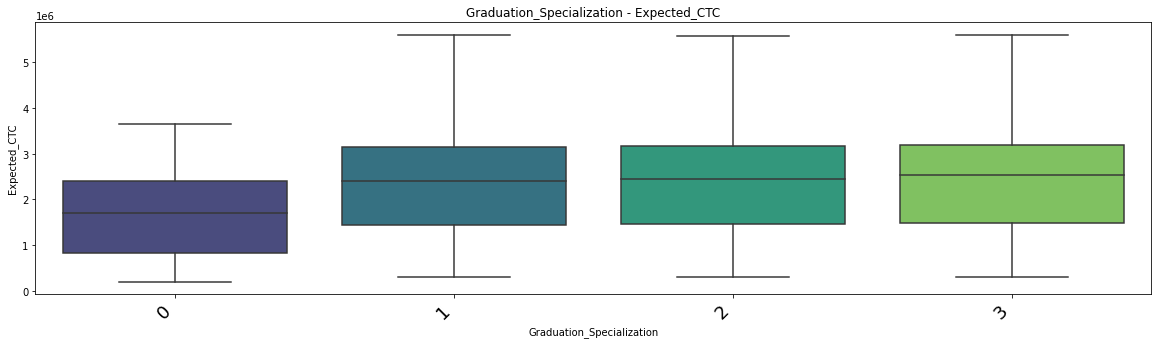

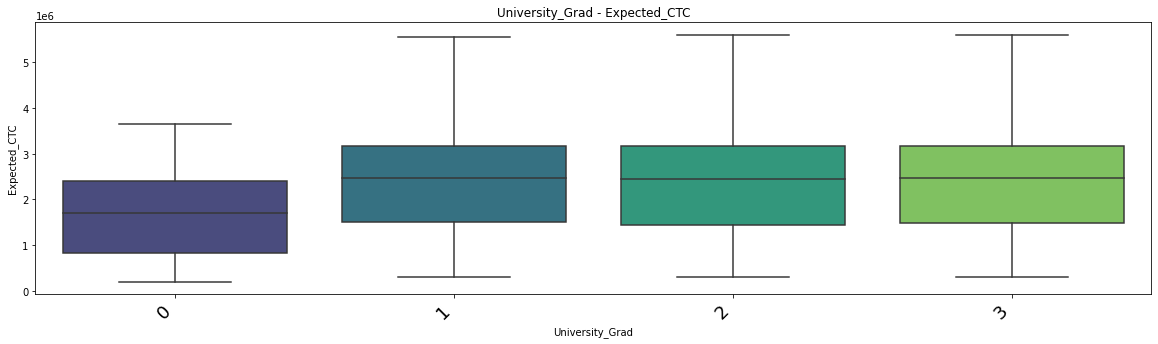

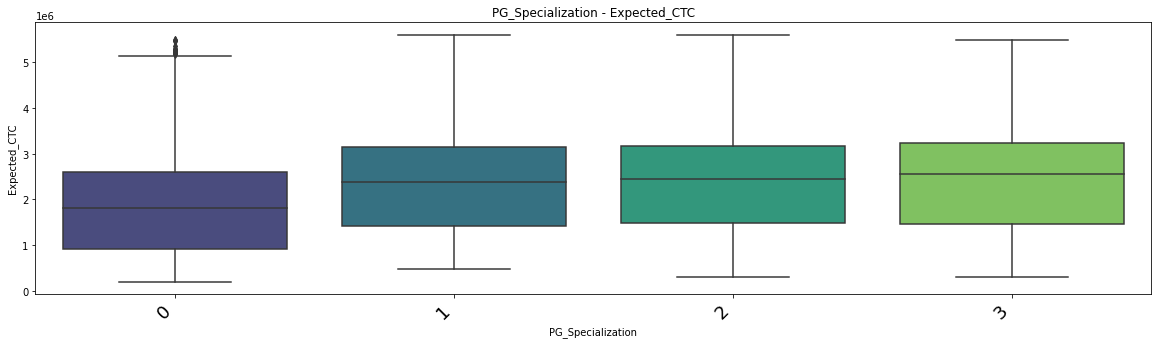

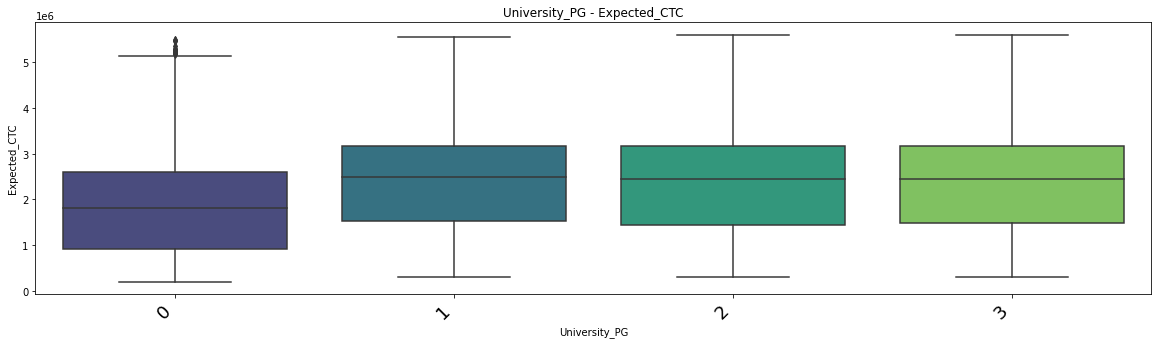

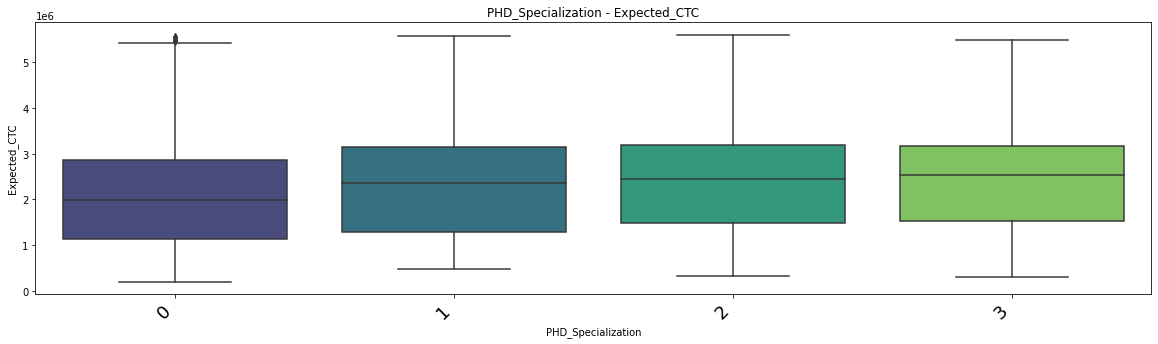

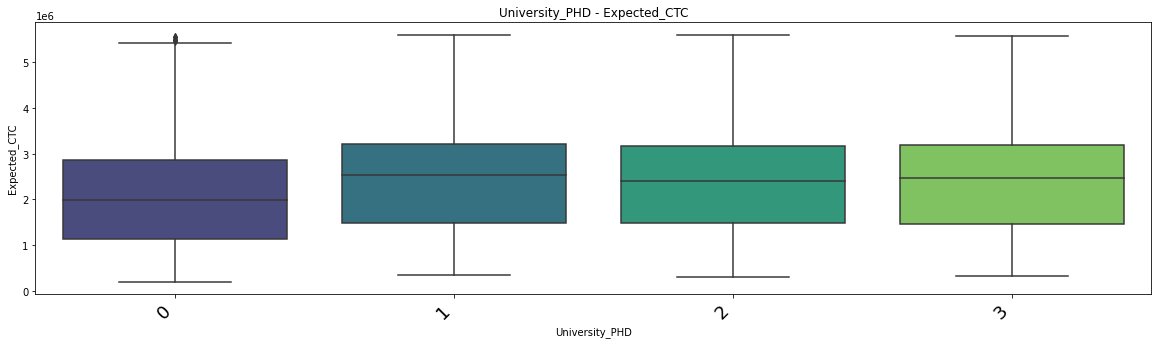

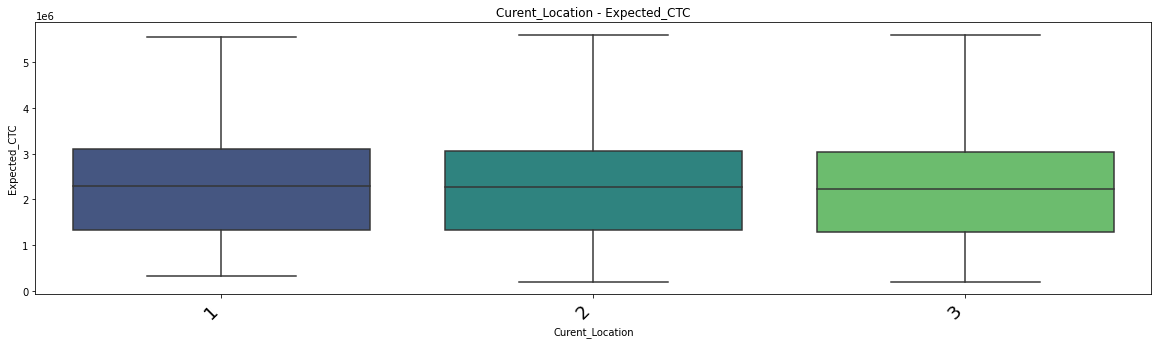

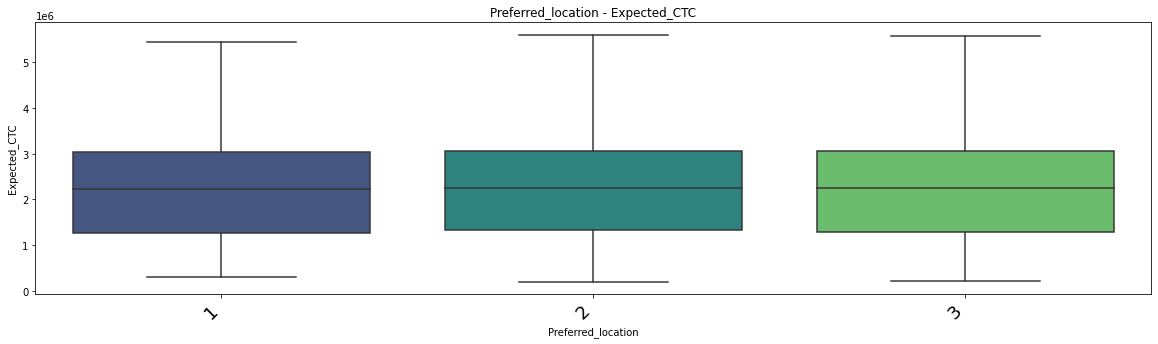

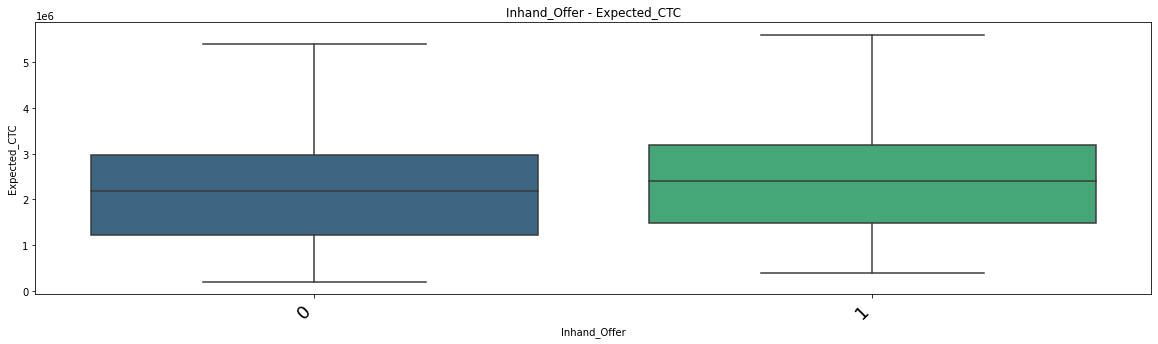

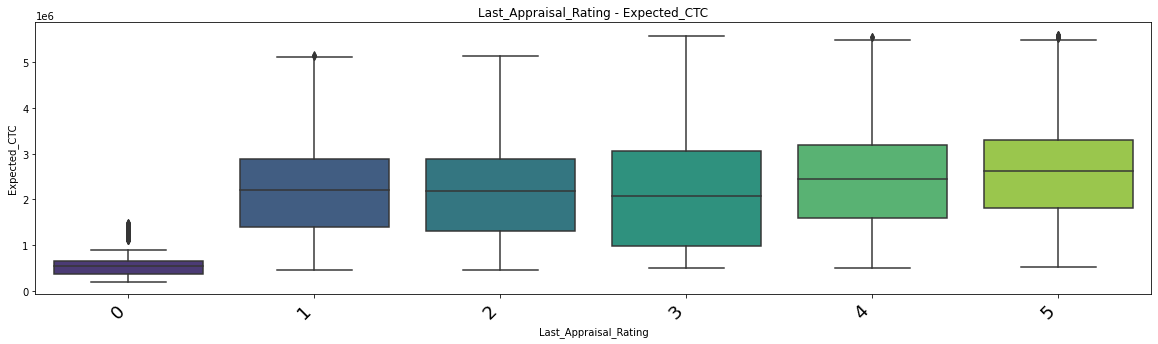

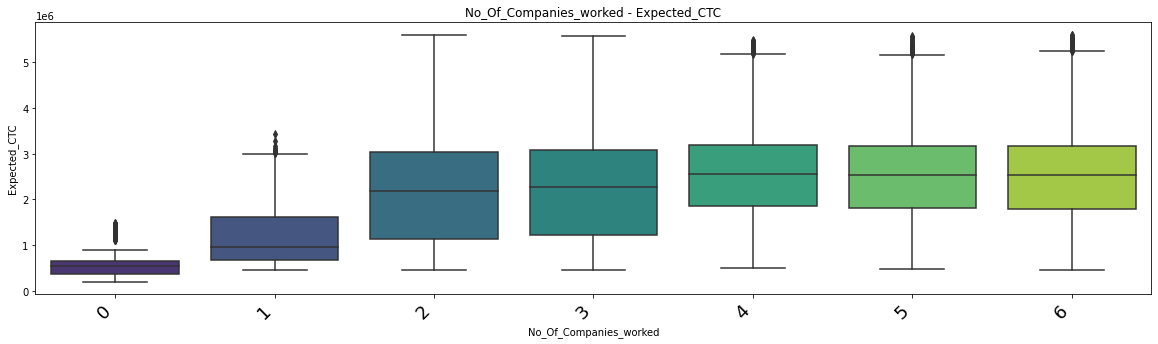

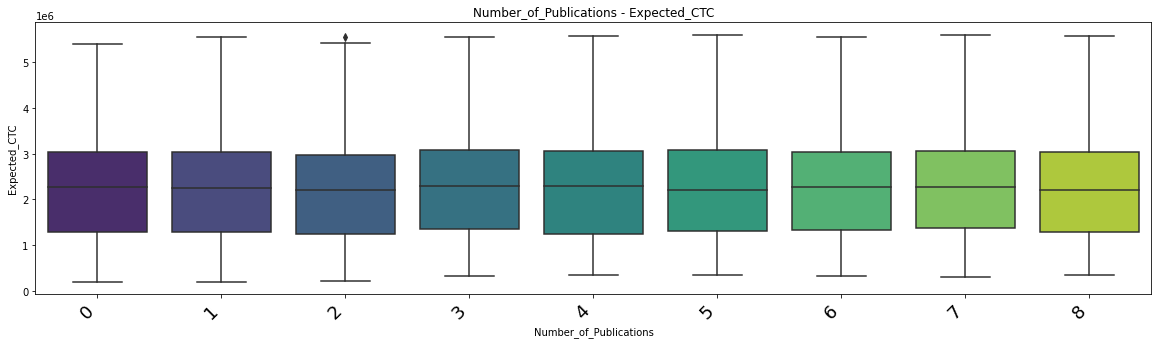

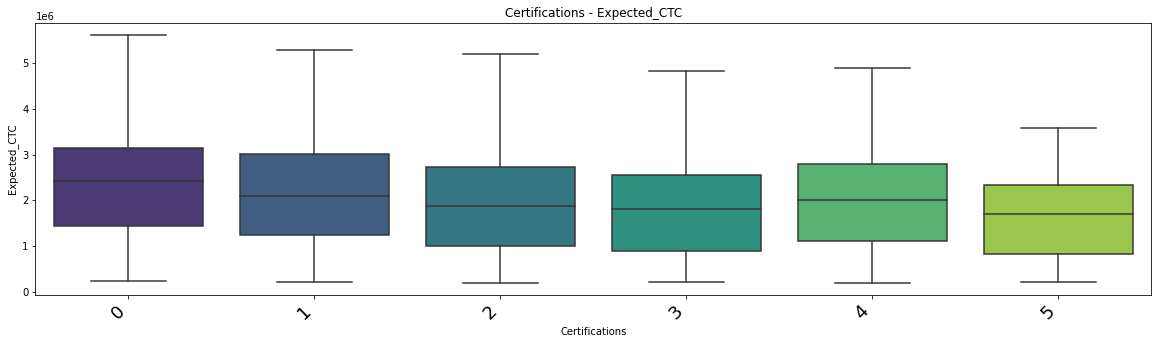

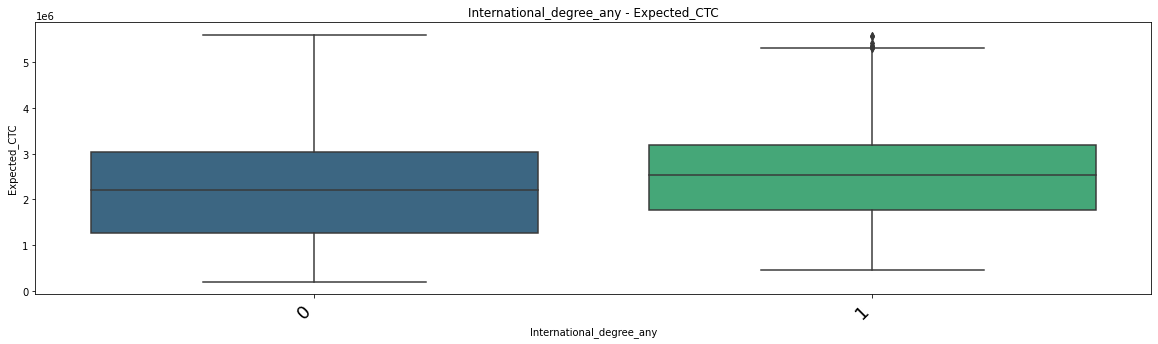

In [ ]:
for colData in df_TunedData.select_dtypes(include = ['int64']).columns:
    plt.figure(figsize=(20,5))
    chart=sns.boxplot(x=colData, y="Expected_CTC", data=df_TunedData, palette="viridis")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
    plt.title(colData + ' - Expected_CTC')
    chart;

In [195]:
df_TunedData.columns

Index(['Total_Experience', 'Total_Experience_in_field_applied', 'Department',
       'Role', 'Graduation_Specialization', 'University_Grad',
       'PG_Specialization', 'University_PG', 'PHD_Specialization',
       'University_PHD', 'Curent_Location', 'Preferred_location',
       'Inhand_Offer', 'Last_Appraisal_Rating', 'No_Of_Companies_worked',
       'Number_of_Publications', 'Certifications', 'International_degree_any',
       'Expected_CTC'],
      dtype='object')

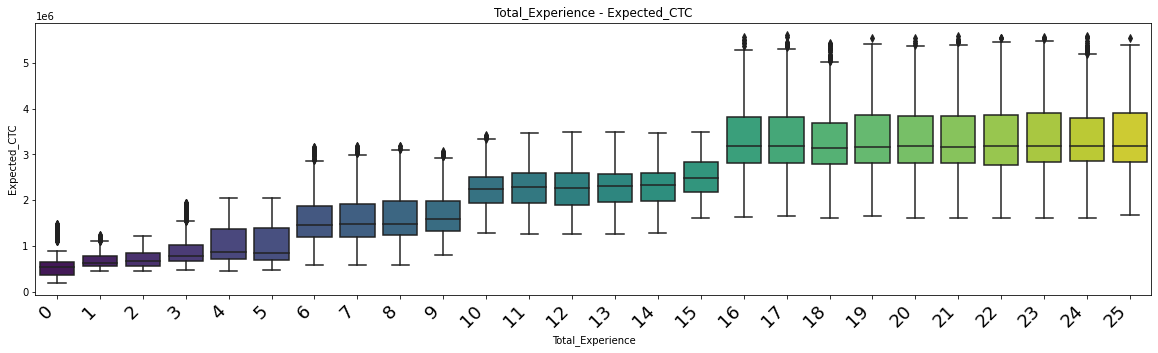

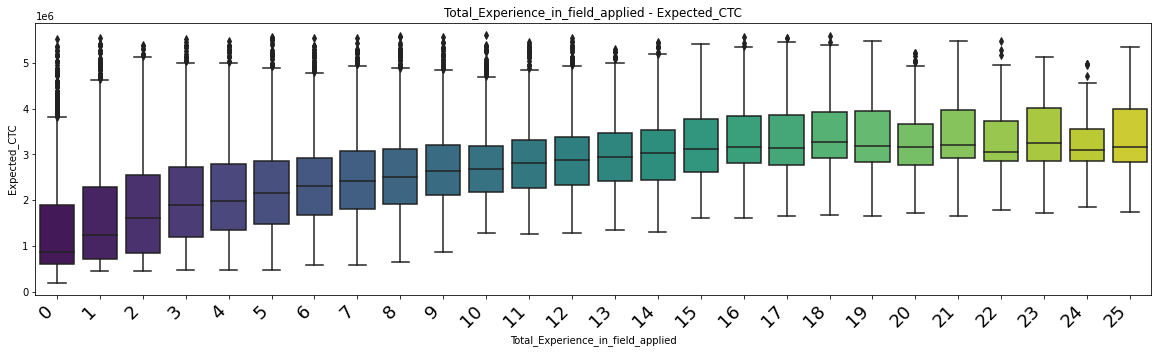

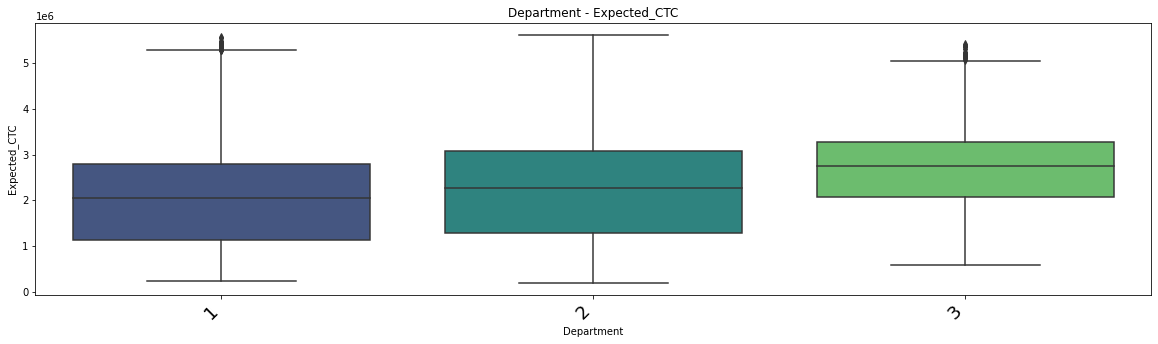

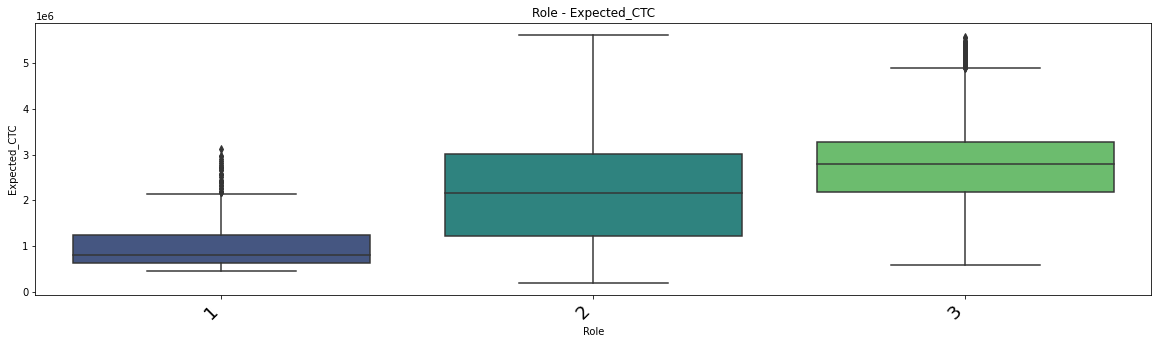

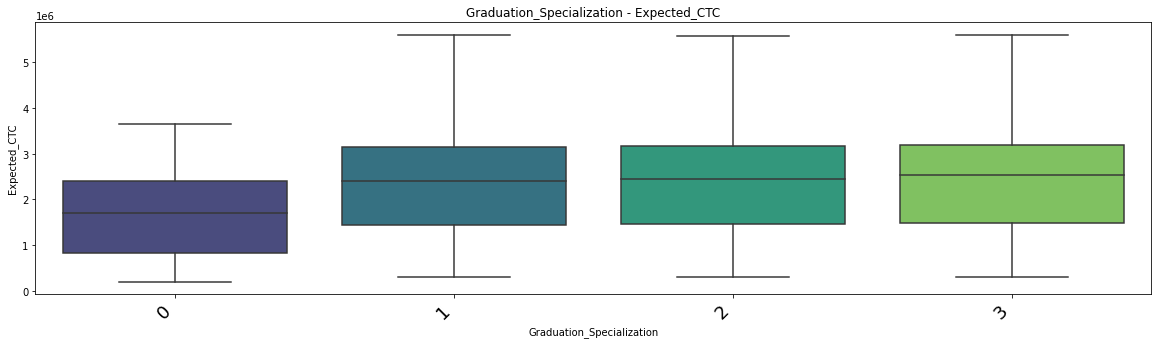

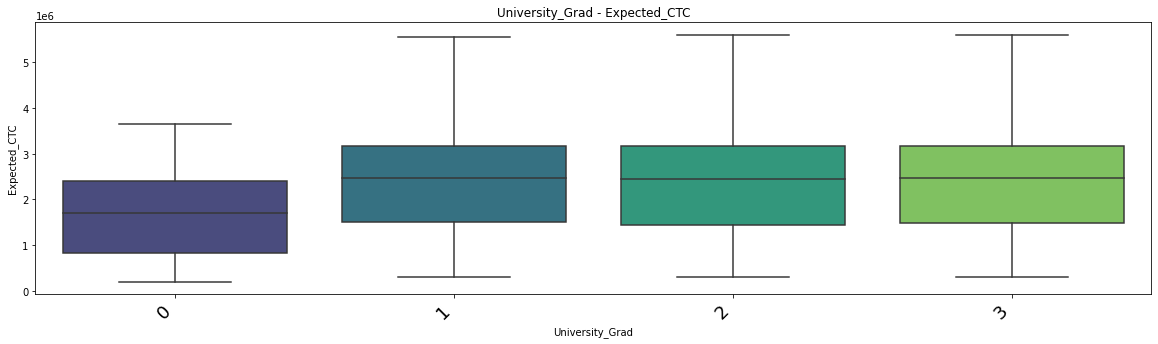

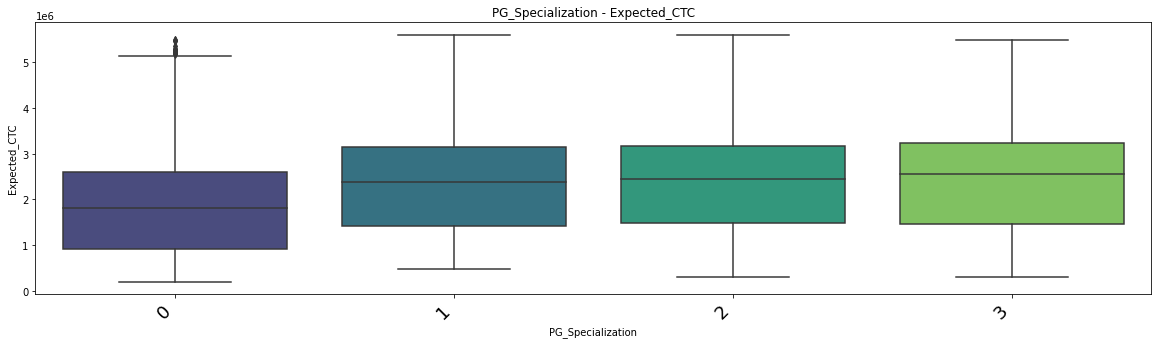

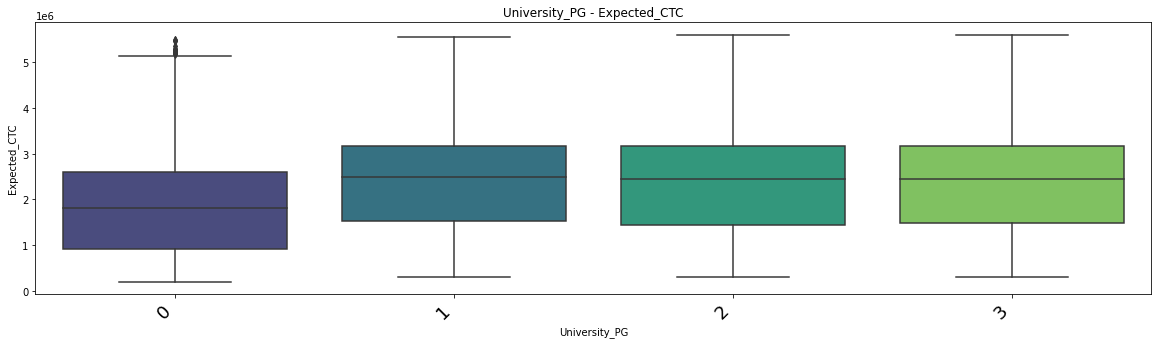

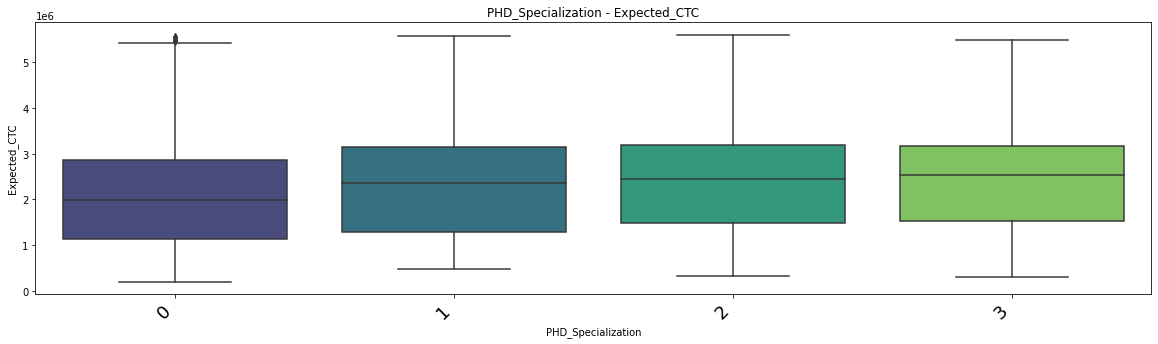

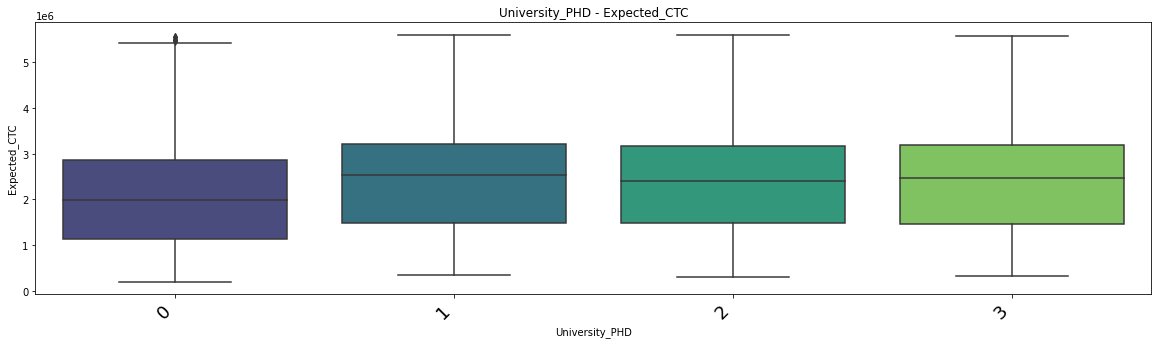

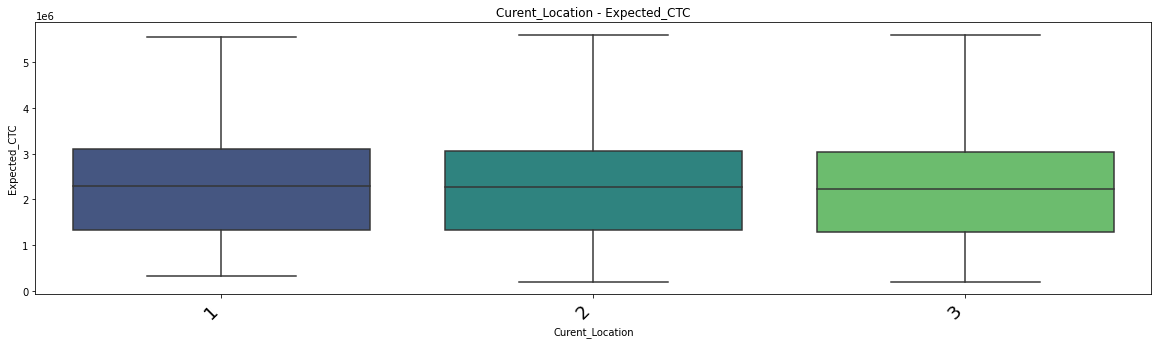

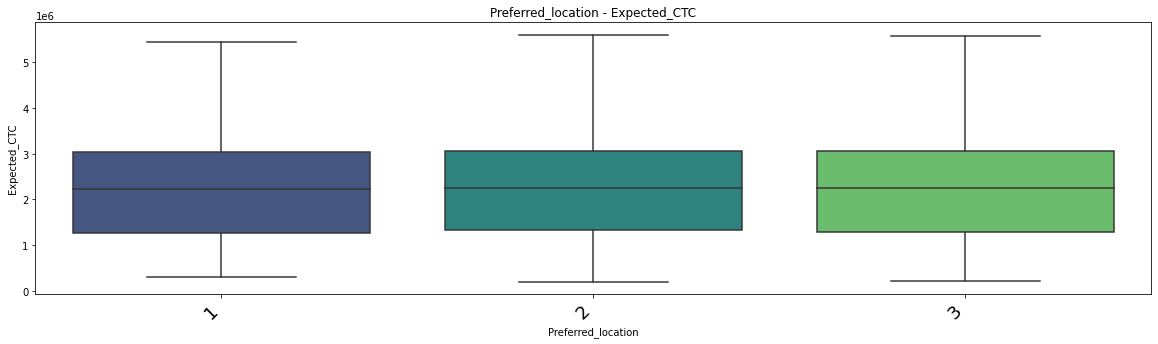

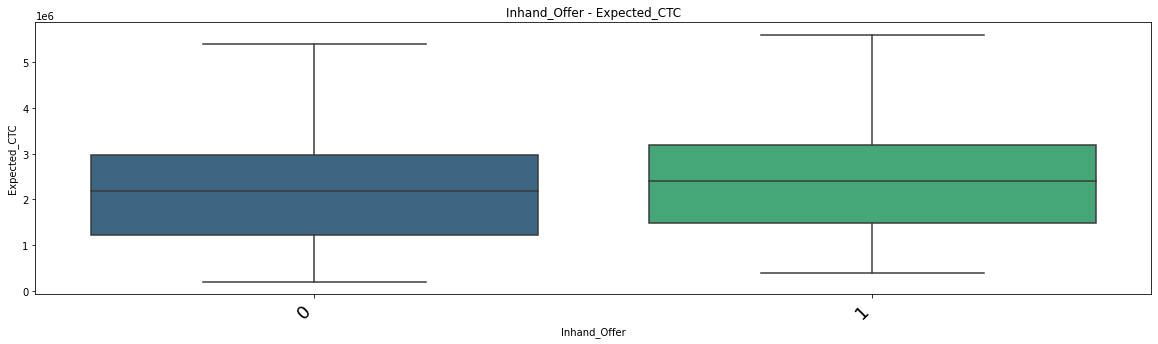

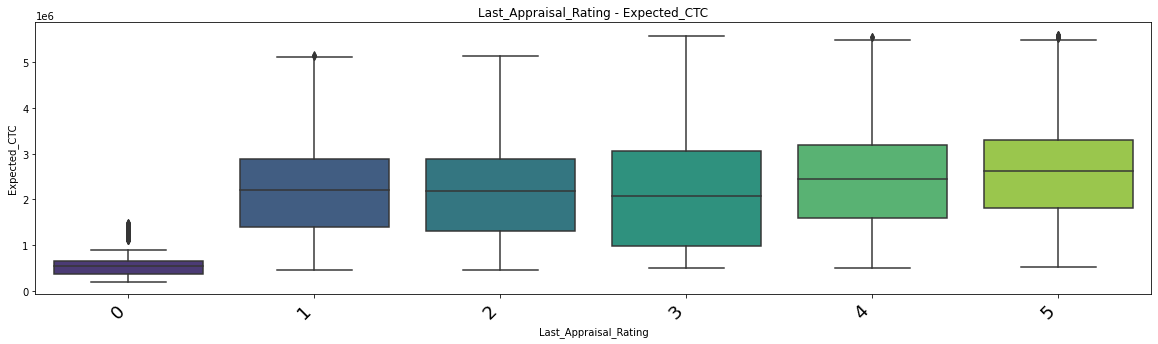

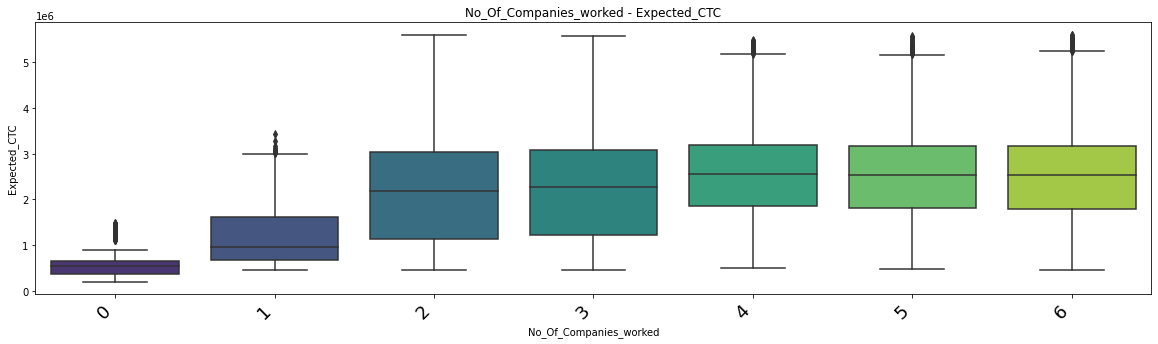

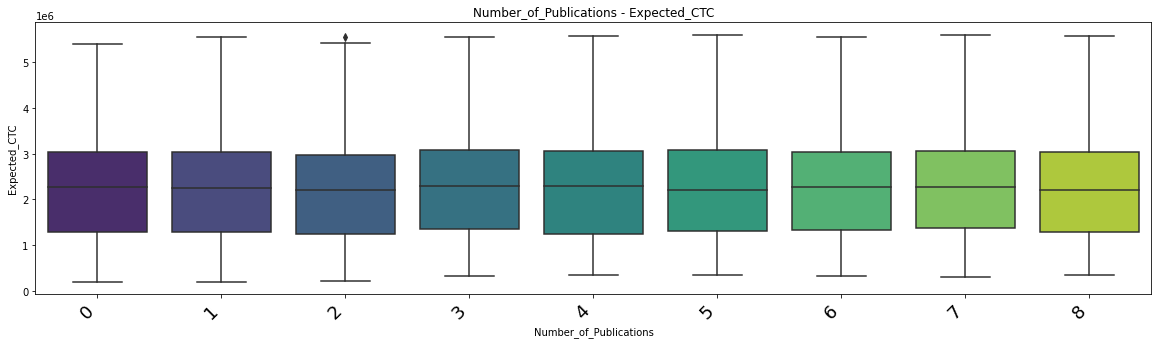

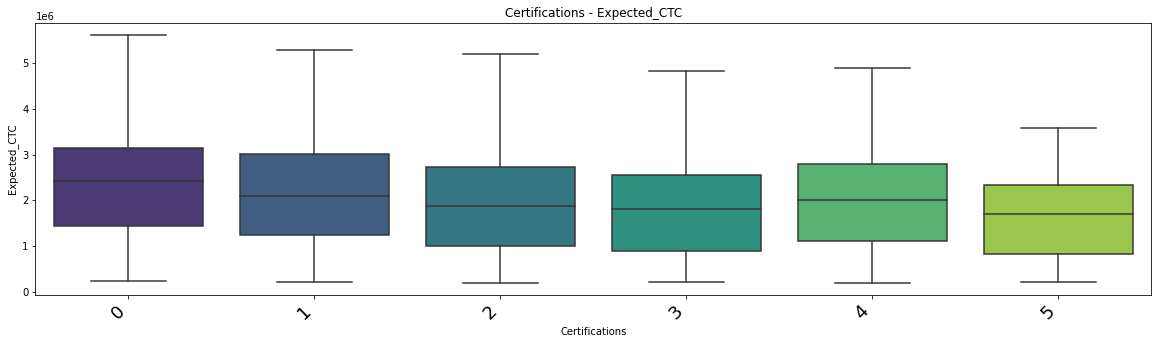

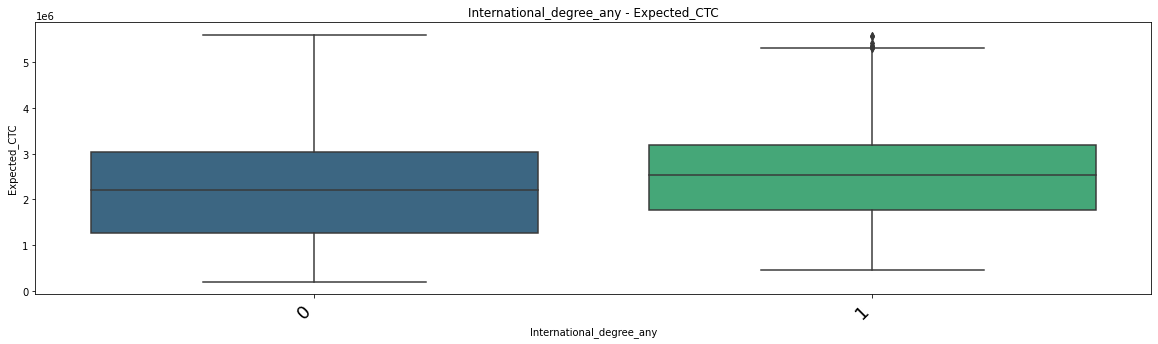

In [196]:
for colData in df_TunedData[['Total_Experience','Total_Experience_in_field_applied','Department', \
       'Role', 'Graduation_Specialization', 'University_Grad', \
       'PG_Specialization', 'University_PG', 'PHD_Specialization', \
       'University_PHD', 'Curent_Location', 'Preferred_location', \
       'Inhand_Offer', 'Last_Appraisal_Rating', 'No_Of_Companies_worked', \
       'Number_of_Publications', 'Certifications', 'International_degree_any']].columns:
    plt.figure(figsize=(20,5))
    chart=sns.boxplot(x=colData, y="Expected_CTC", data=df_TunedData, palette="viridis")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
    plt.title(colData +' - Expected_CTC')
    chart;

# Model creation for Target variable(Predict expected salary)

## Linear Regression model

In [197]:
# split the data in train and test 

X_train, X_test, y_train, y_test = train_test_split(df_TunedData.drop("Expected_CTC", axis=1), df_TunedData['Expected_CTC'], 
                                                   test_size=0.3, random_state=1)

In [198]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17500, 18), (7500, 18), (17500,), (7500,))

In [199]:
pipeline_CTC = make_pipeline(StandardScaler(), LinearRegression())

In [200]:
pipeline_CTC.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [201]:
print("Train Accuracy is : {}".format(pipeline_CTC.score(X_train,y_train)))
print("Test Accuracy is : {}".format(pipeline_CTC.score(X_test,y_test)))
y_test.shape,X_test.shape

Train Accuracy is : 0.7445107235534527
Test Accuracy is : 0.7401985752720037


((7500,), (7500, 18))

#### Usage of cross_val_score for computing cross-validation scores

In [202]:
scores = cross_val_score(pipeline_CTC, X=X_train, y=y_train, cv=10, n_jobs=1)

In [203]:
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

CV accuracy scores: [0.75005323 0.75860783 0.74902645 0.73109996 0.7379366  0.73971928
 0.74960083 0.75133514 0.73894457 0.73169078]
CV accuracy: 0.744 +/- 0.009


In [204]:
model_test_pred = pipeline_CTC.predict(X_test)
model_train_pred = pipeline_CTC.predict(X_train)

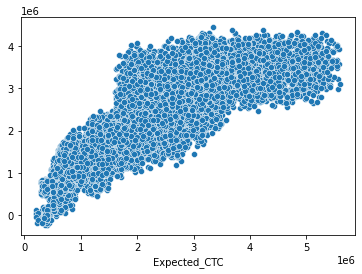

In [209]:
sns.scatterplot(y_train,model_train_pred)
plt.show()

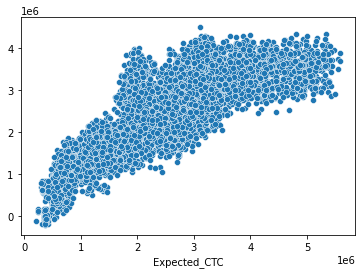

In [208]:
sns.scatterplot(y_test,model_test_pred)
plt.show()

In [207]:
resultDf_trn = pd.DataFrame({'MAE':[metrics.mean_absolute_error(y_test, model_test_pred),metrics.mean_absolute_error(y_train, model_train_pred)],
                             'MSE':[metrics.mean_squared_error(y_test, model_test_pred),metrics.mean_squared_error(y_train, model_train_pred)],
                             'RMSE':[np.sqrt(metrics.mean_squared_error(y_test, model_test_pred)),np.sqrt(metrics.mean_squared_error(y_train, model_train_pred))],
                             'AUC':[pipeline_CTC.score(X_test,y_test),pipeline_CTC.score(X_train,y_train)],
                             "R2": [r2_score(y_test,model_test_pred), r2_score(y_train,model_train_pred)]
                            },
                            index=[['Test','Train']])
resultDf_trn

,MAE,MSE,RMSE,AUC,R2
Test,449780.140774,3.560993e+11,596740.536943,0.740199,0.740199
Train,444514.564187,3.414264e+11,584317.037825,0.744511,0.744511


## END